# Final Plots

In [1]:
from plotting_utils import (
    plot_forecast,
    plot_crps_bydate,
    score_improvement_bysite,
    plot_improvement_bysite,
    plot_global_percentages,
    plot_region_percentages,
    plot_site_type_percentages_bymodel,
    plot_site_type_percentages_global,
    plot_window_and_sitetype_performance,
    generate_metadata_df,
    plot_crps_over_time_agg,
)
import pandas as pd
from utils import (
    establish_s3_connection,
    NaiveEnsembleForecaster
)
import warnings
import os

# Ignore all warnings; admittedly not the best practice here :/
warnings.filterwarnings("ignore")

targets = pd.read_csv("targets.csv.gz")
metadata = generate_metadata_df()

/home/rstudio/.virtualenv/neon4cast-darts/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/home/rstudio/.virtualenv/neon4cast-darts/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


Loading the best performing dataframes which have been saved as a csv.

In [2]:
best_performers_dfs = {}
best_models_listform = {}
target_variables = ['oxygen', 'temperature', 'chla']
model_names = ["BlockRNN", "Transformer", "NBEATS", "TCN", "RNN", "TFT", "NLinear", "DLinear", "NaiveEnsemble"]
for target_variable in target_variables:
    best_performers_dfs[target_variable] = {}
    for pos in ['inter', 'intra']:
        best_performers_dfs[target_variable][pos] = pd.read_csv(f'dataframes/{target_variable}_{pos}_all.csv')
        if pos == 'inter':
            df = best_performers_dfs[target_variable][pos]
            best_models_listform[target_variable] = [[model, int(df[df['model'] == model]['model_id'].unique())] for model in model_names]

Now, we'll plot

### Model Performance within 30 Day Forecast Windows

#### Comparison w/Climatology Null Model

The plots below examine the aggregate of ML forecasts within a forecast window. I made the analogous plot for individual models but found that they all performed about the same, so I decided to plot the aggregate for clarity.

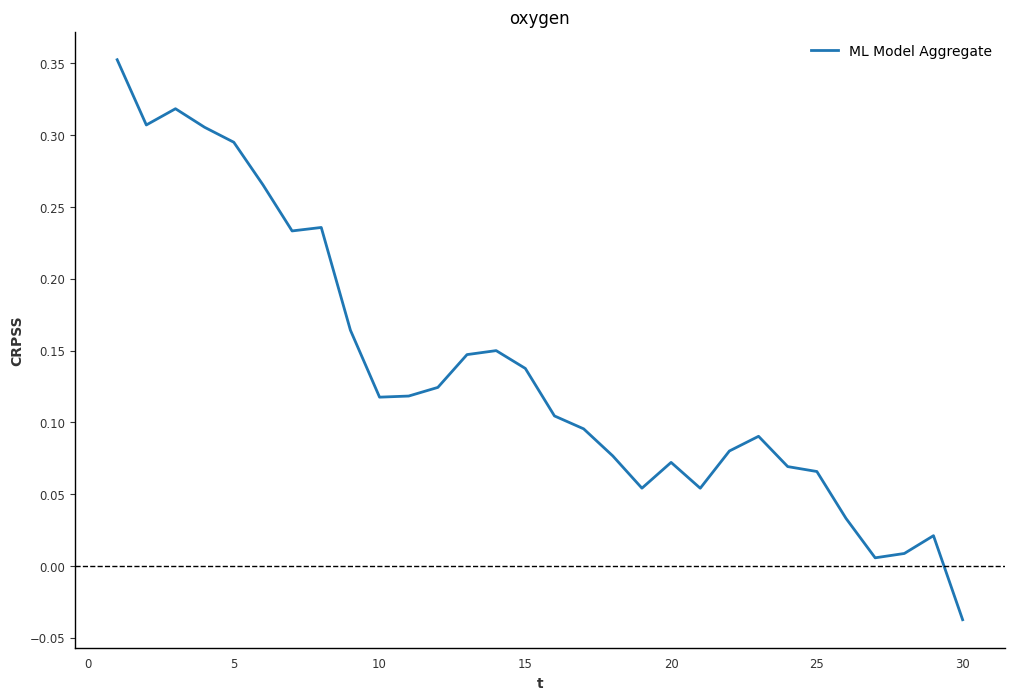

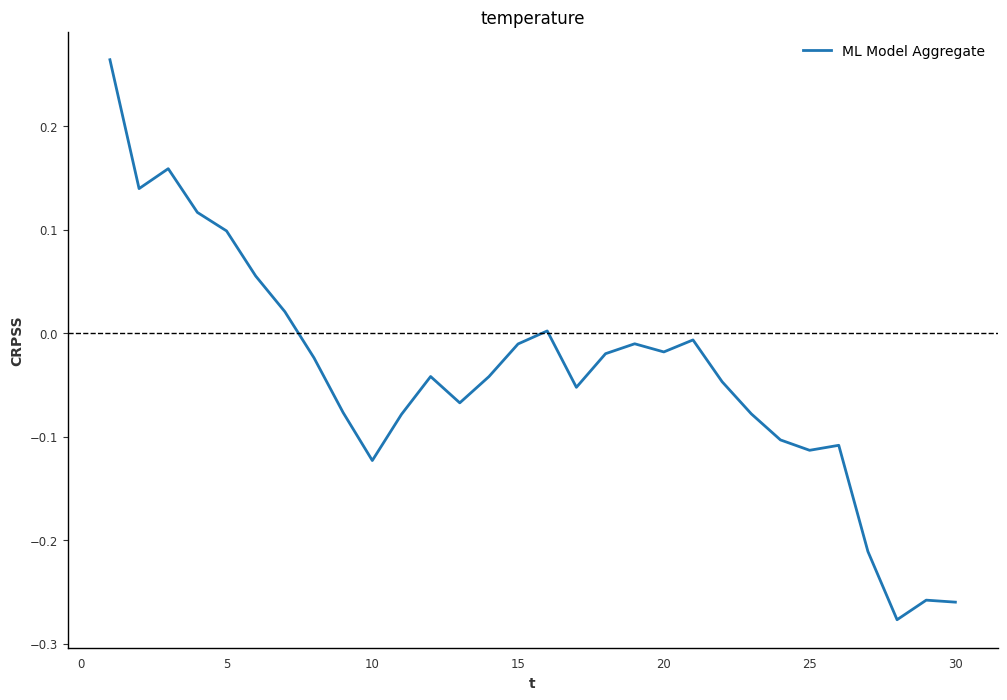

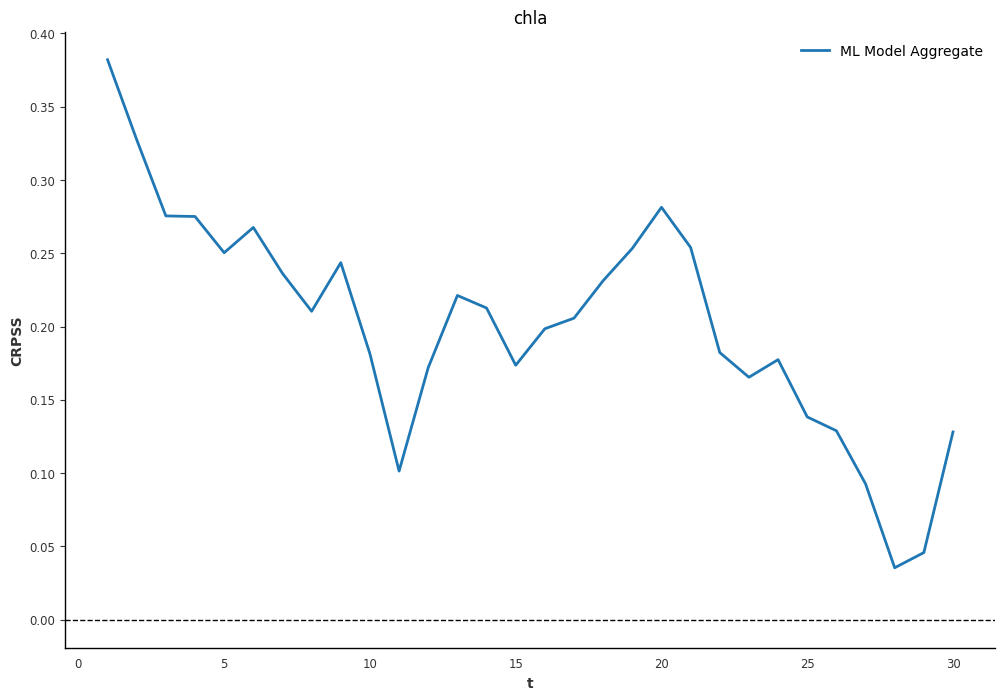

In [3]:
for var in ['oxygen', 'temperature', 'chla']:
    plot_crps_over_time_agg(best_performers_dfs[var]['intra'], var)

#### Comparison w/Naive Persistence Model

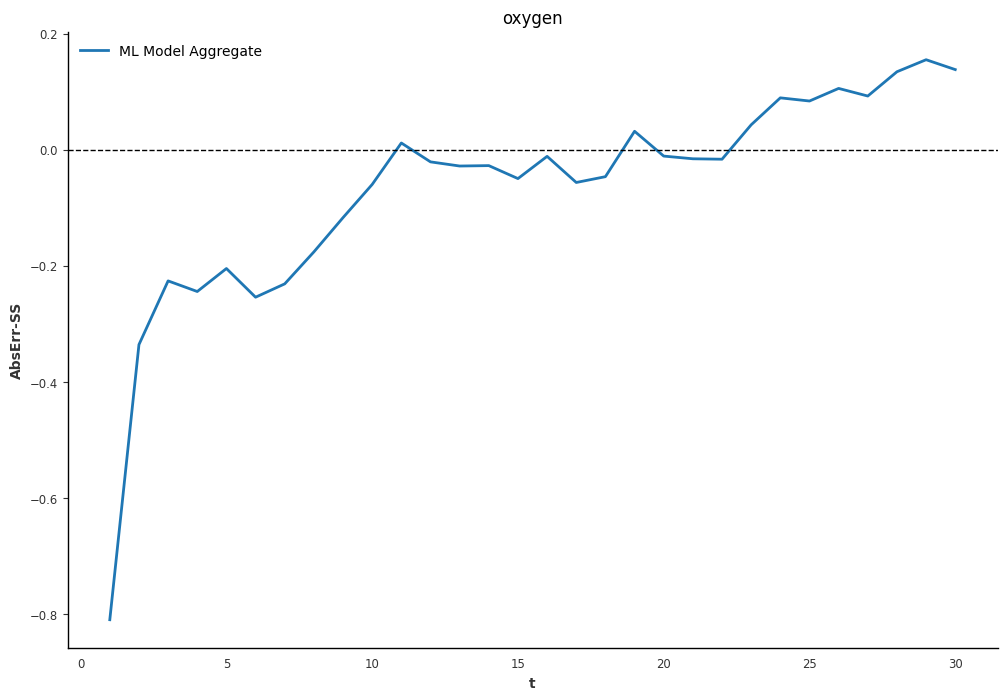

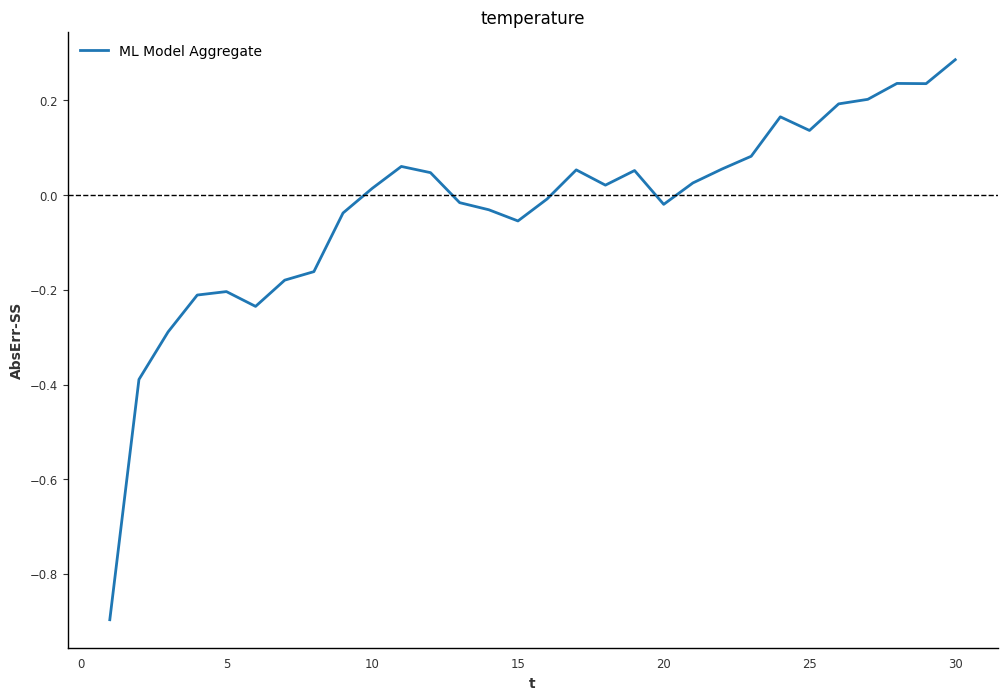

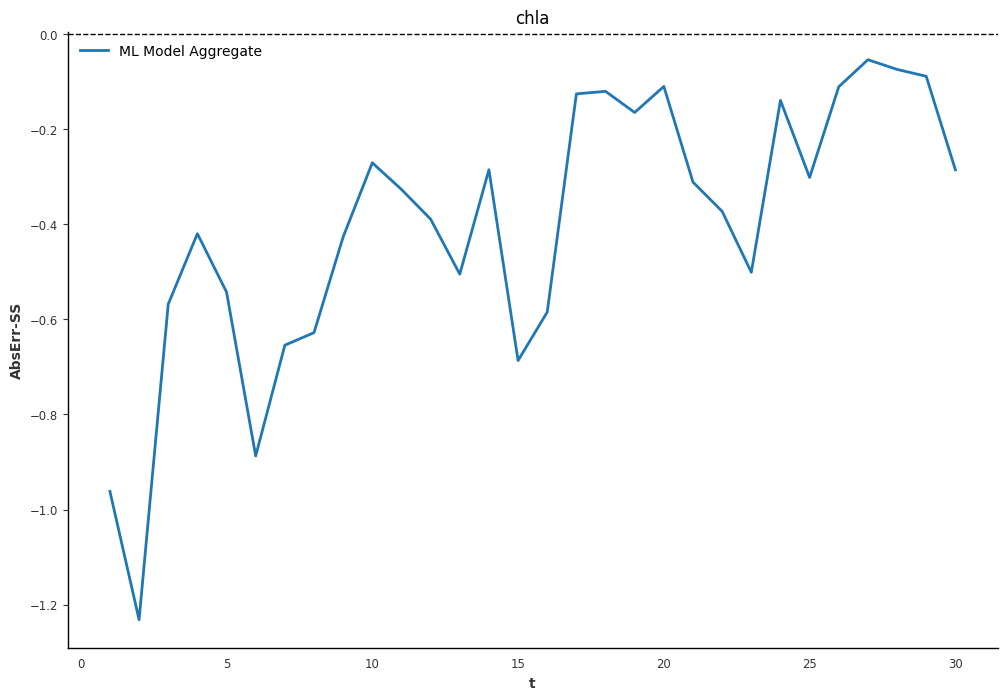

In [4]:
for var in ['oxygen', 'temperature', 'chla']:
    plot_crps_over_time_agg(best_performers_dfs[var]['intra'], var, historical=False)

### Model Performance across 30 Day Forecast Windows

#### Global Performance Compared to Climatology Model

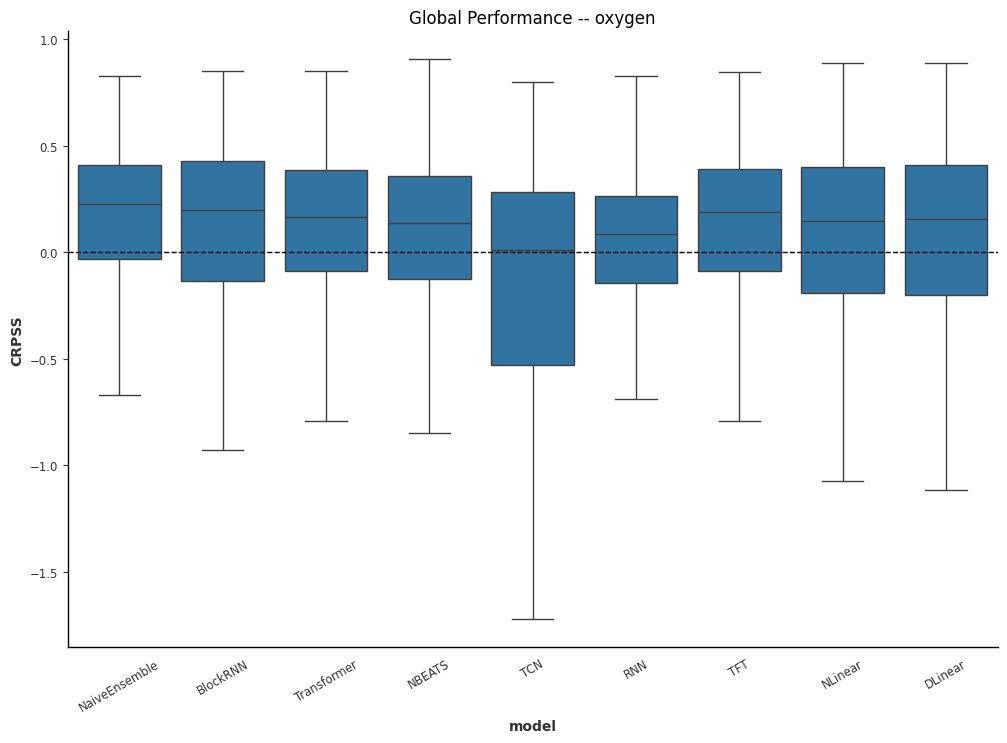

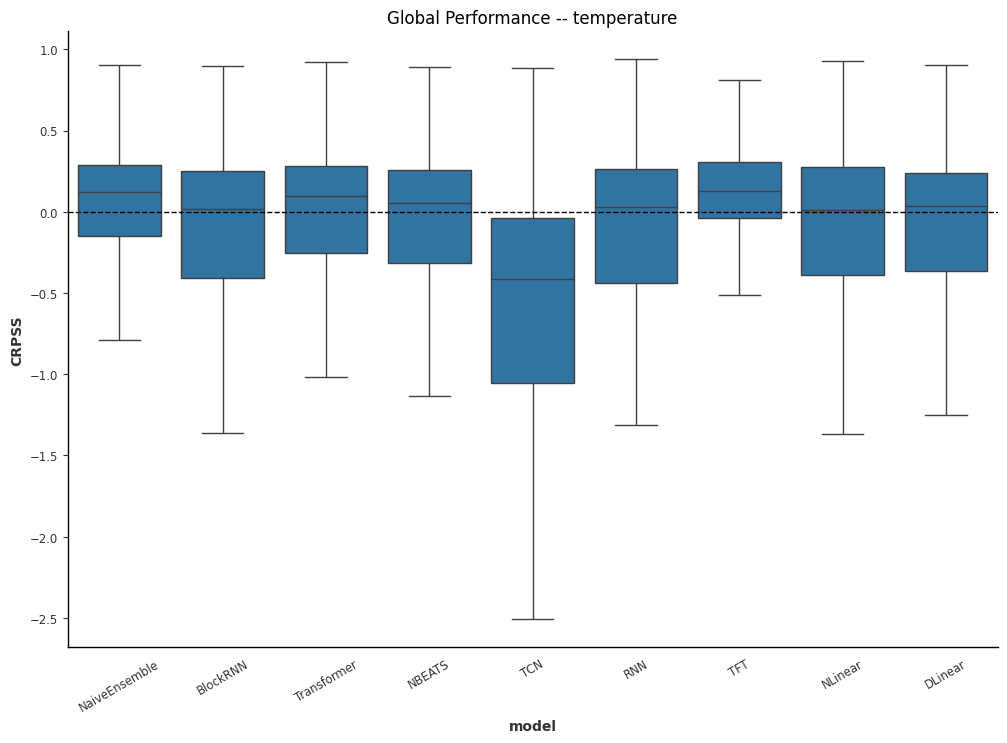

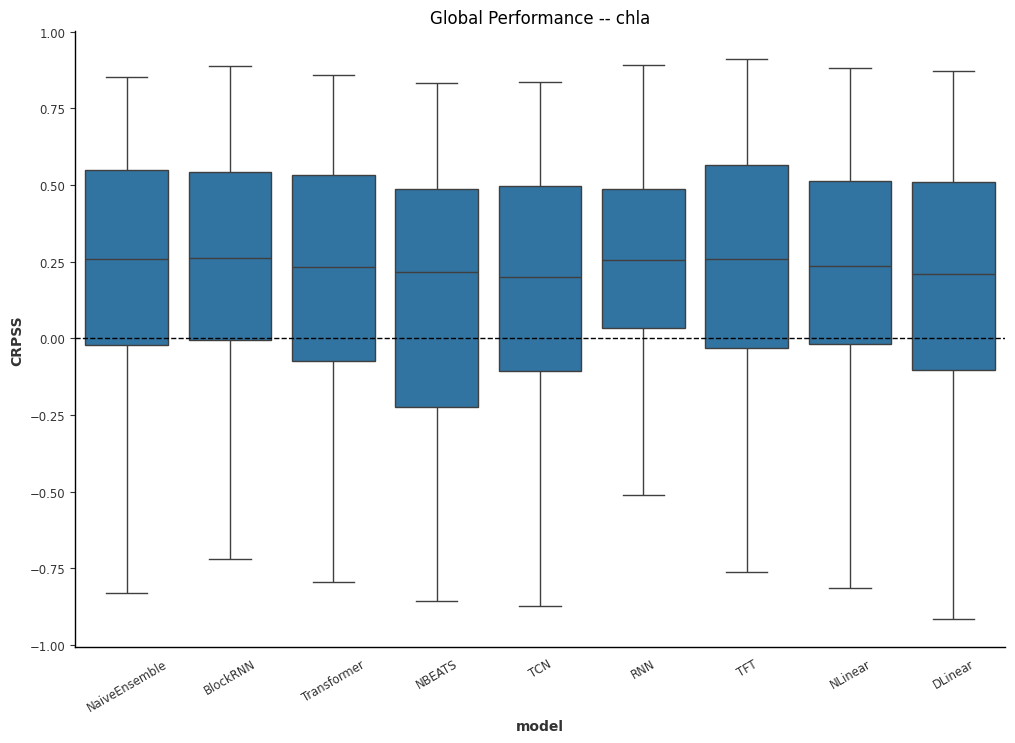

In [5]:
for target_variable in target_variables:
    plot_global_percentages(
        best_performers_dfs[target_variable]['inter'], 
        f'Global Performance -- {target_variable}'
    )

#### Global Performance Compared to Naive Persistence Model

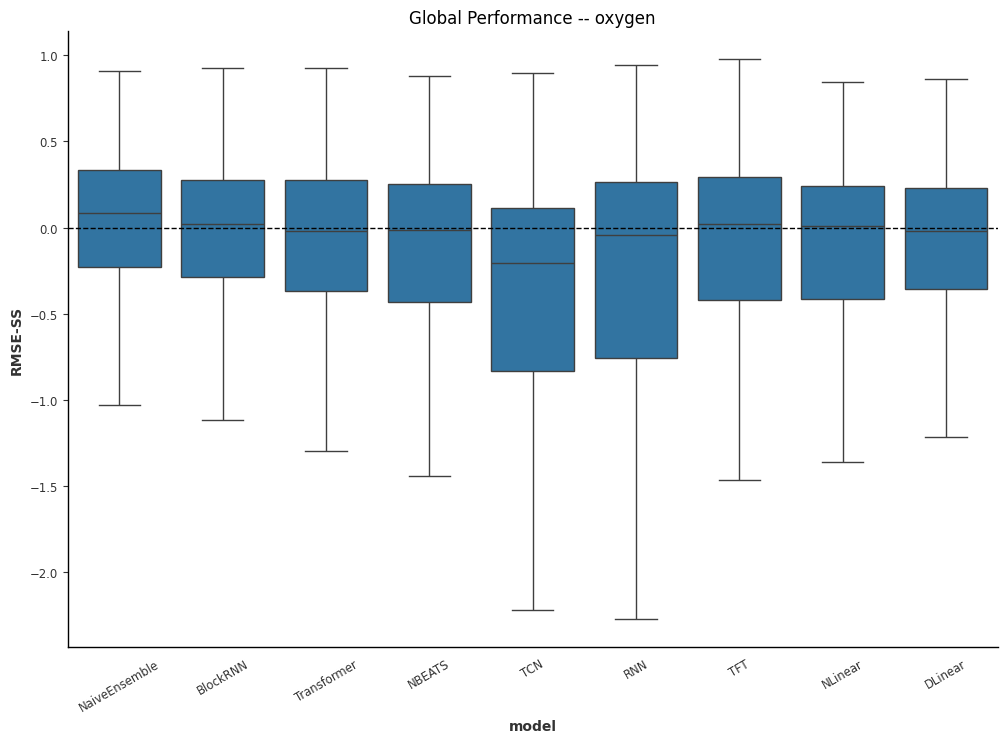

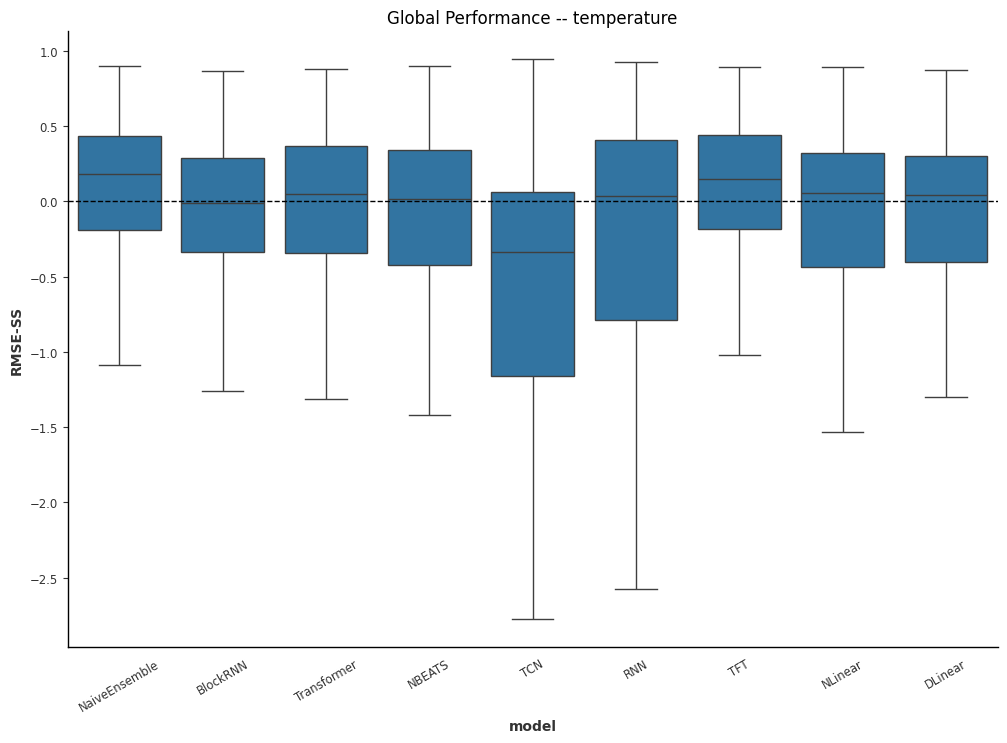

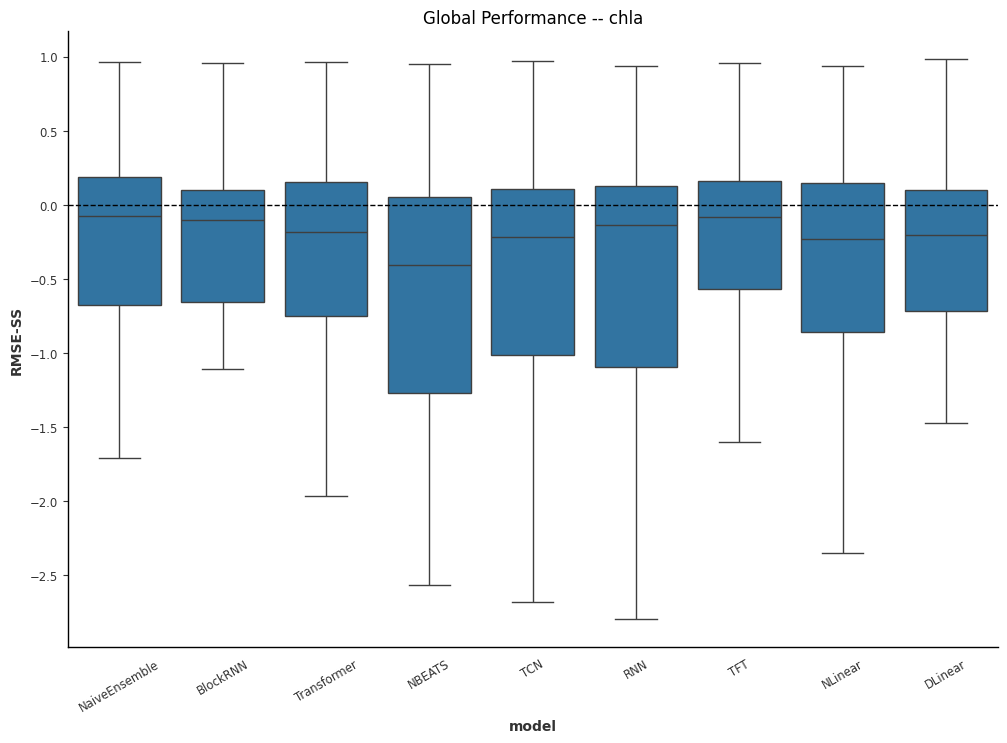

In [7]:
for target_variable in target_variables:
    plot_global_percentages(
        best_performers_dfs[target_variable]['inter'], 
        f'Global Performance -- {target_variable}', 
        historical=False
    )

#### Global Performance by water body type -- Historical Comparison

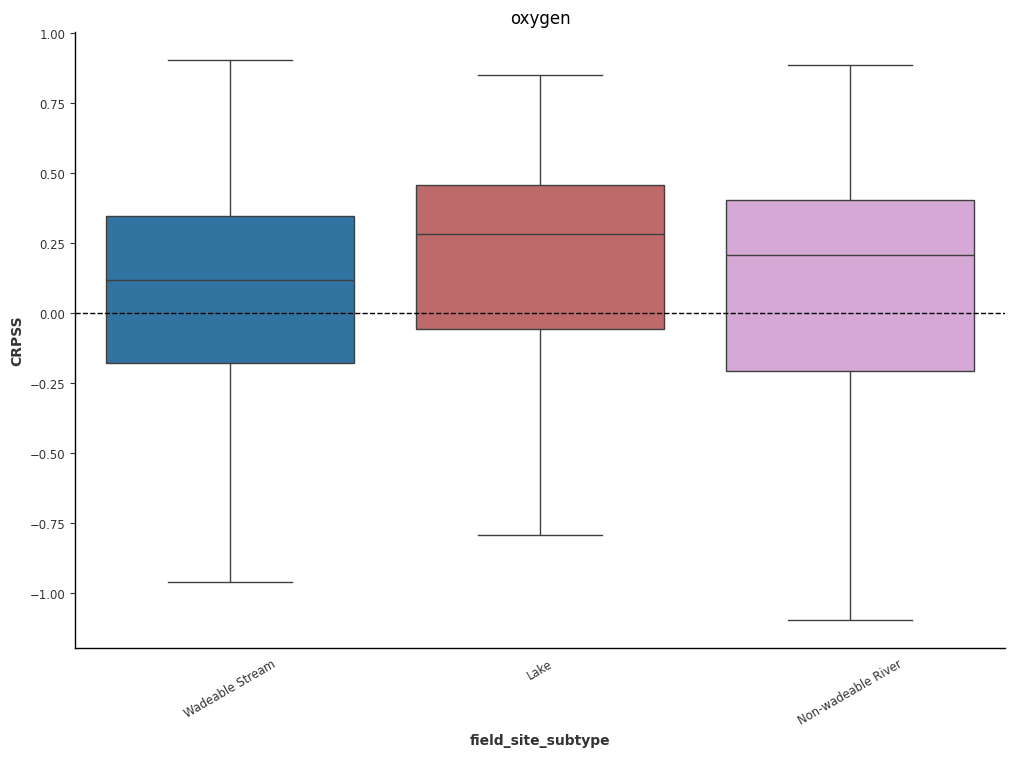

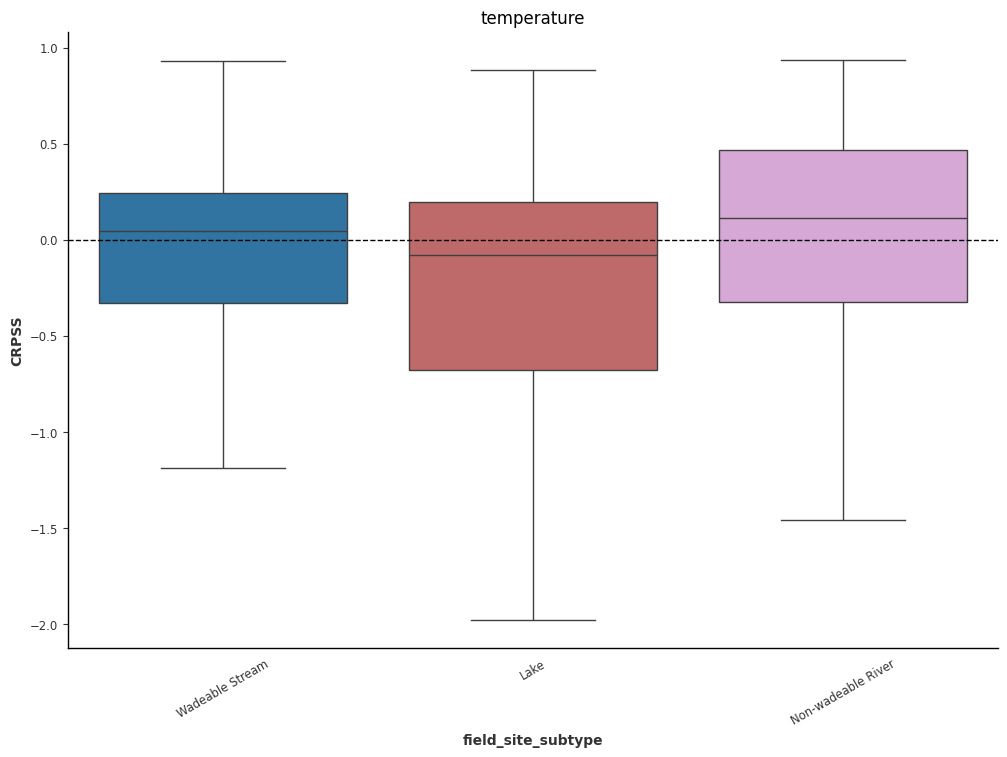

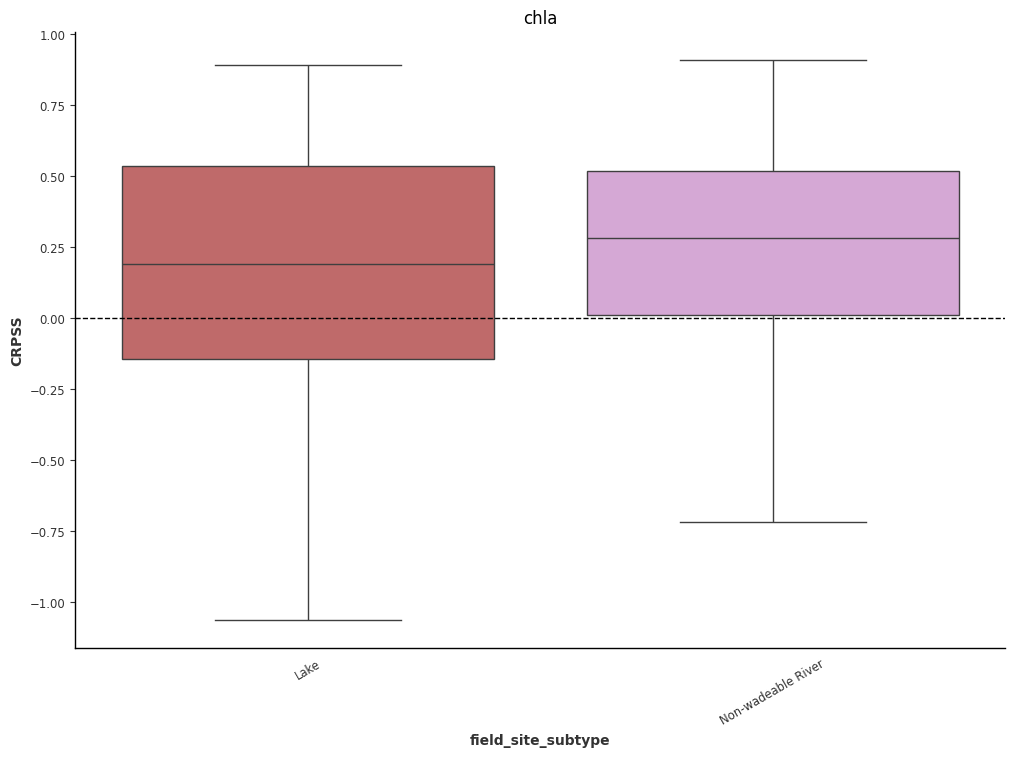

In [8]:
for target_variable in target_variables:
    plot_site_type_percentages_global(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
    )

#### Global Performance by water body type -- Naive Comparison

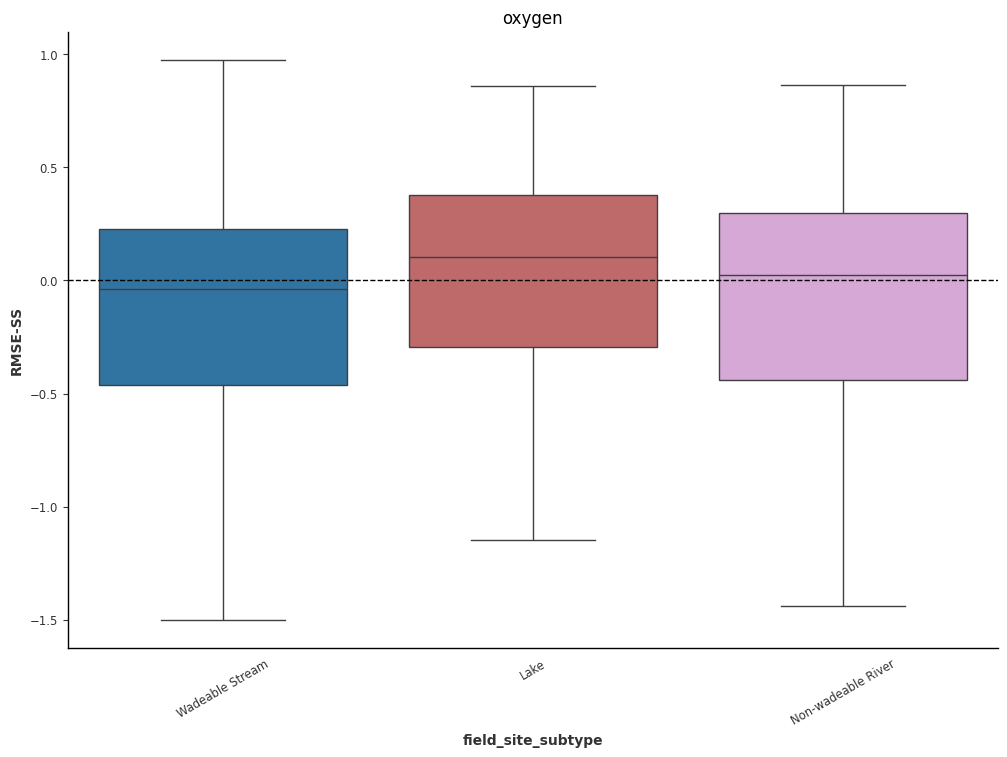

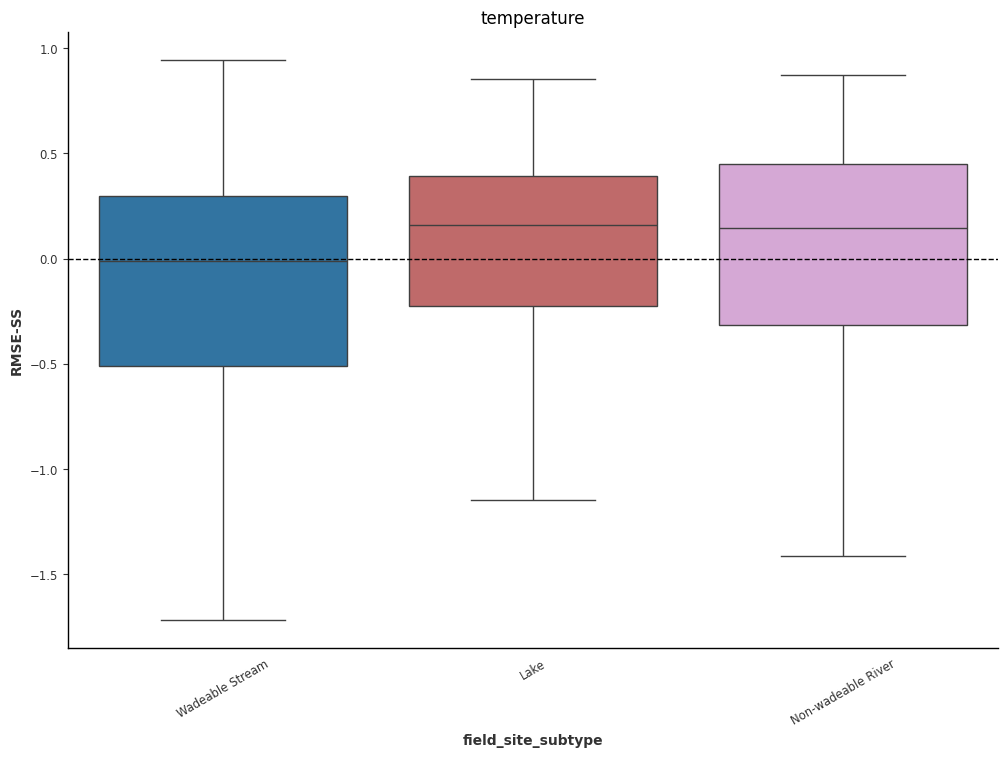

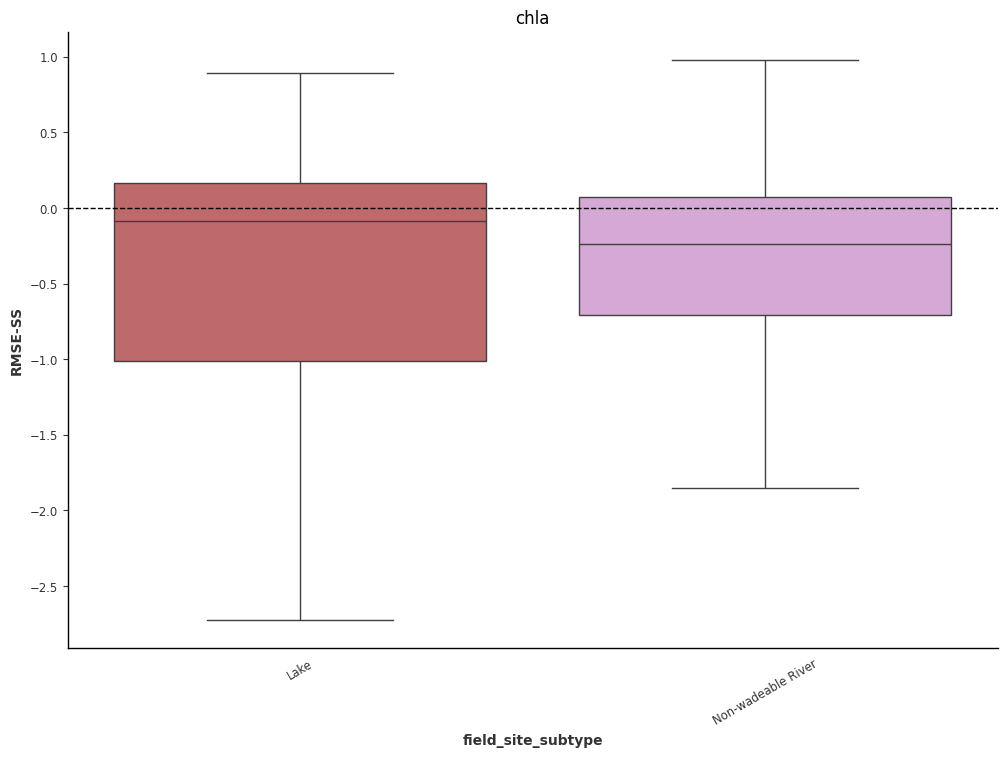

In [9]:
for target_variable in target_variables:
    plot_site_type_percentages_global(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
        historical=False,
    )

#### Model Performance by water body type -- Historical Comparison

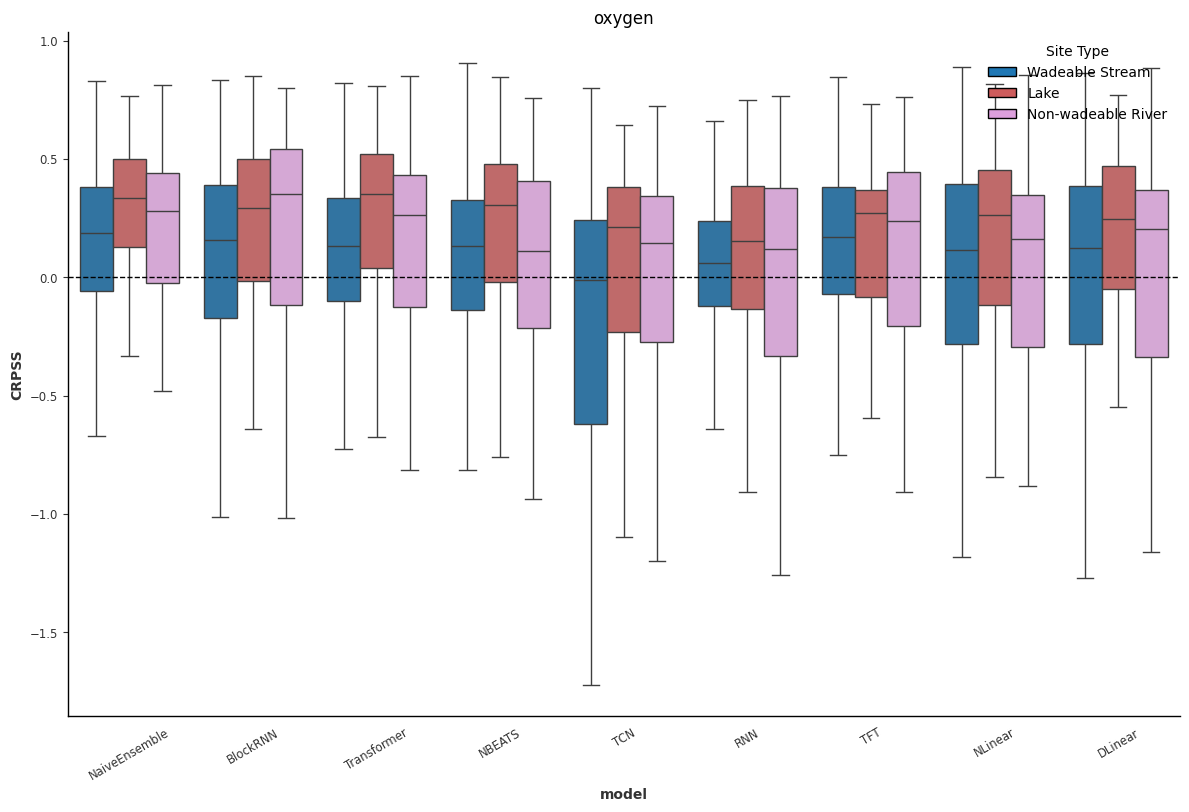

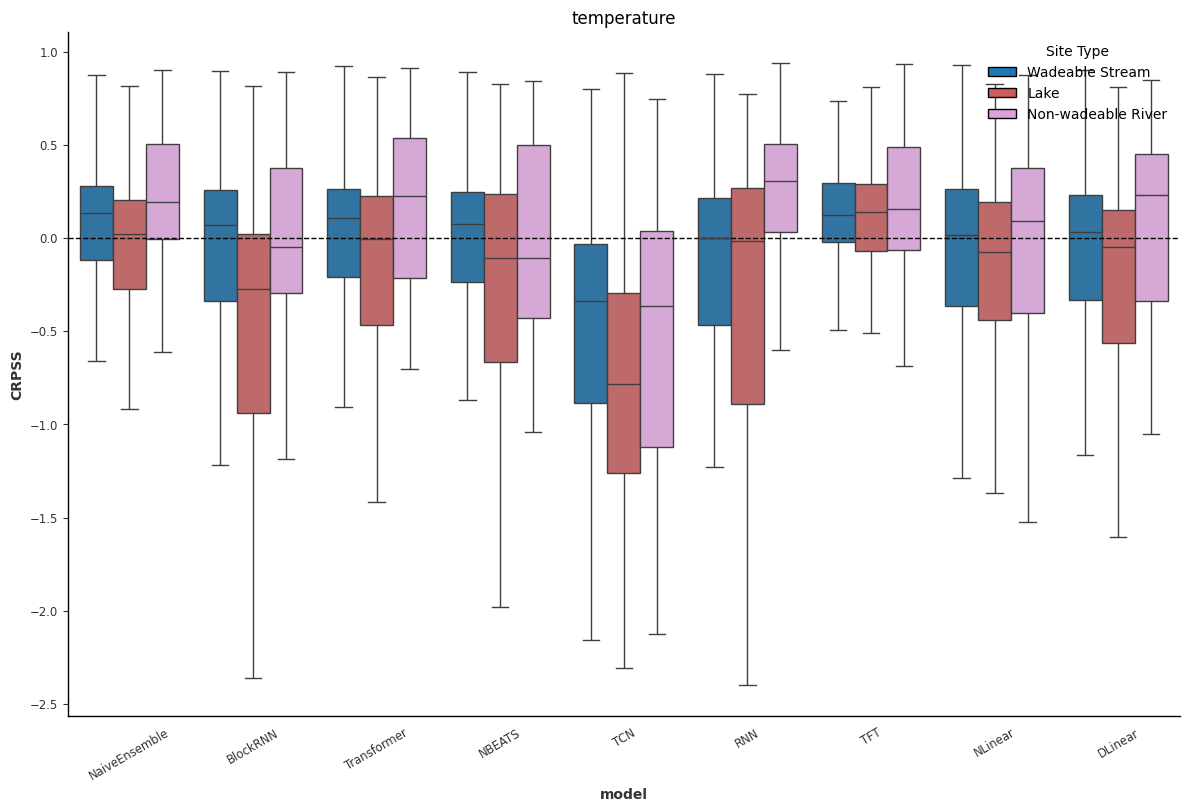

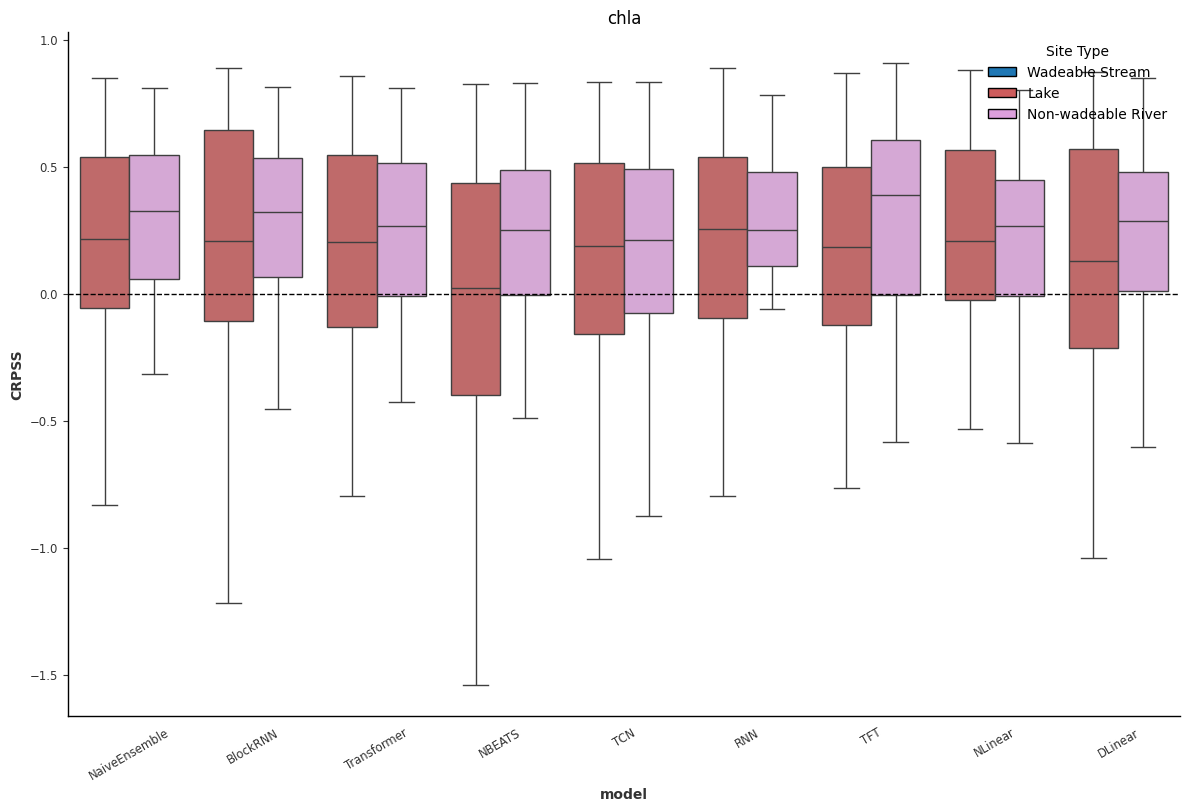

In [10]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
    )

#### Model Performance by water body type -- Naive Comparison

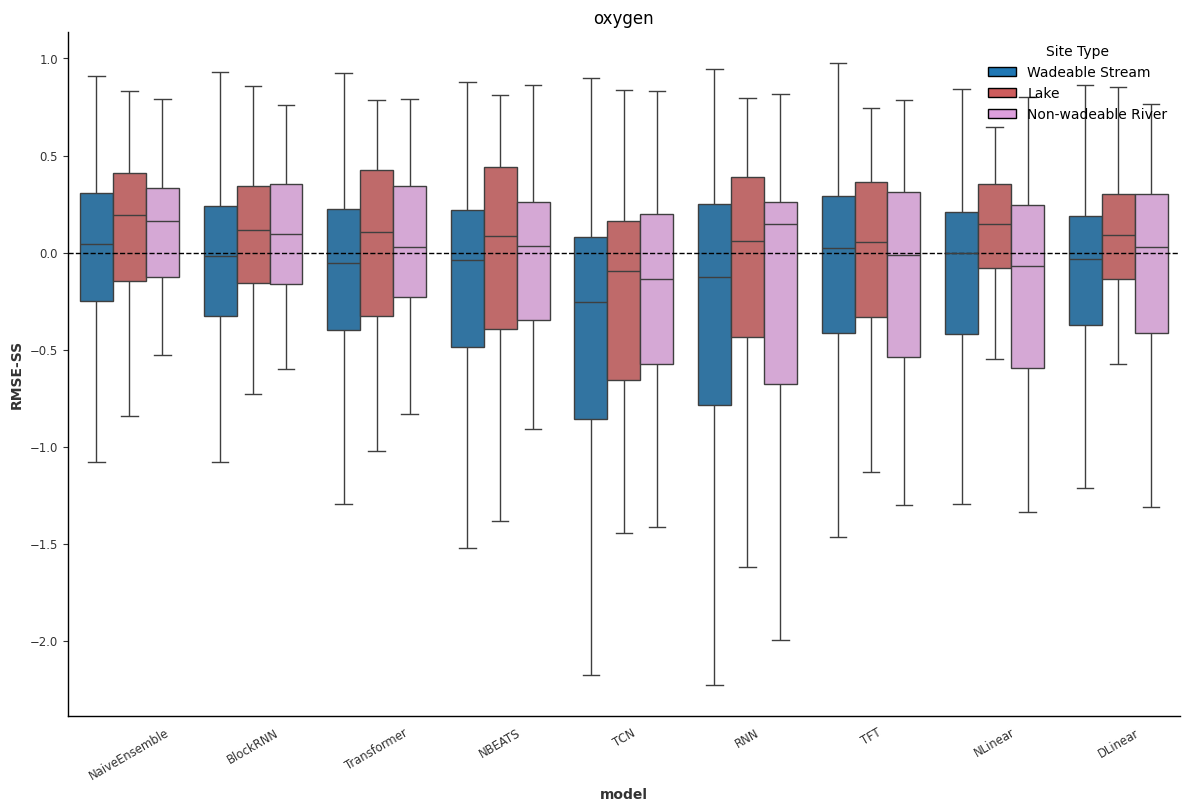

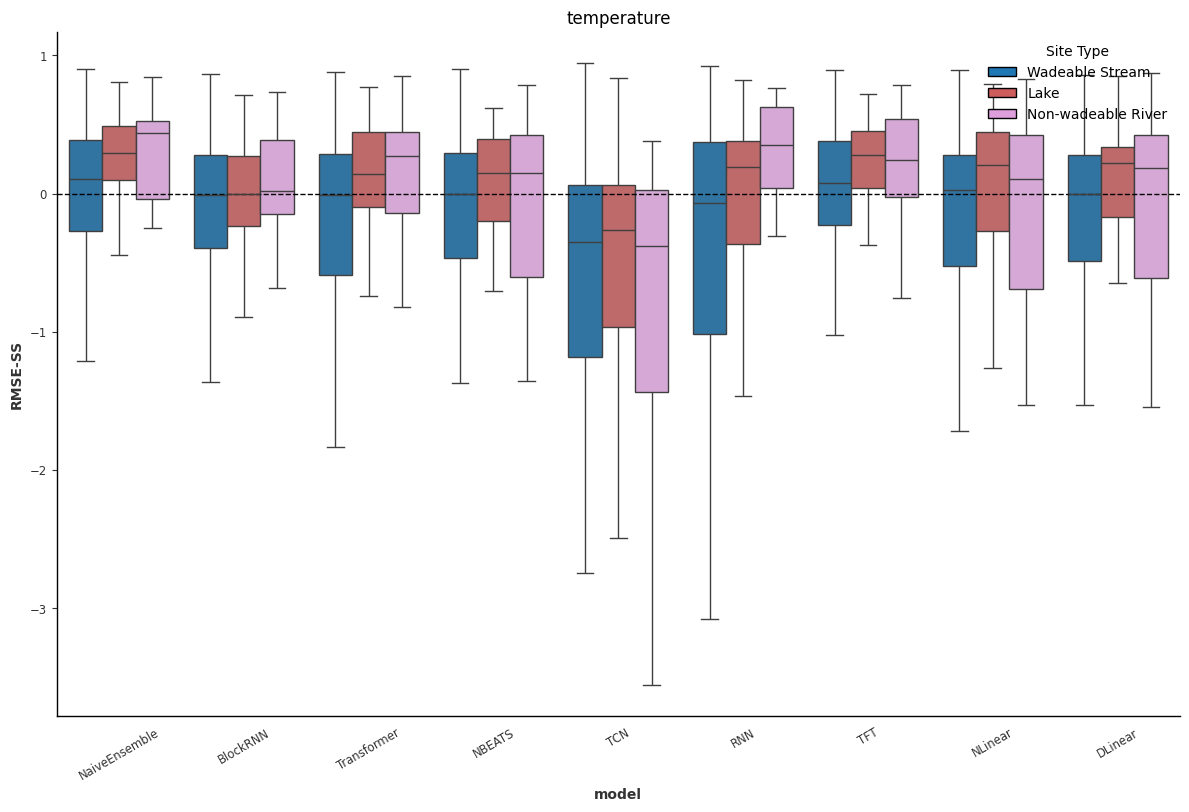

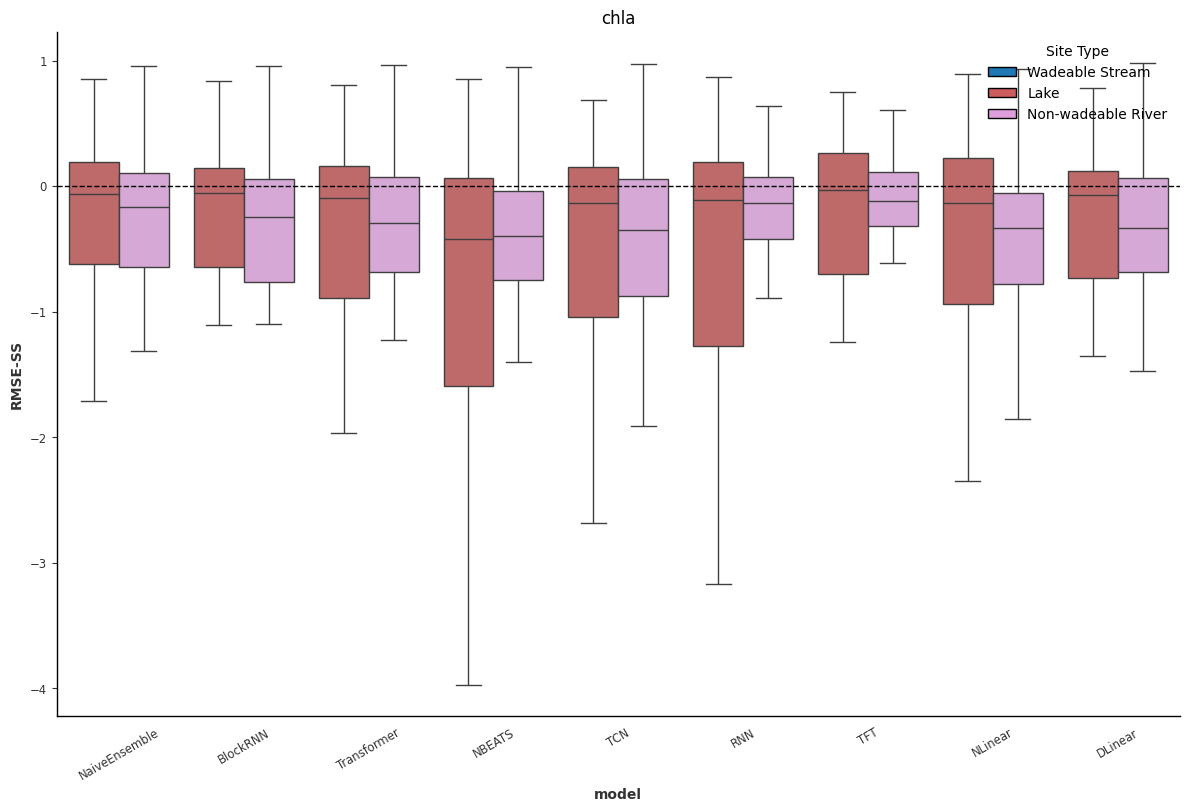

In [11]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
        historical=False,
    )

#### Global Performance over the year -- Historical Comparison

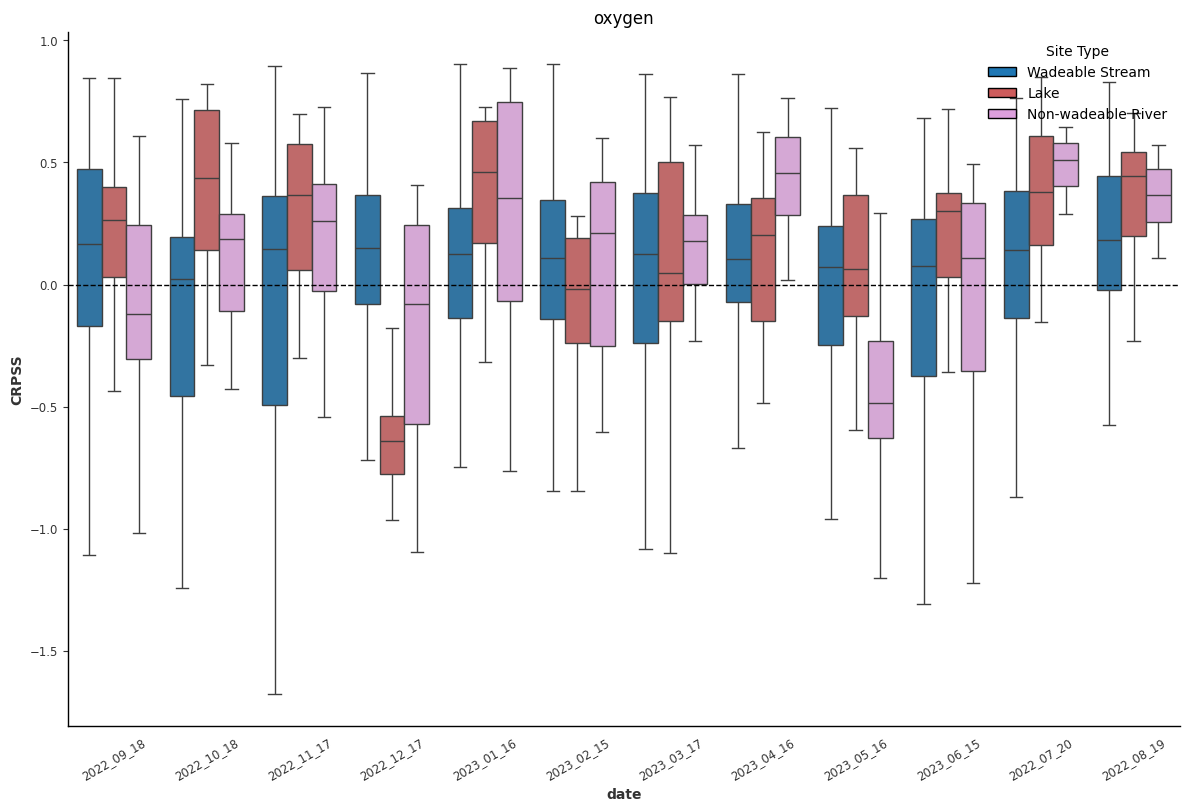

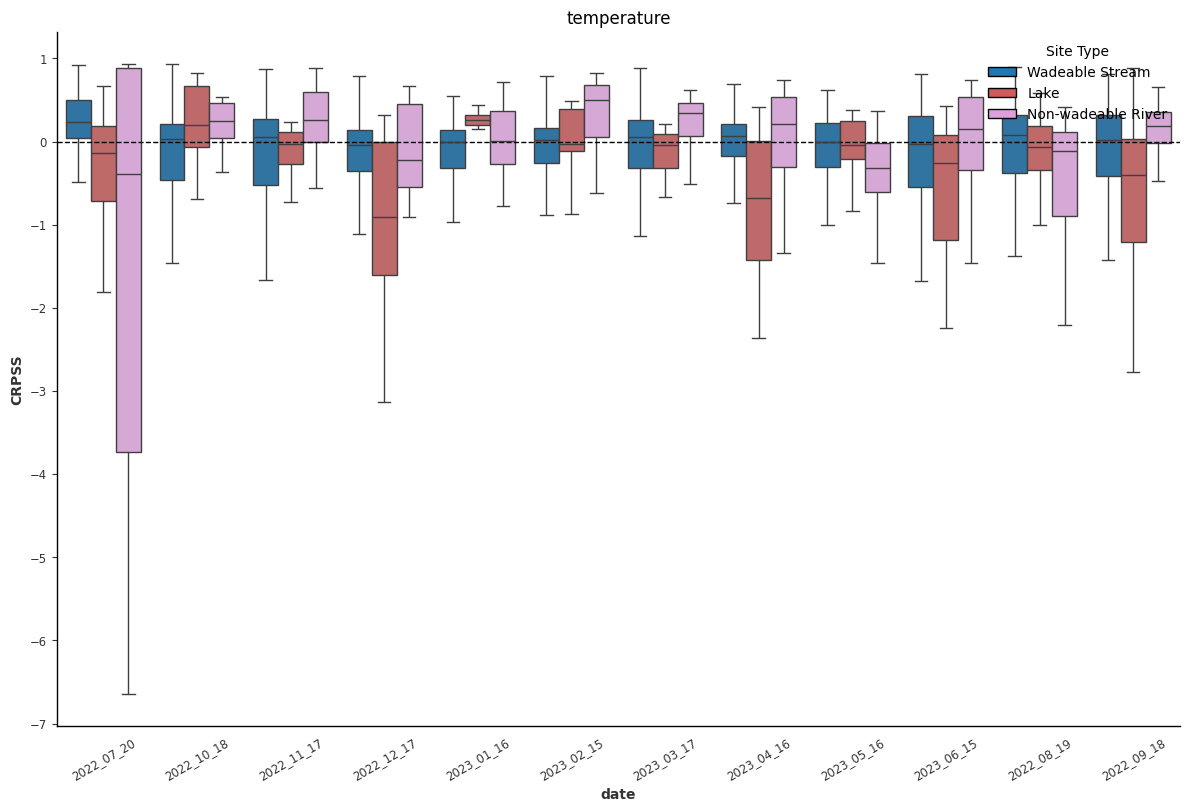

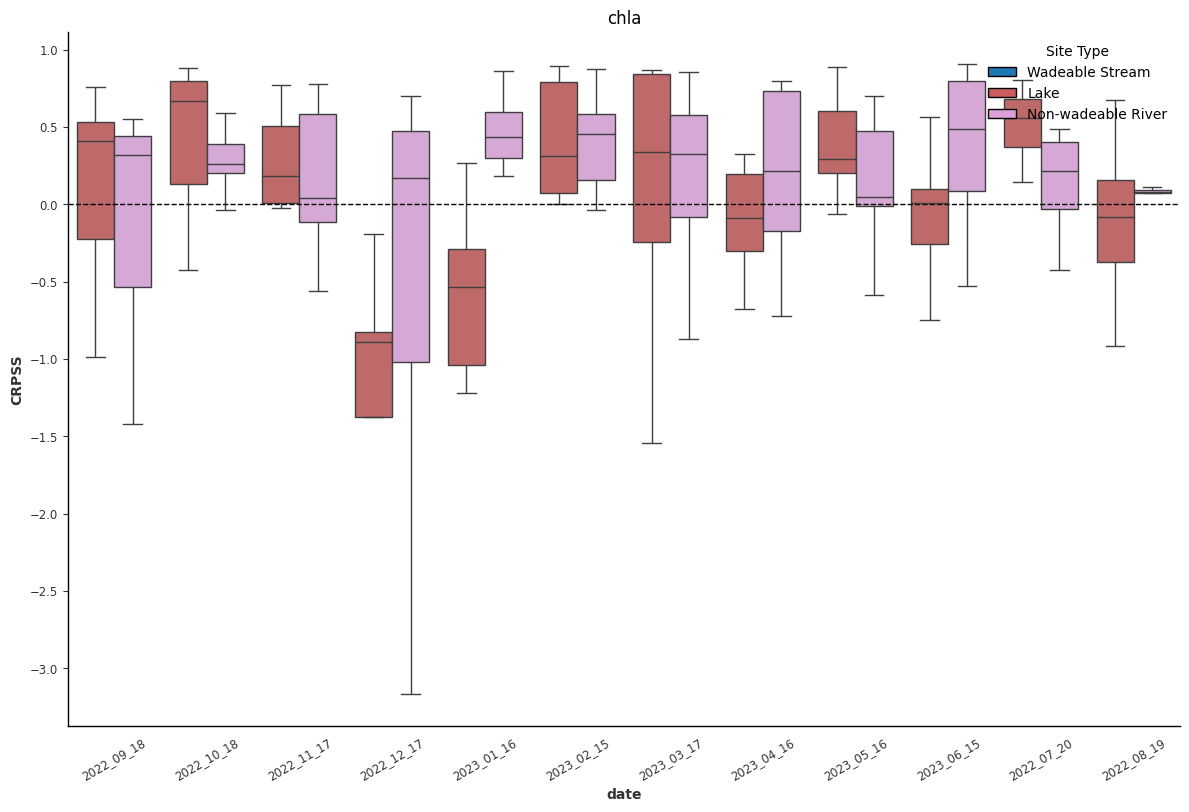

In [12]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}'
    )

#### Global Performance over the year -- Naive Comparison

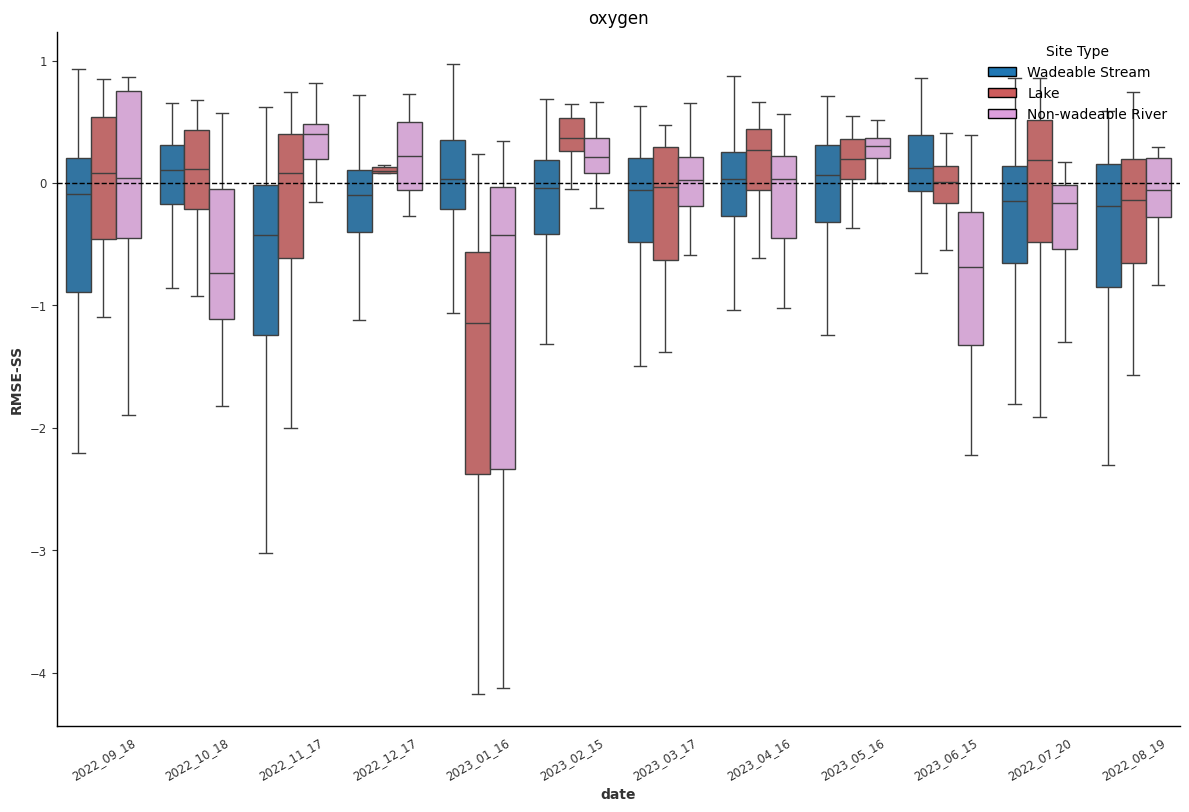

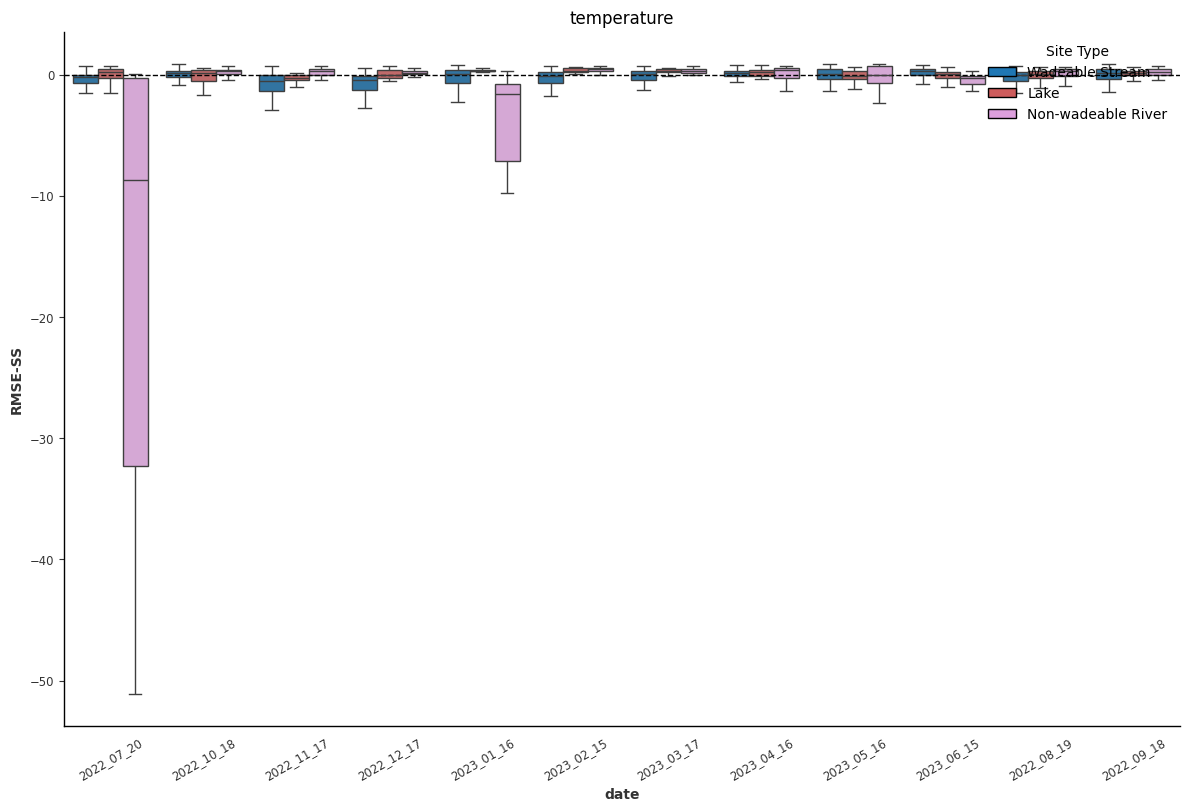

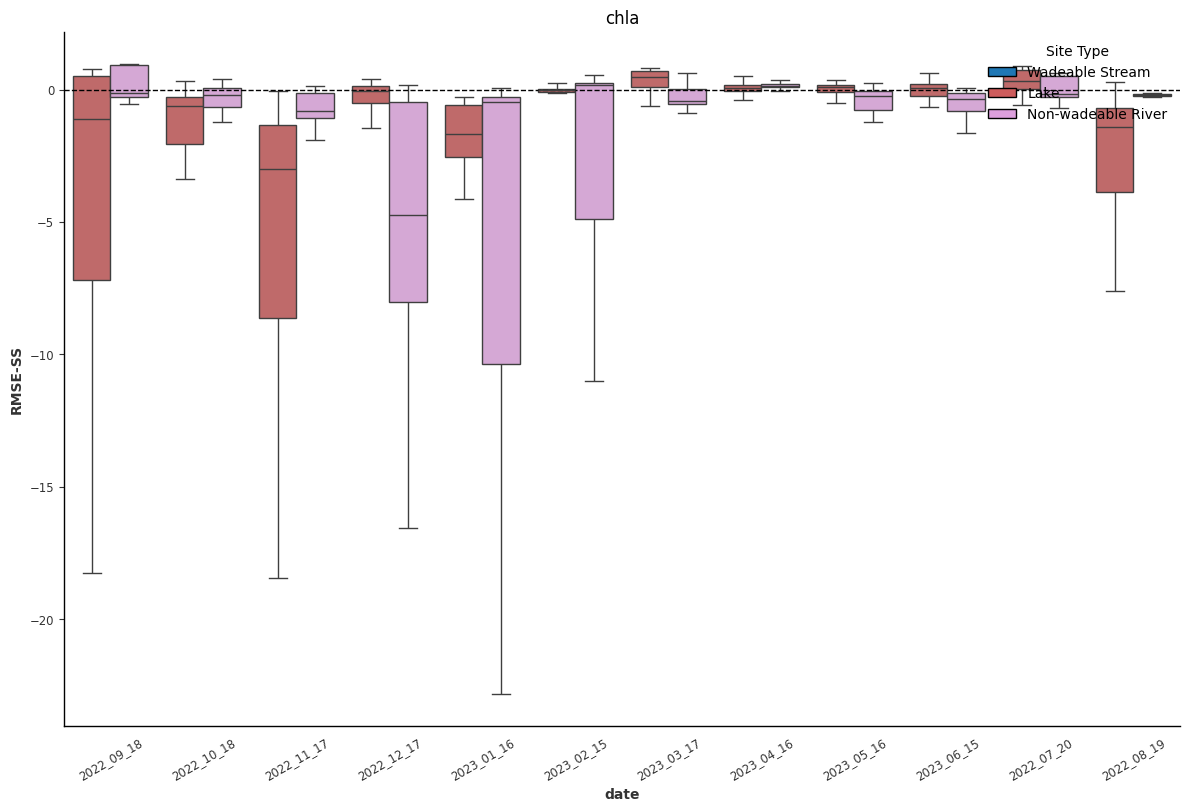

In [13]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
        historical=False
    )

#### Global Performance by Geographical Cluster -- Historical Comparison

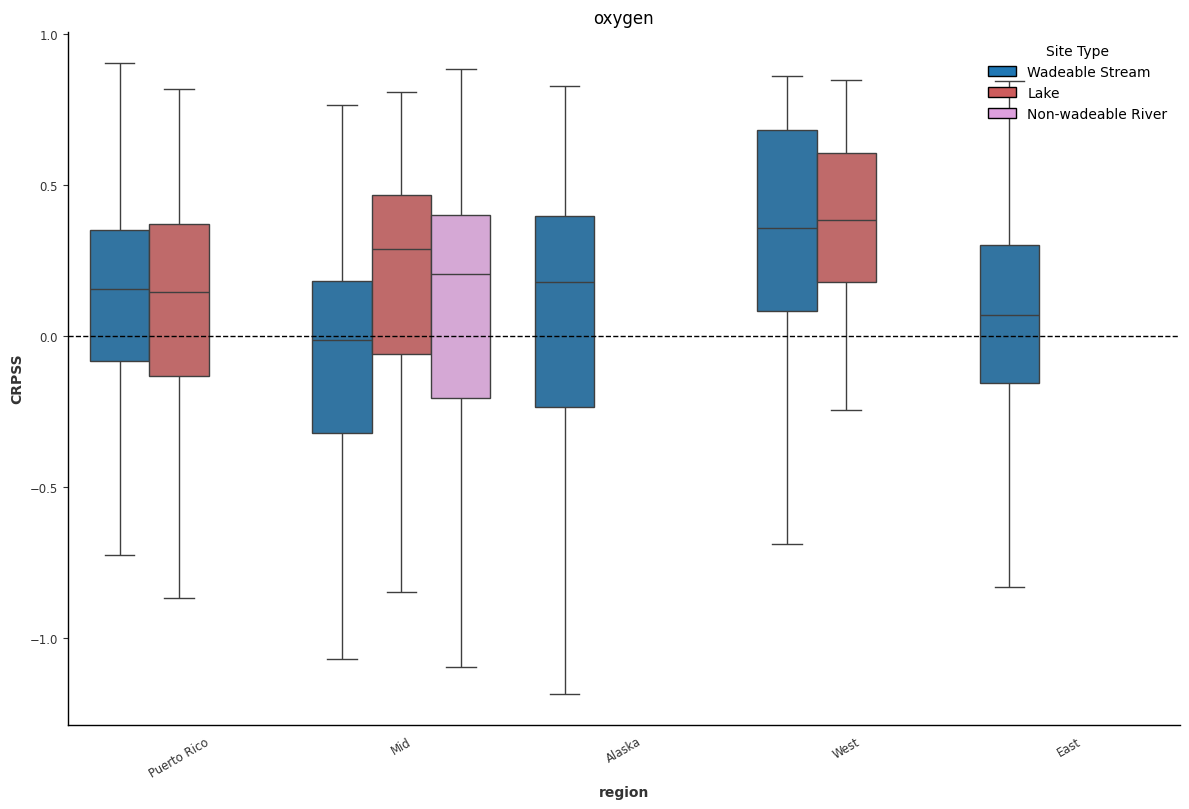

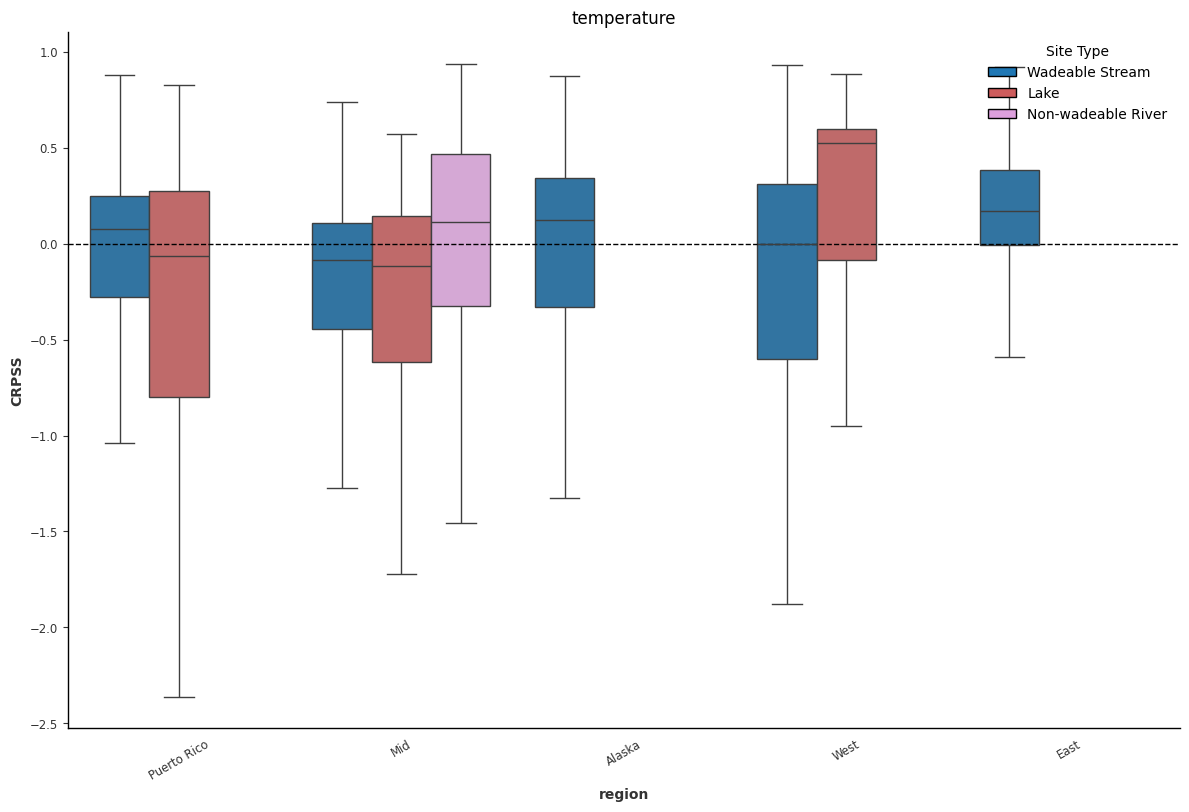

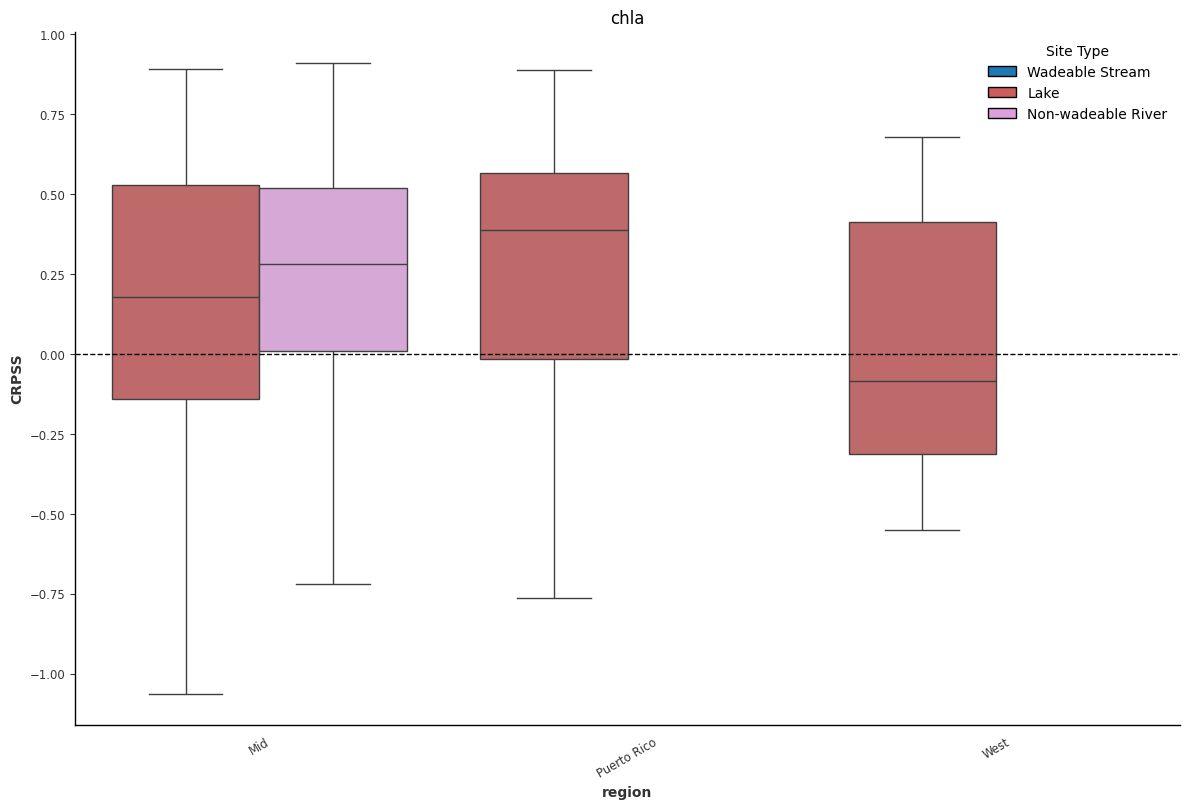

In [14]:
for target_variable in target_variables:
    plot_region_percentages(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
    )

#### Global Performance by Geographical Cluster -- Naive Comparison

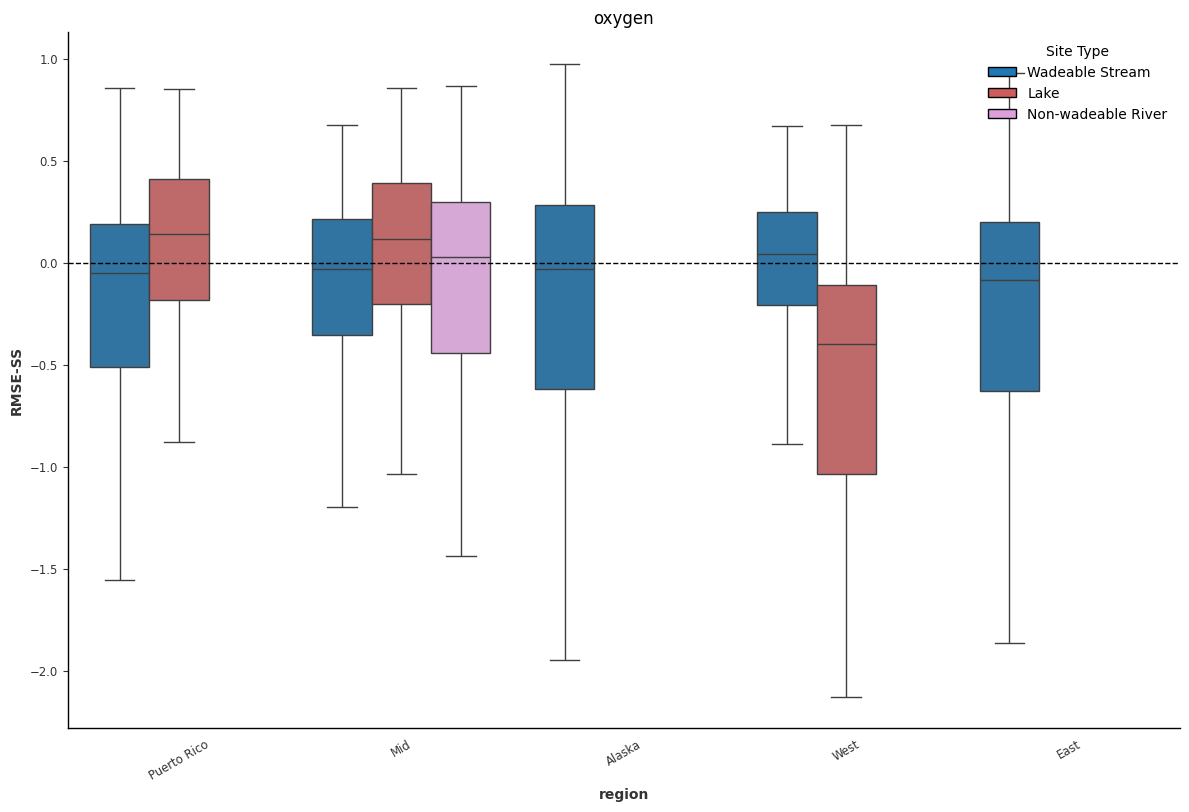

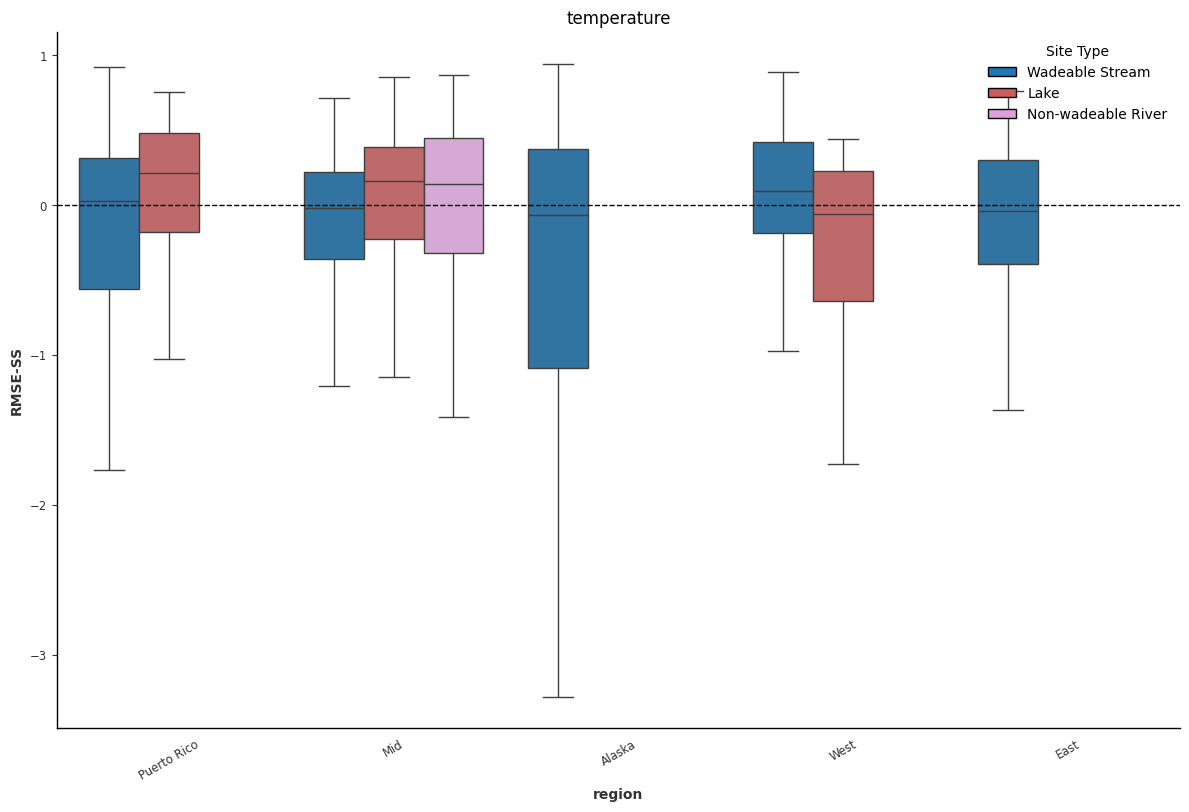

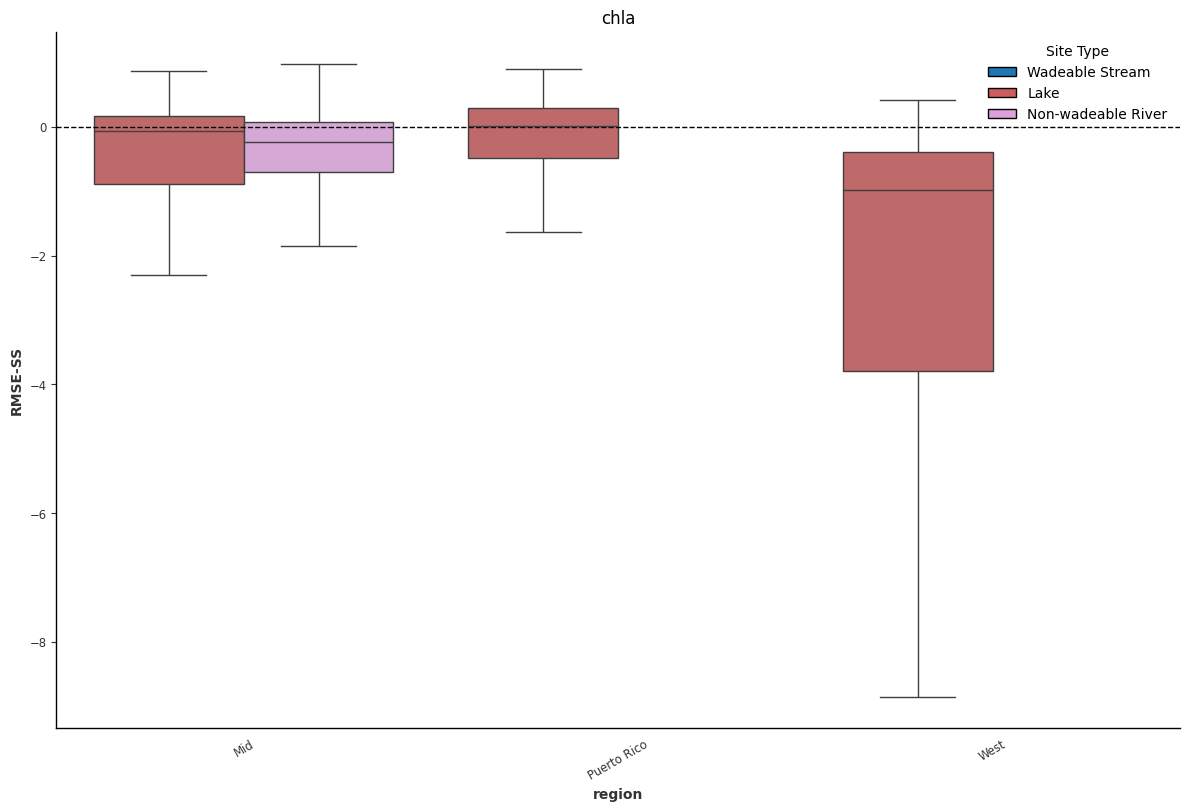

In [15]:
for target_variable in target_variables:
    plot_region_percentages(
        best_performers_dfs[target_variable]['inter'], 
        metadata, 
        f'{target_variable}',
        historical=False
    )

#### Global Performance by Site -- Historical

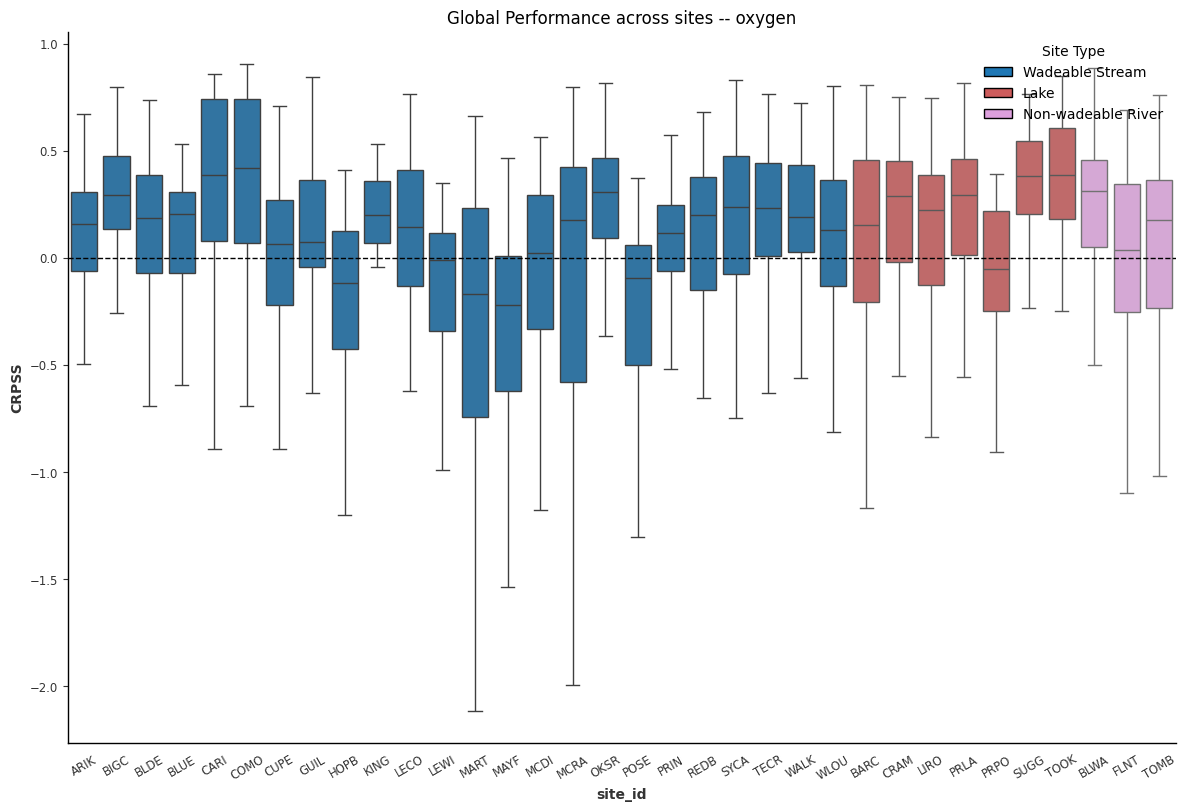

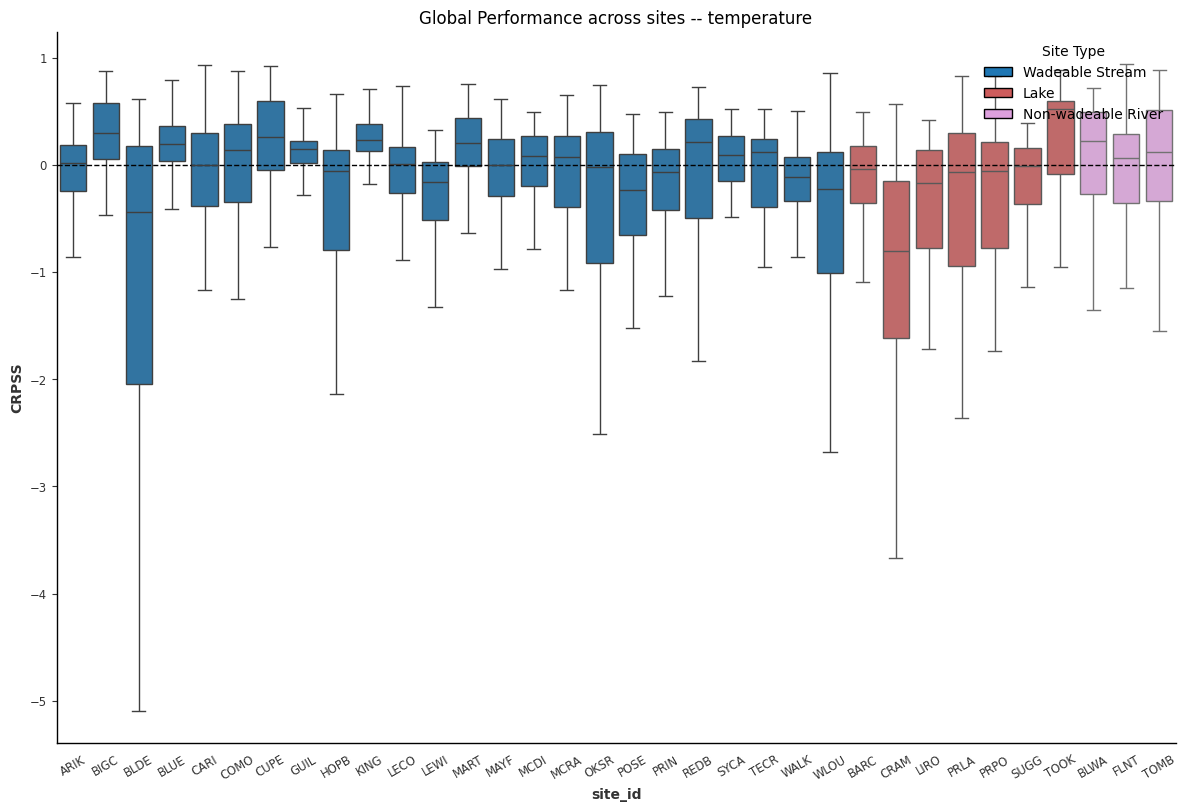

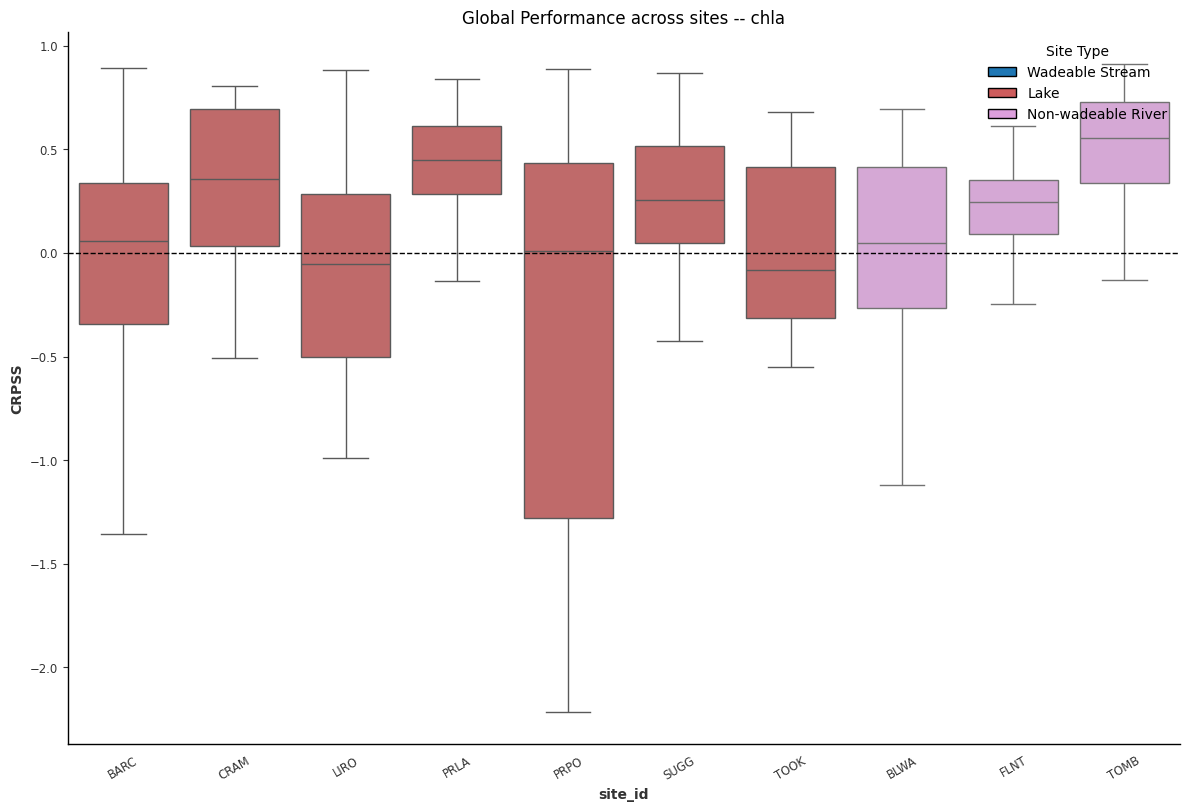

In [24]:
for variable in ['oxygen', 'temperature', 'chla']:
    plot_improvement_bysite(
        best_performers_dfs[variable]['inter'], 
        metadata, 
        f'Global Performance across sites -- {variable}'
    )

#### Global Performance by Site -- Naive

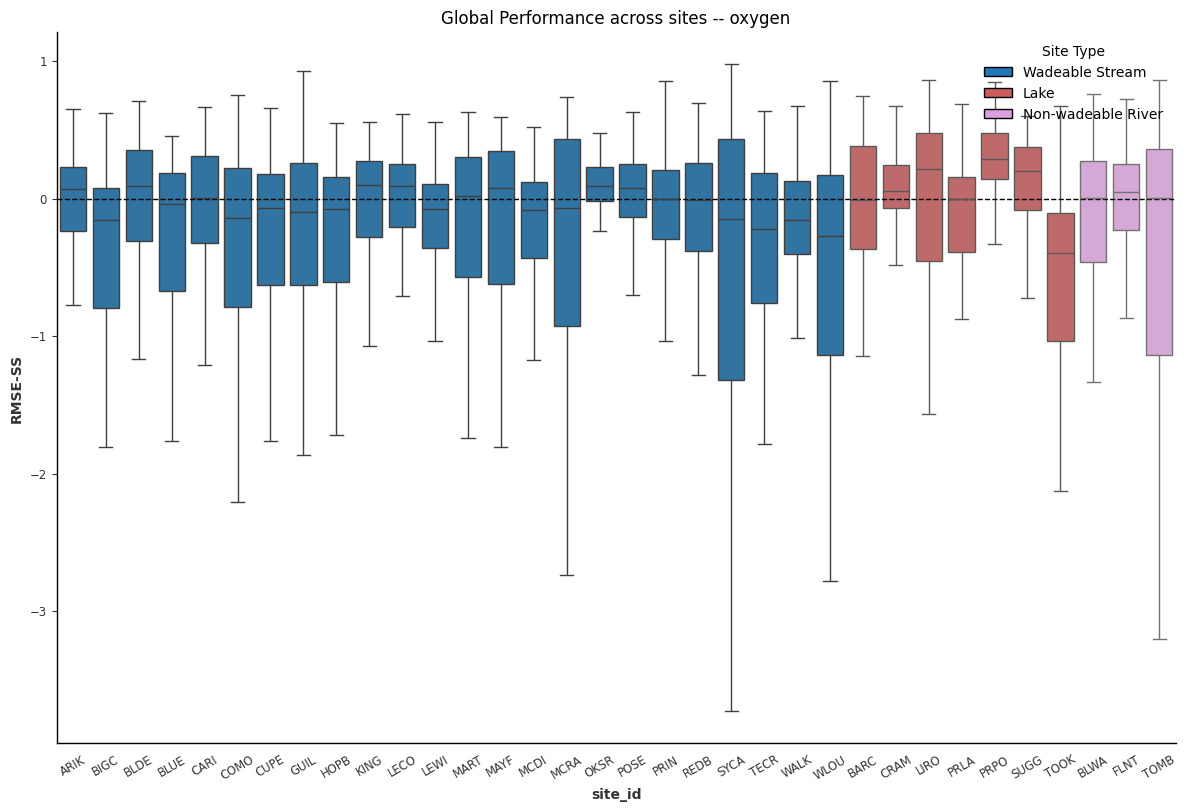

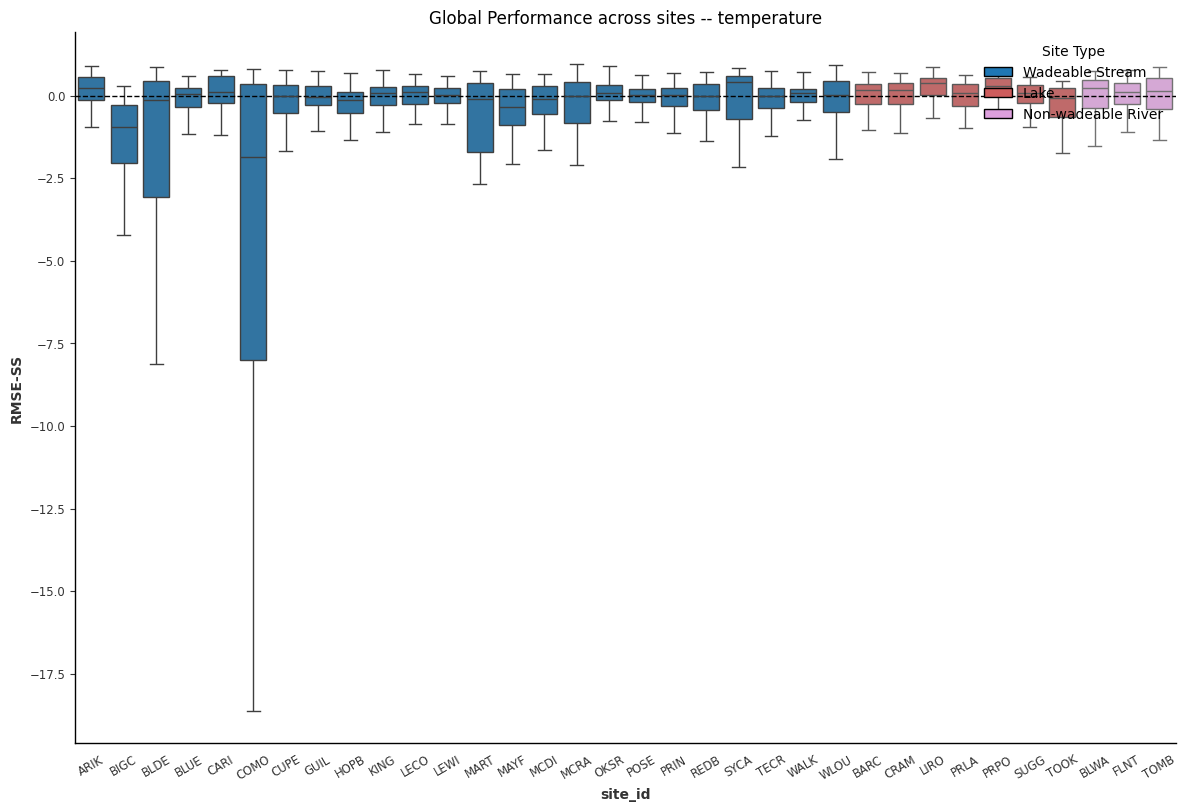

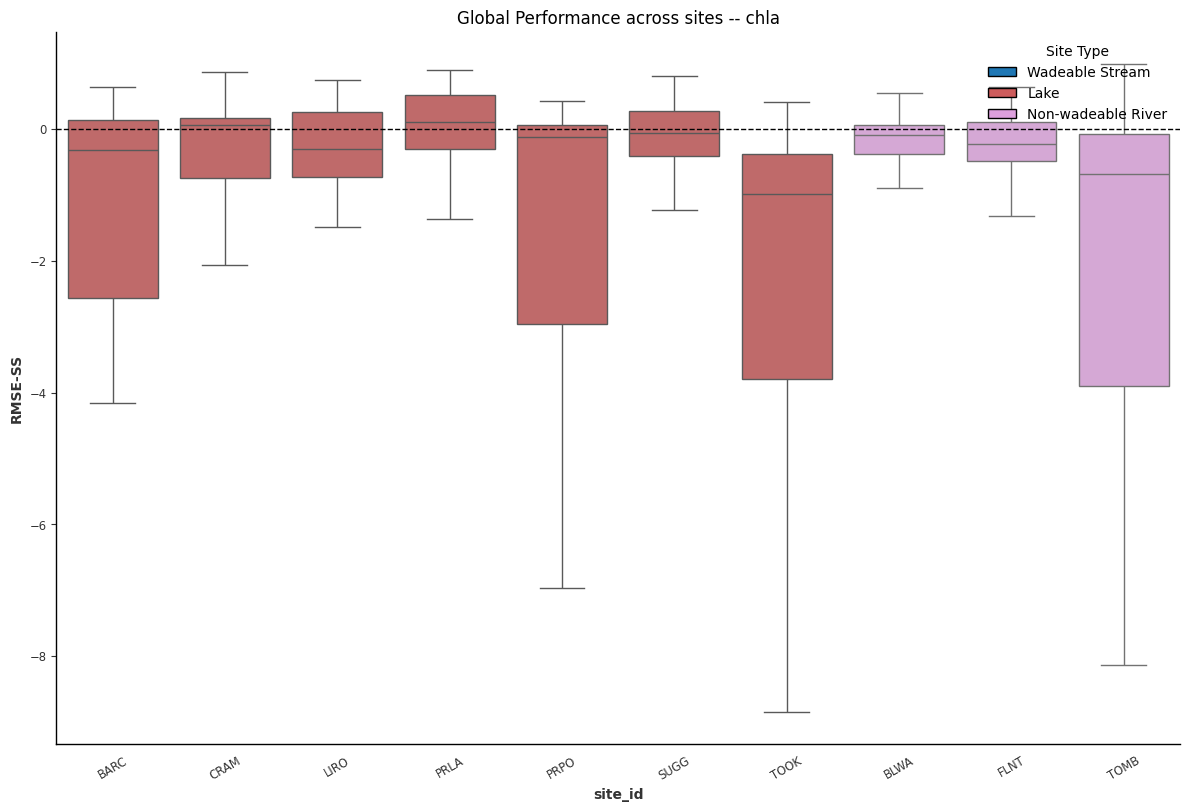

In [25]:
for variable in ['oxygen', 'temperature', 'chla']:
    plot_improvement_bysite(
        best_performers_dfs[variable]['inter'], 
        metadata, 
        f'Global Performance across sites -- {variable}',
        historical=False,
    )

#### Model Performance by Site -- Historical -- Oxygen

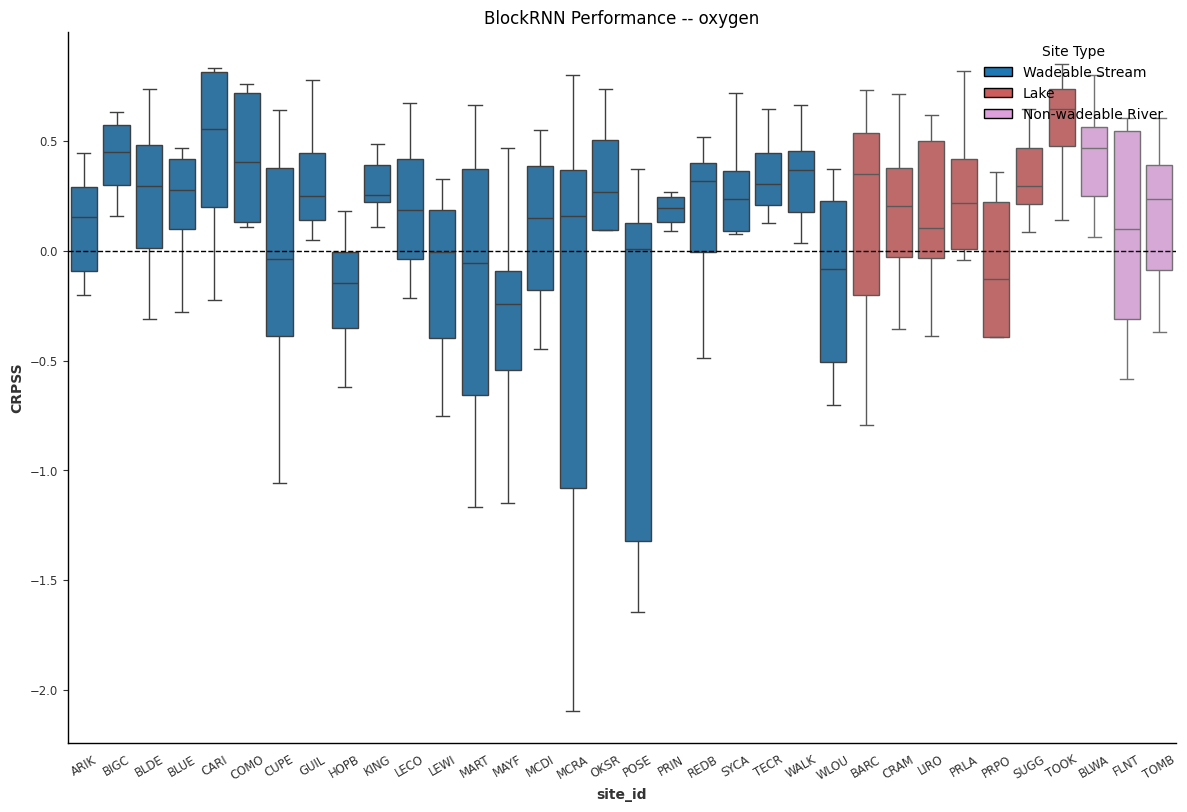

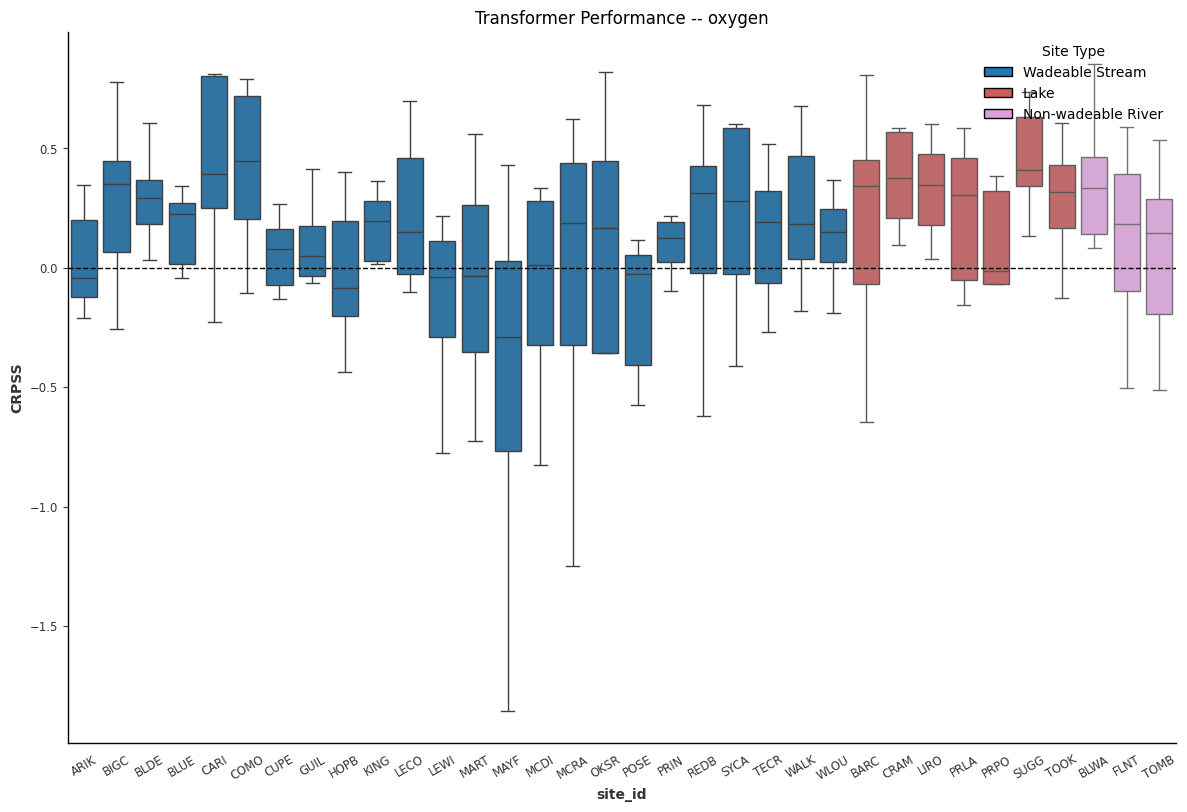

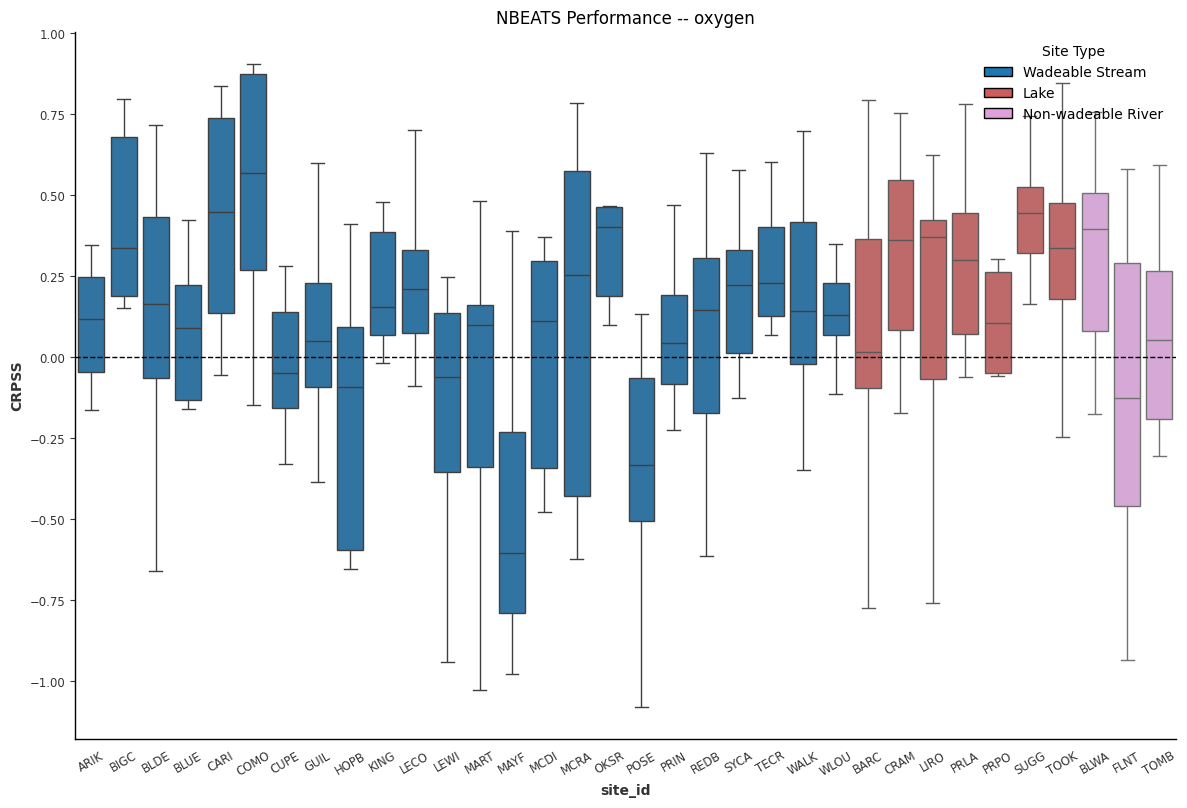

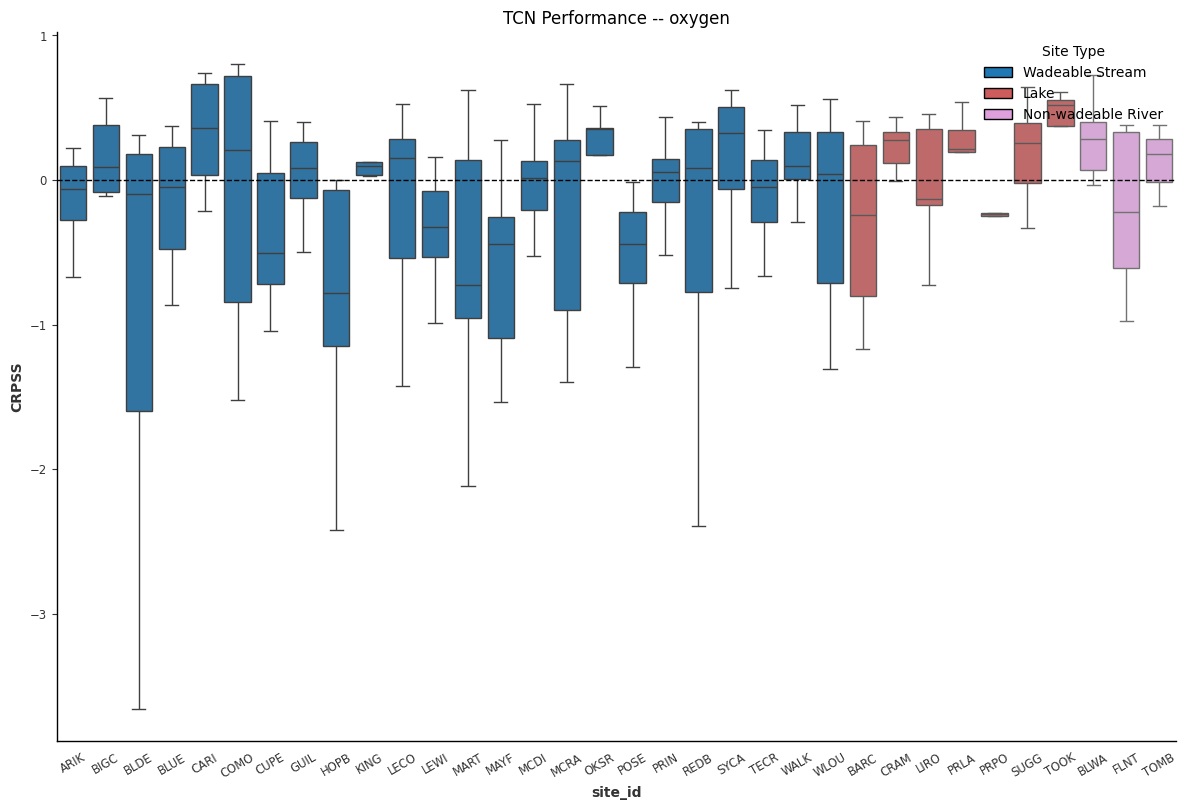

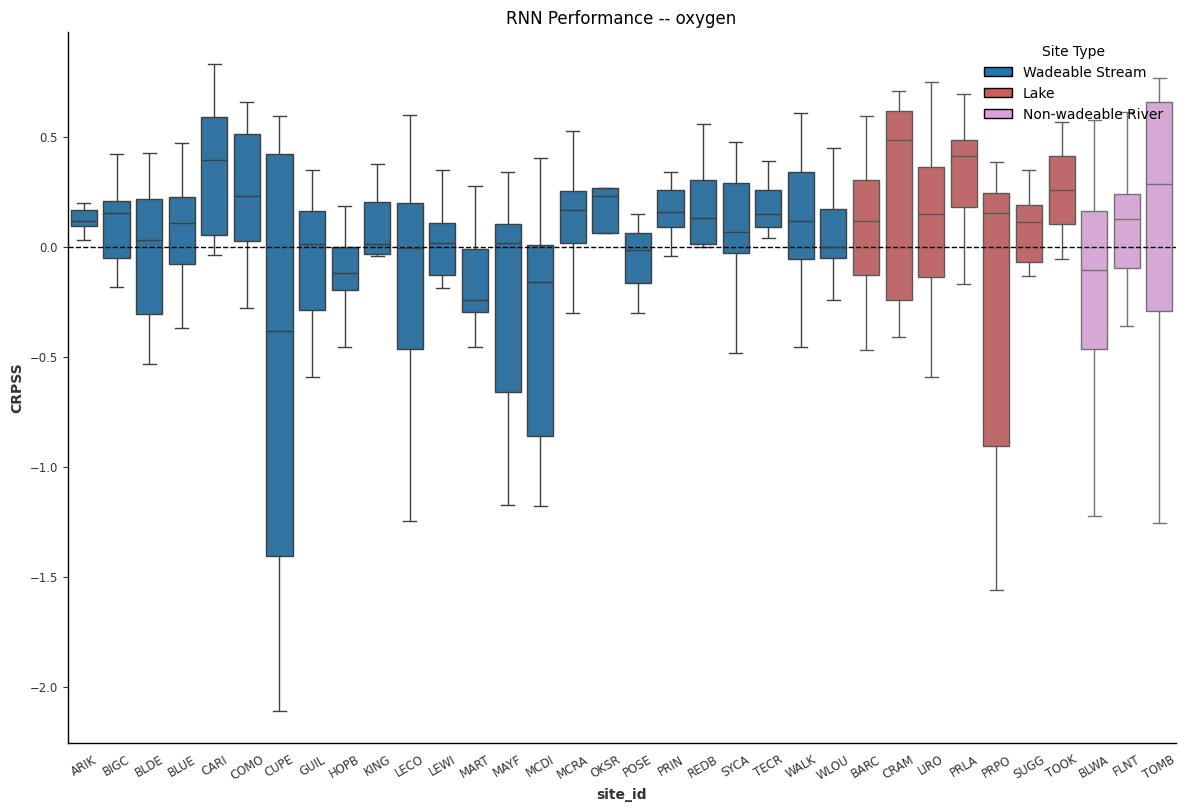

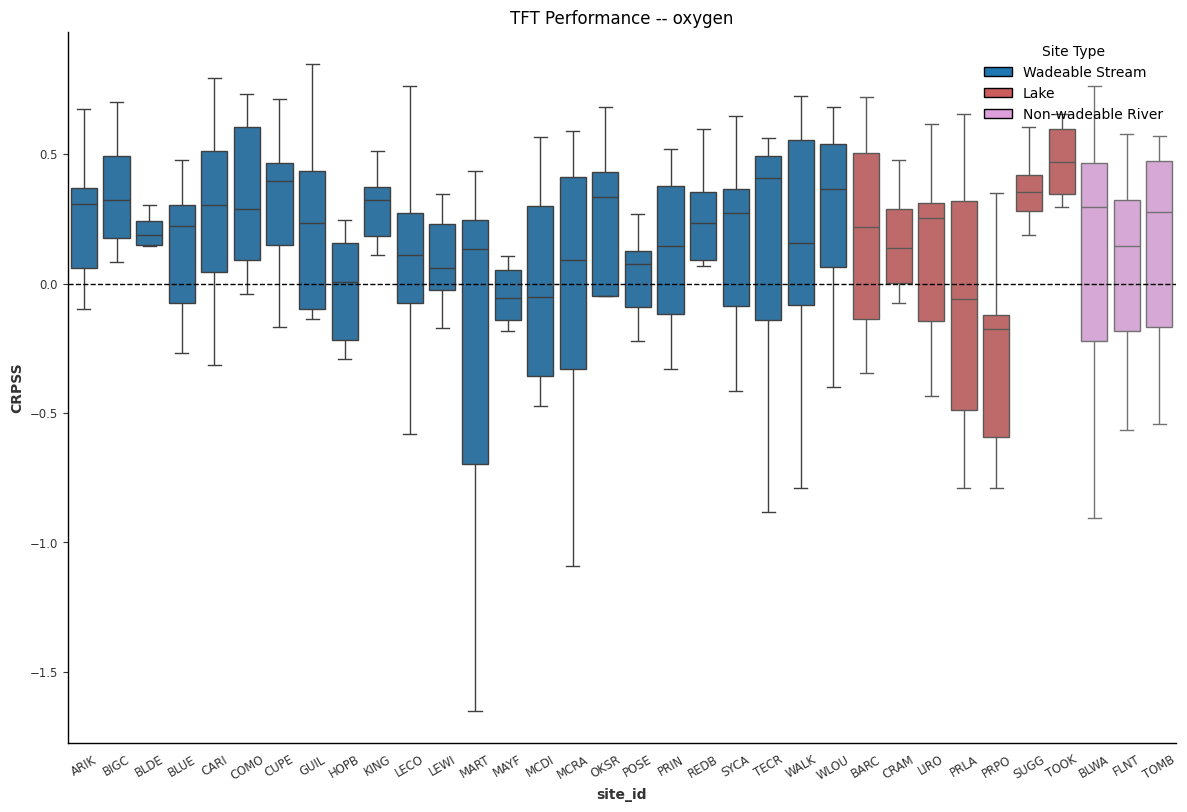

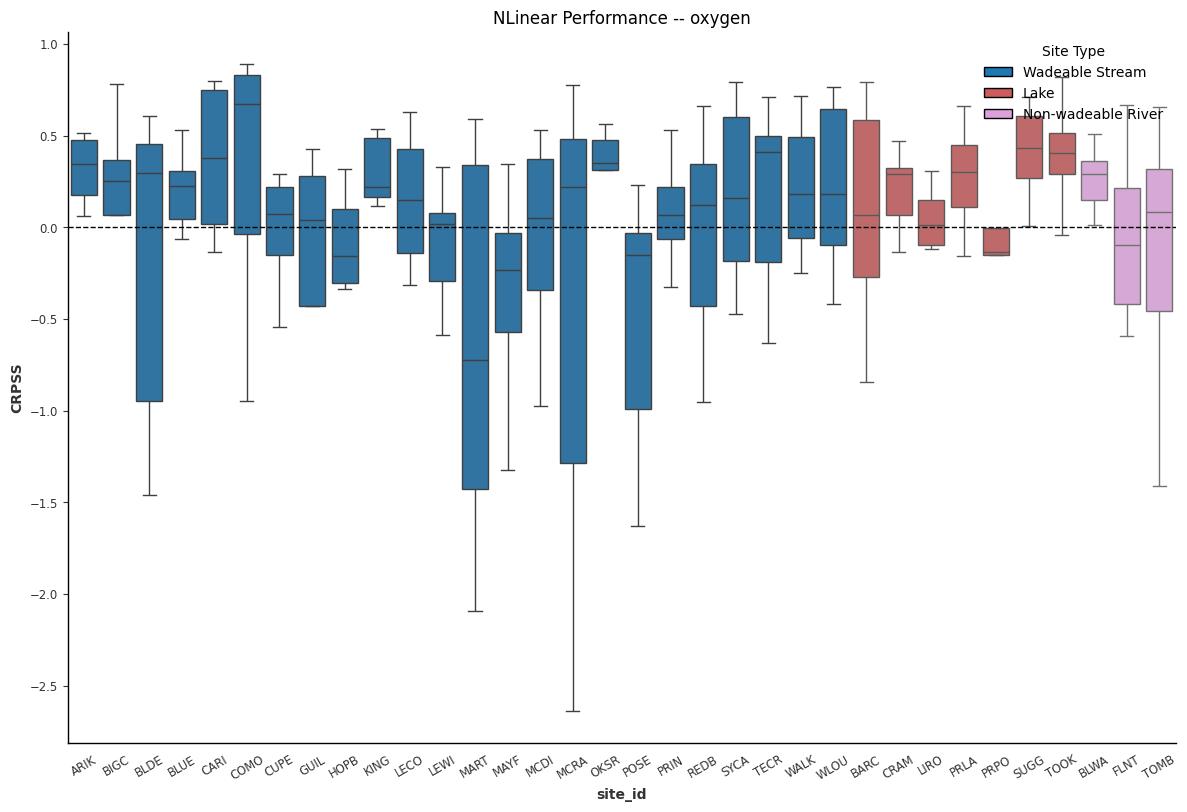

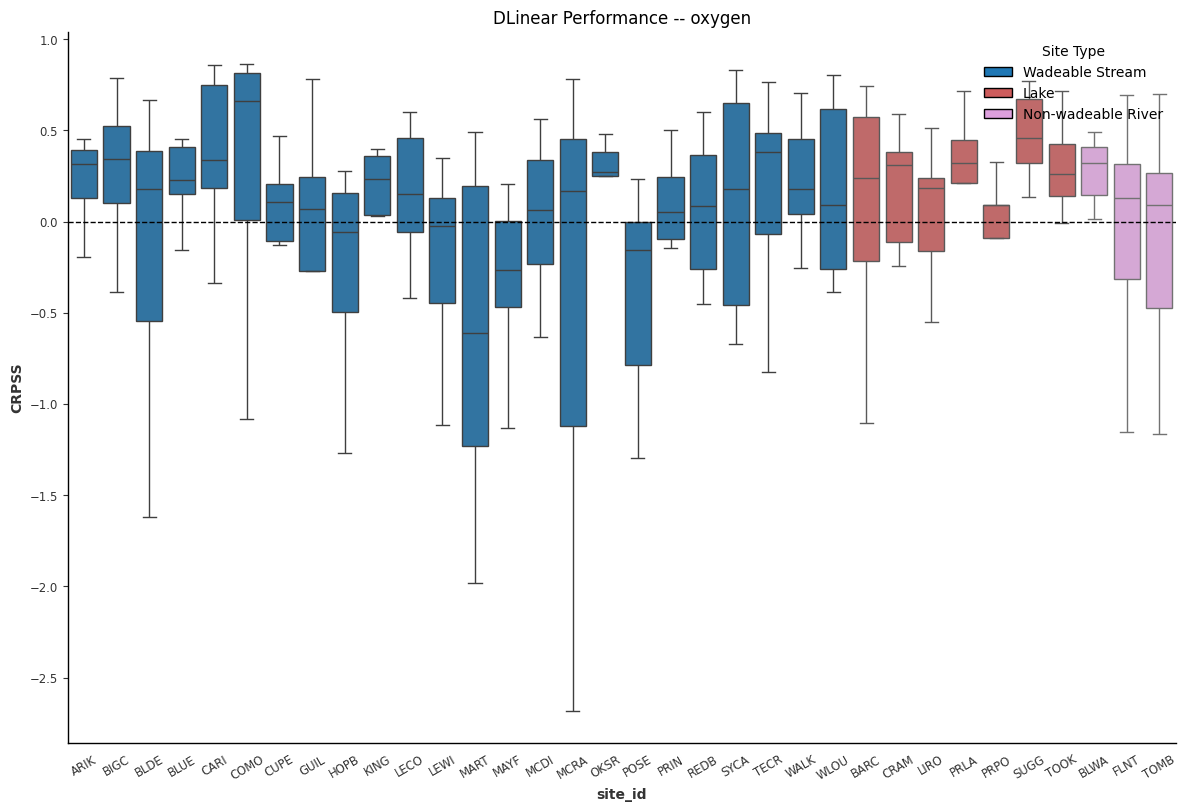

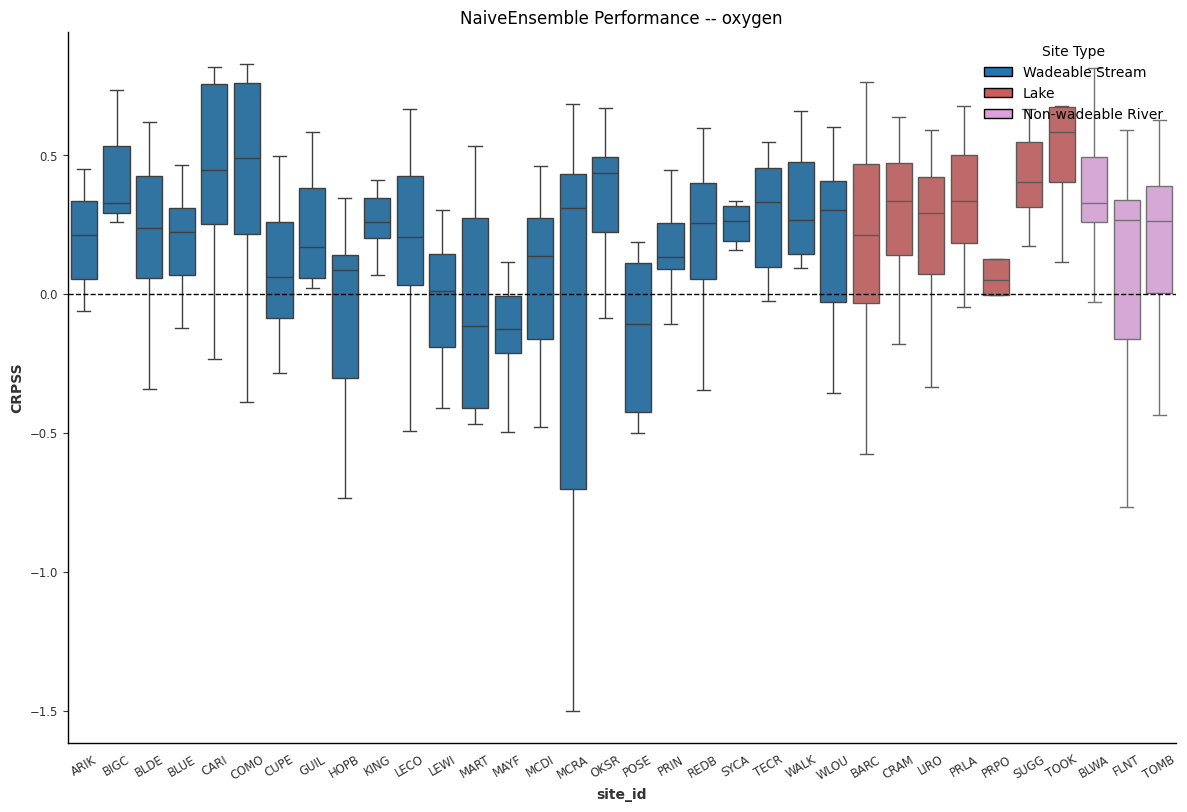

In [21]:
variable = 'oxygen'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}'
    )

#### Model Performance by Site -- Historical -- Temperature

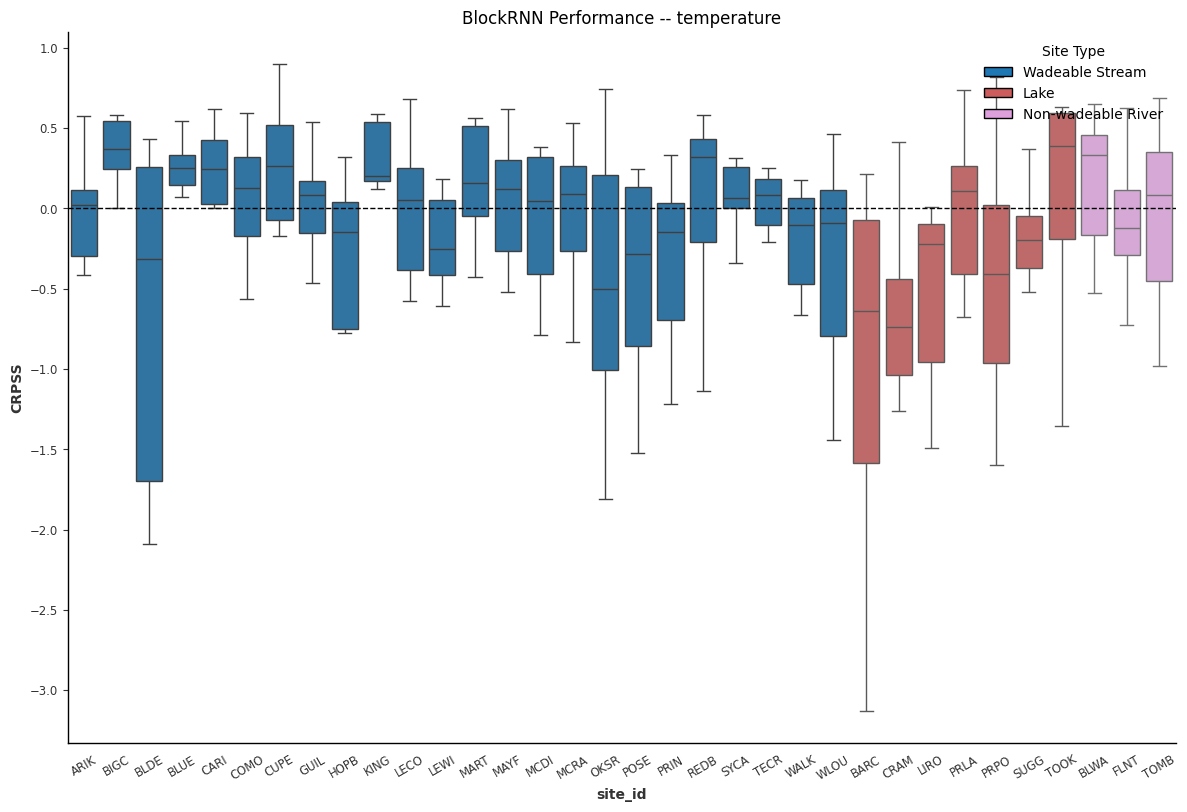

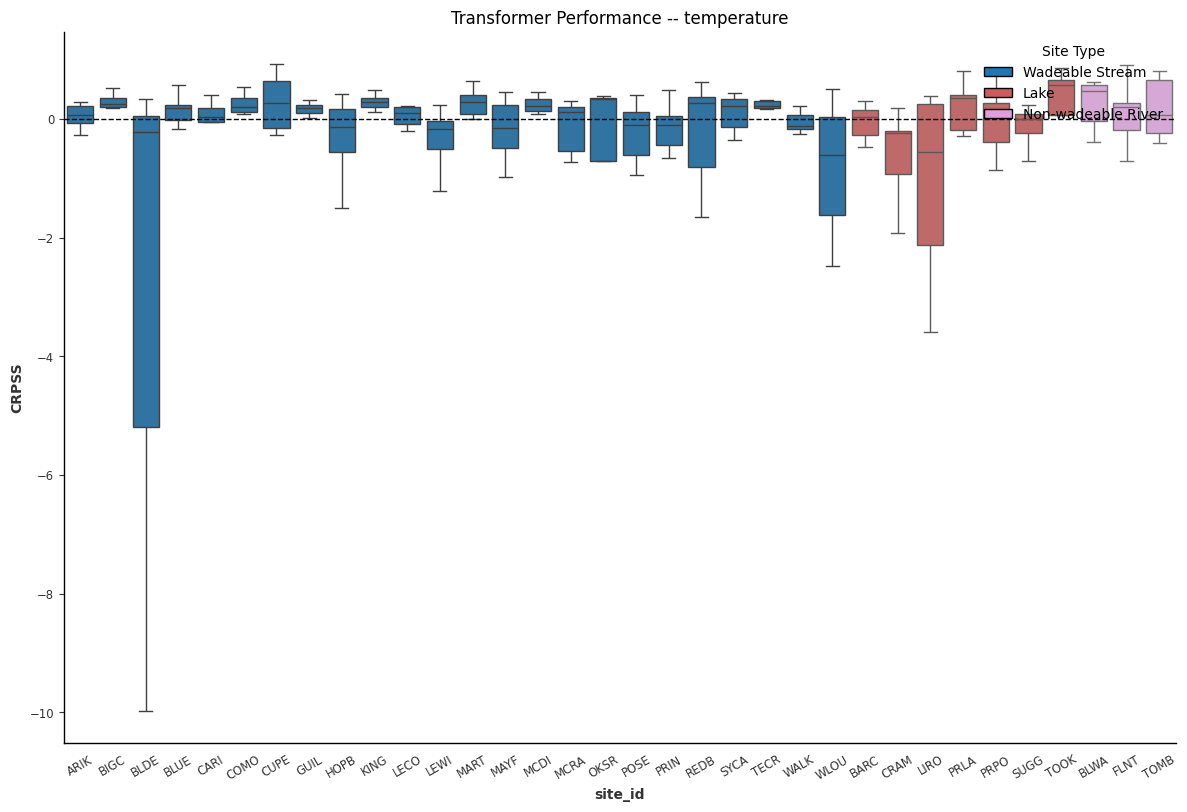

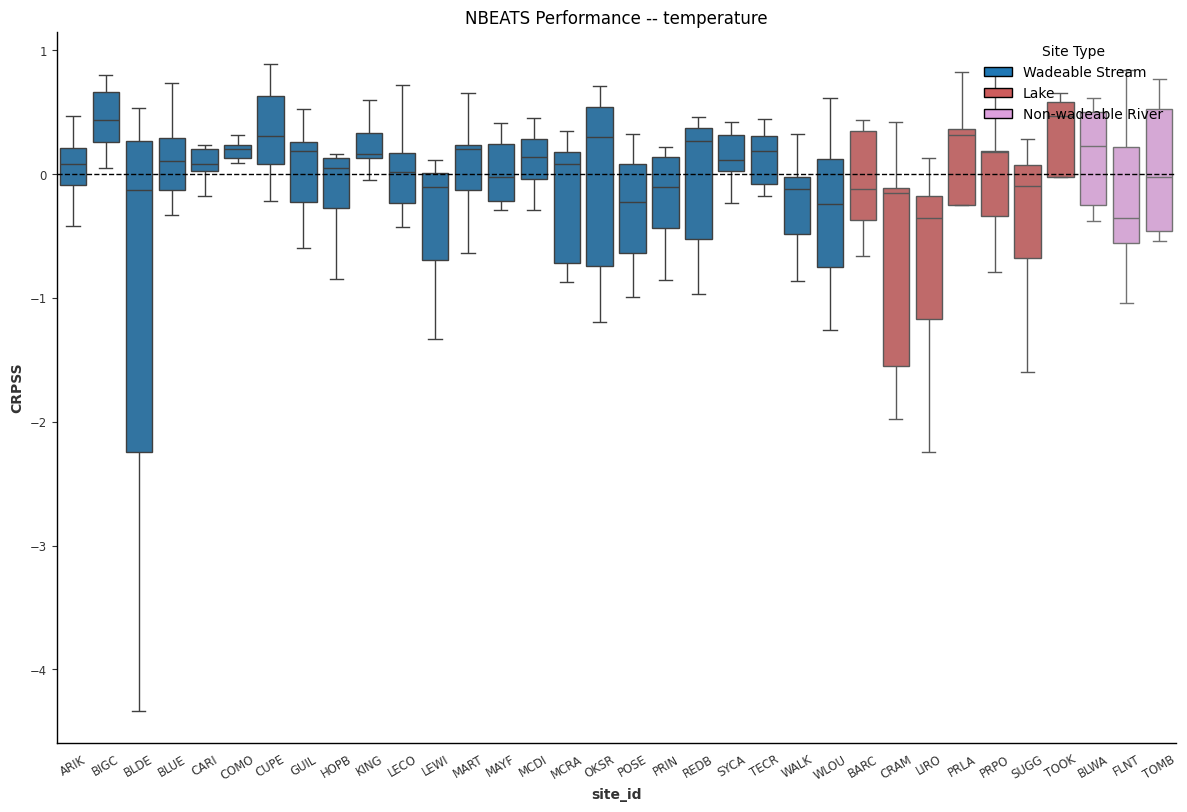

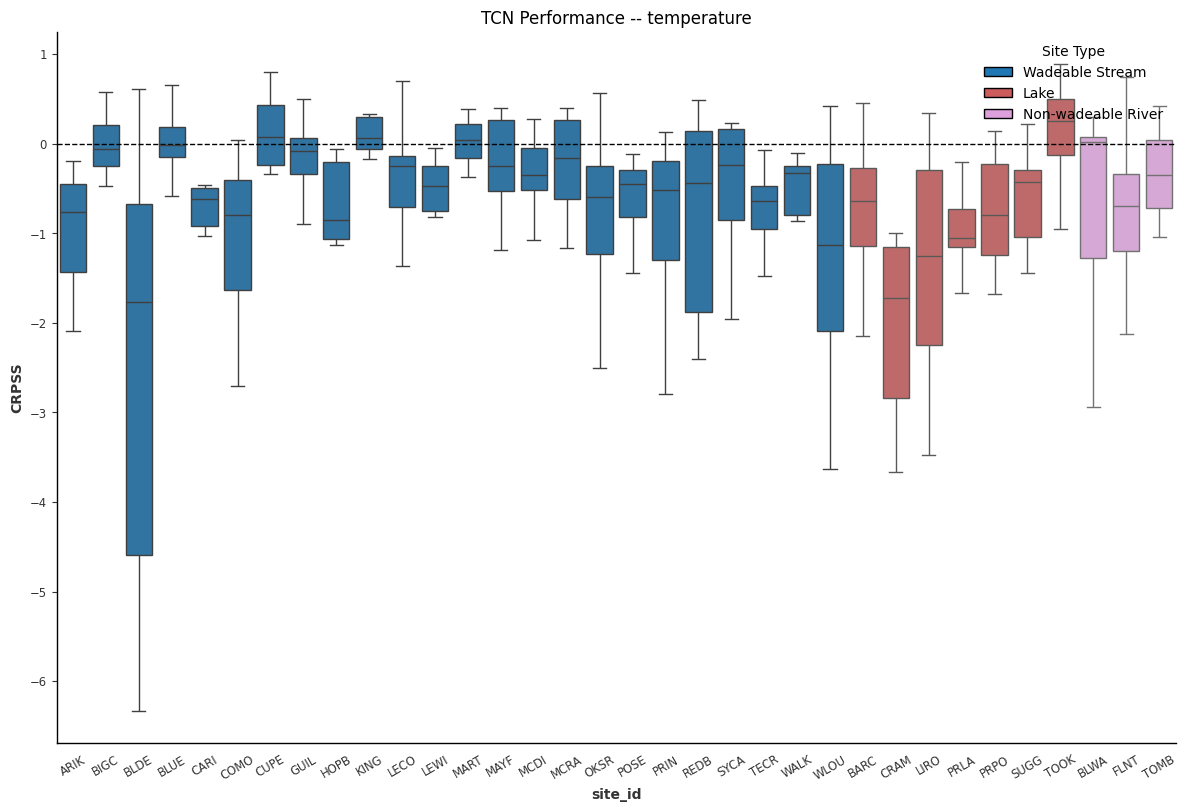

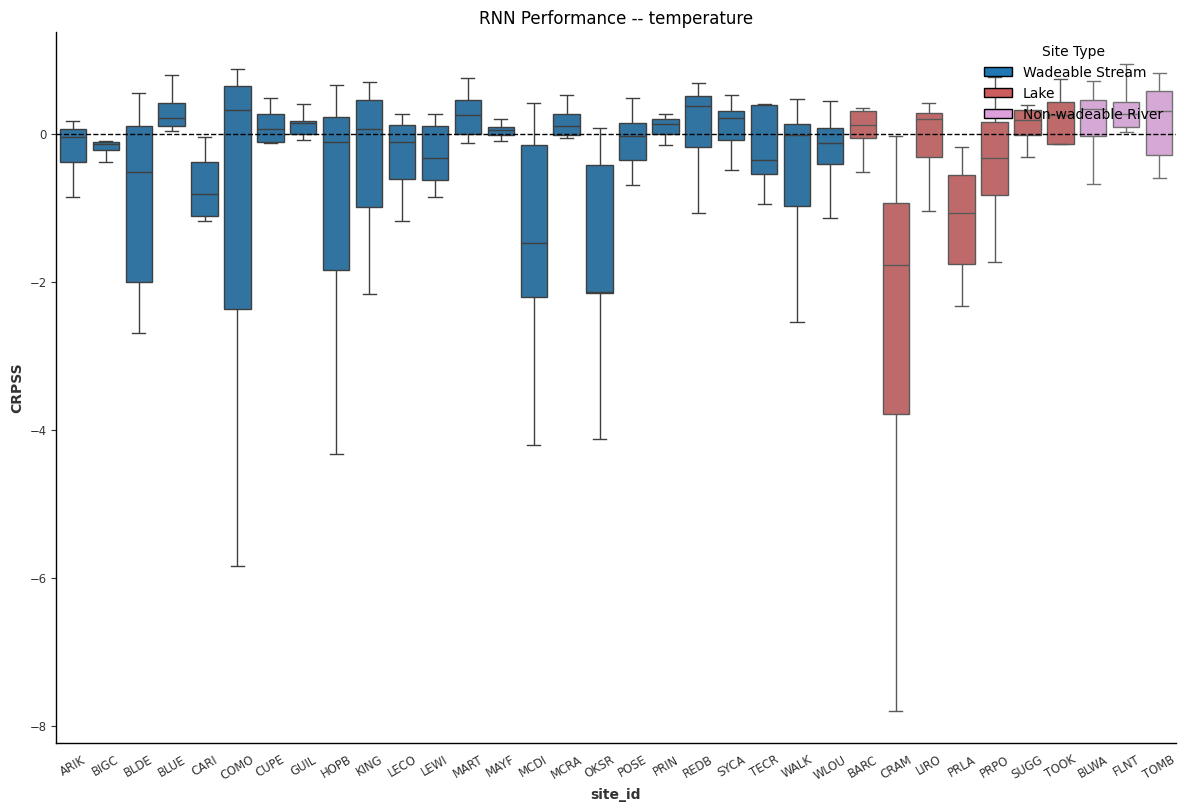

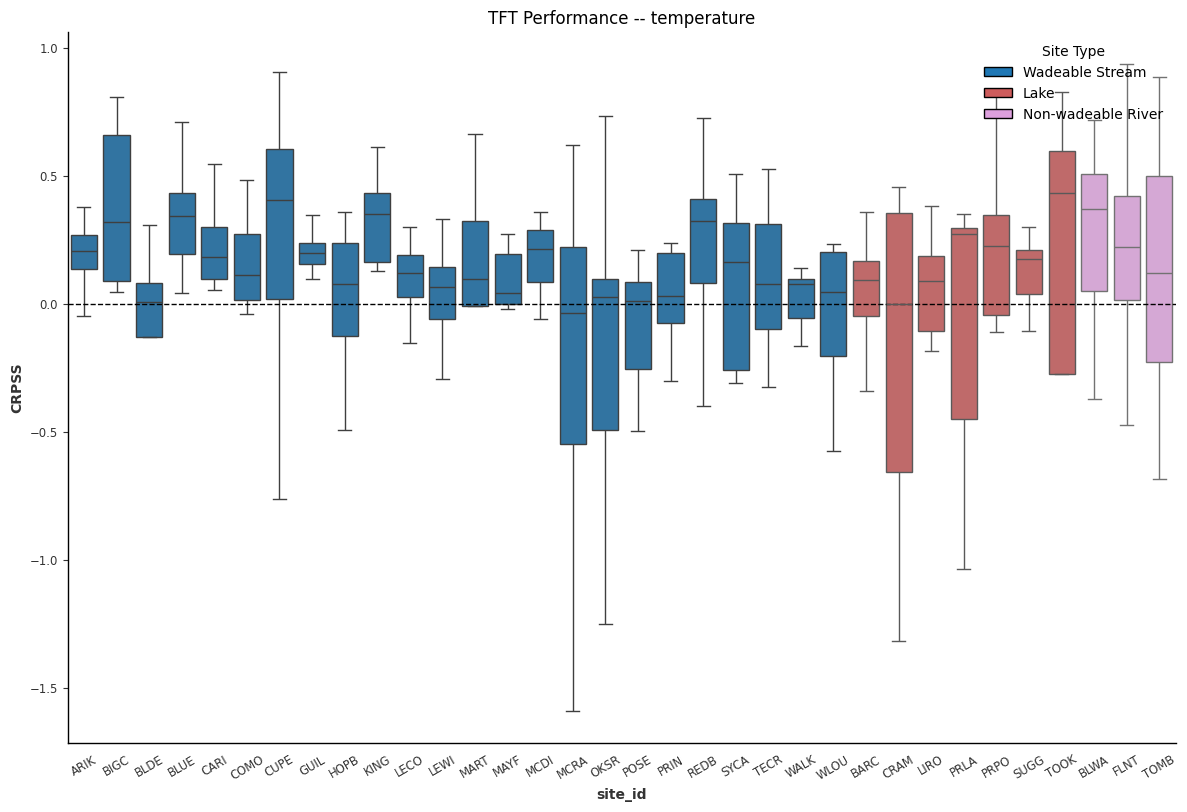

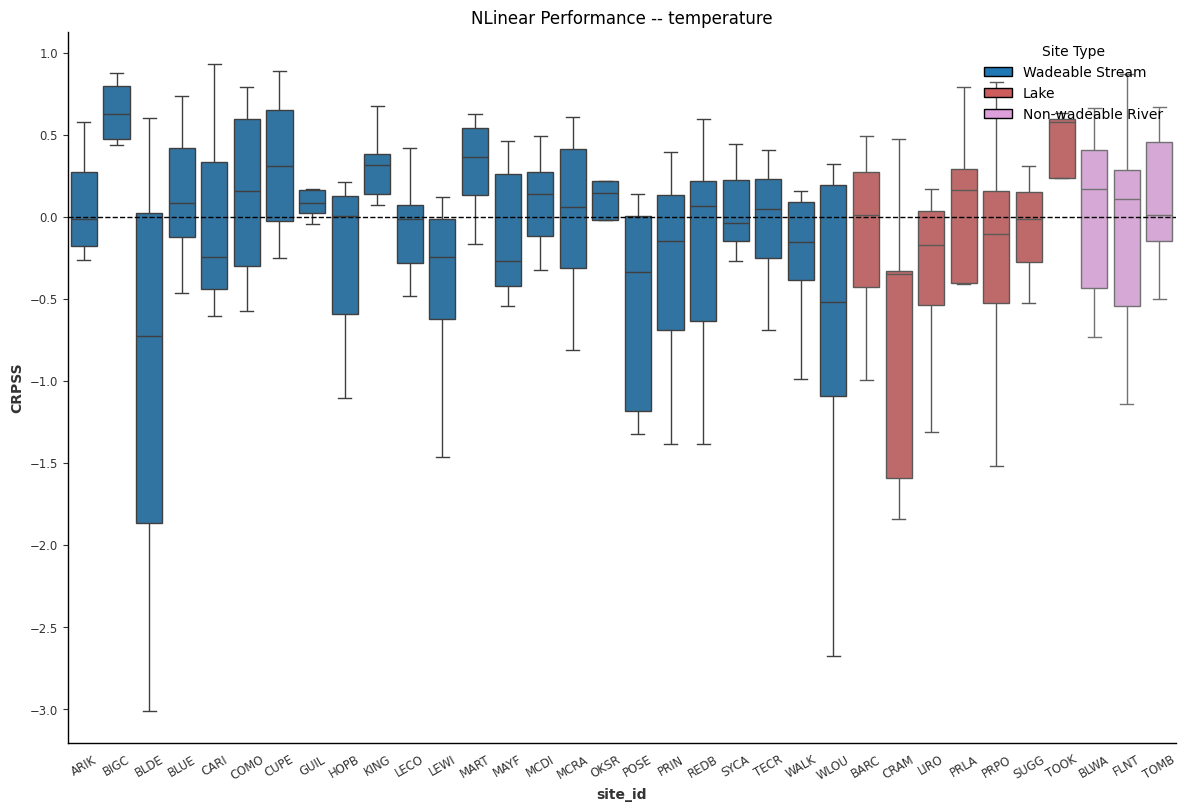

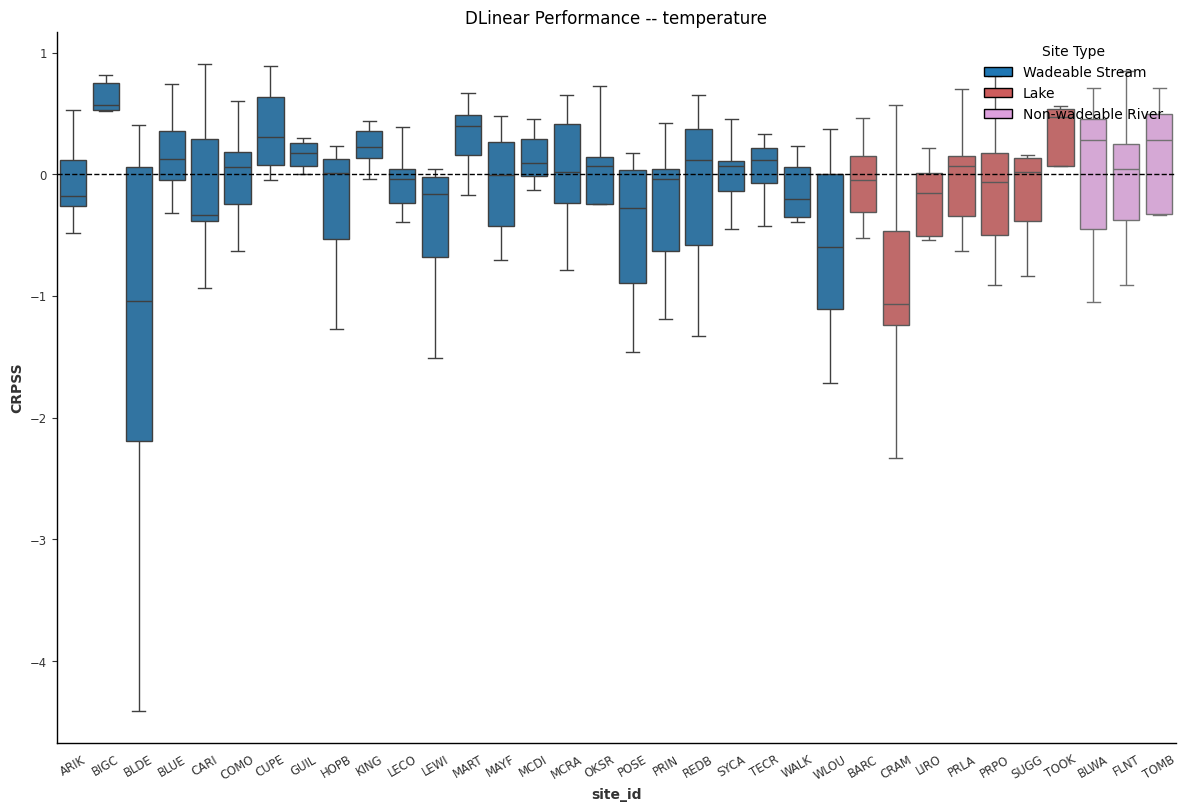

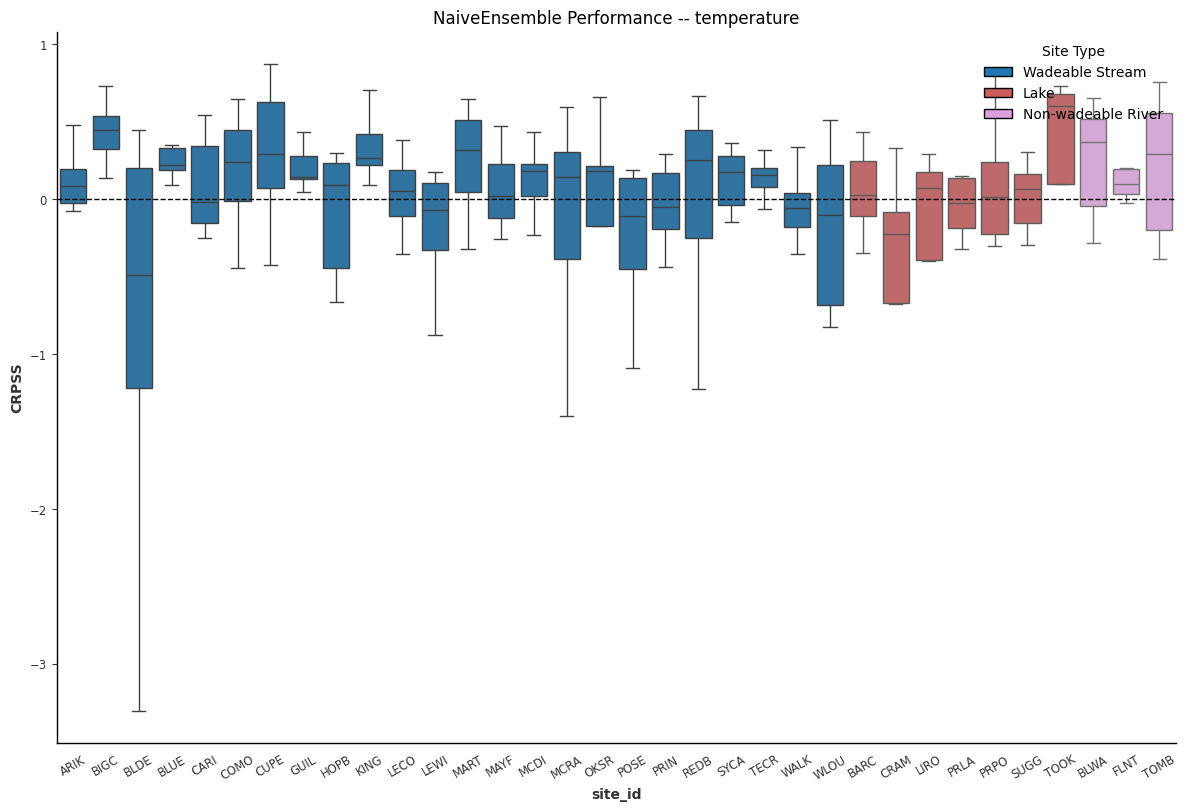

In [26]:
variable = 'temperature'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}'
    )

#### Model Performance by Site -- Historical -- Chla

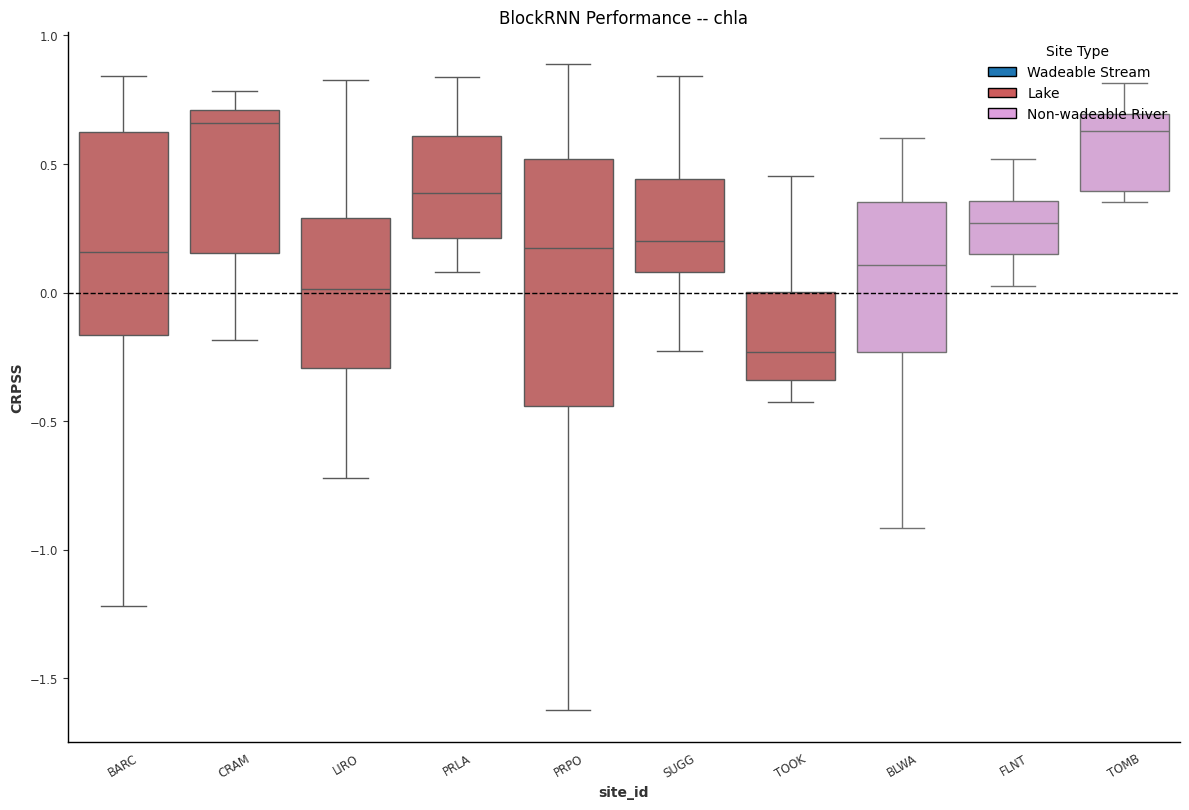

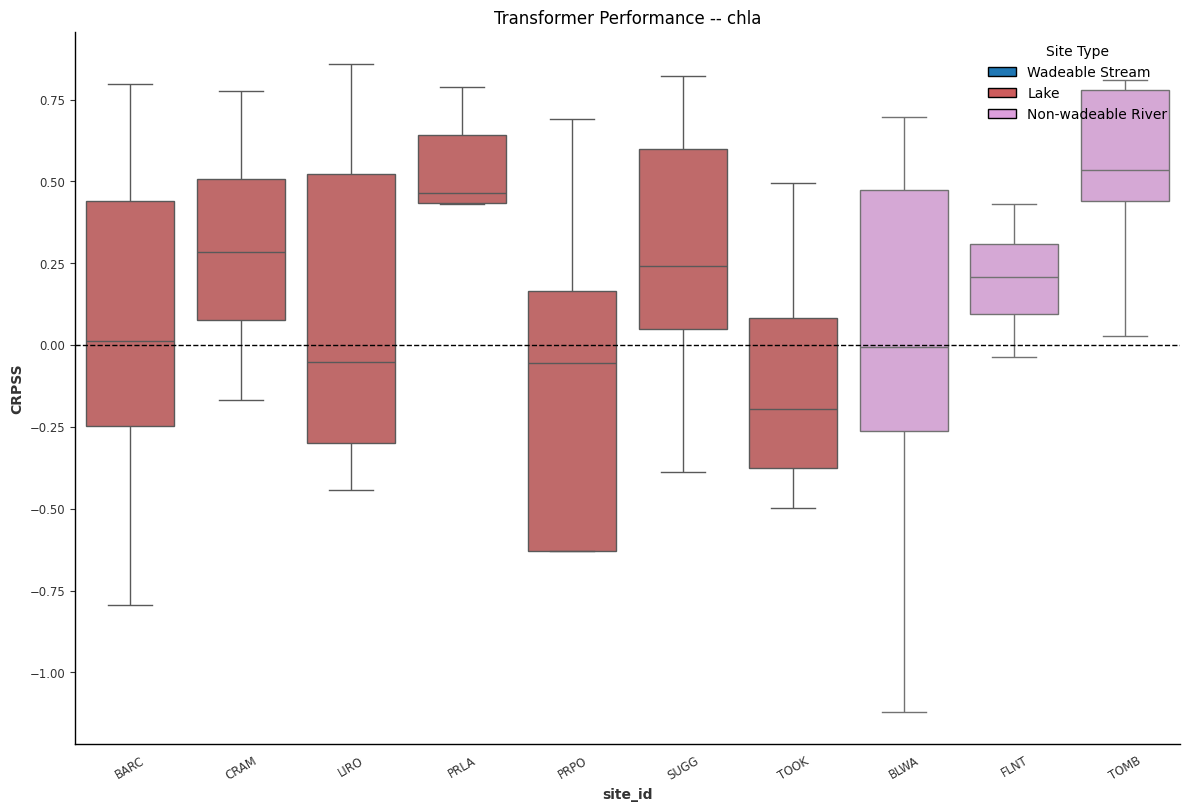

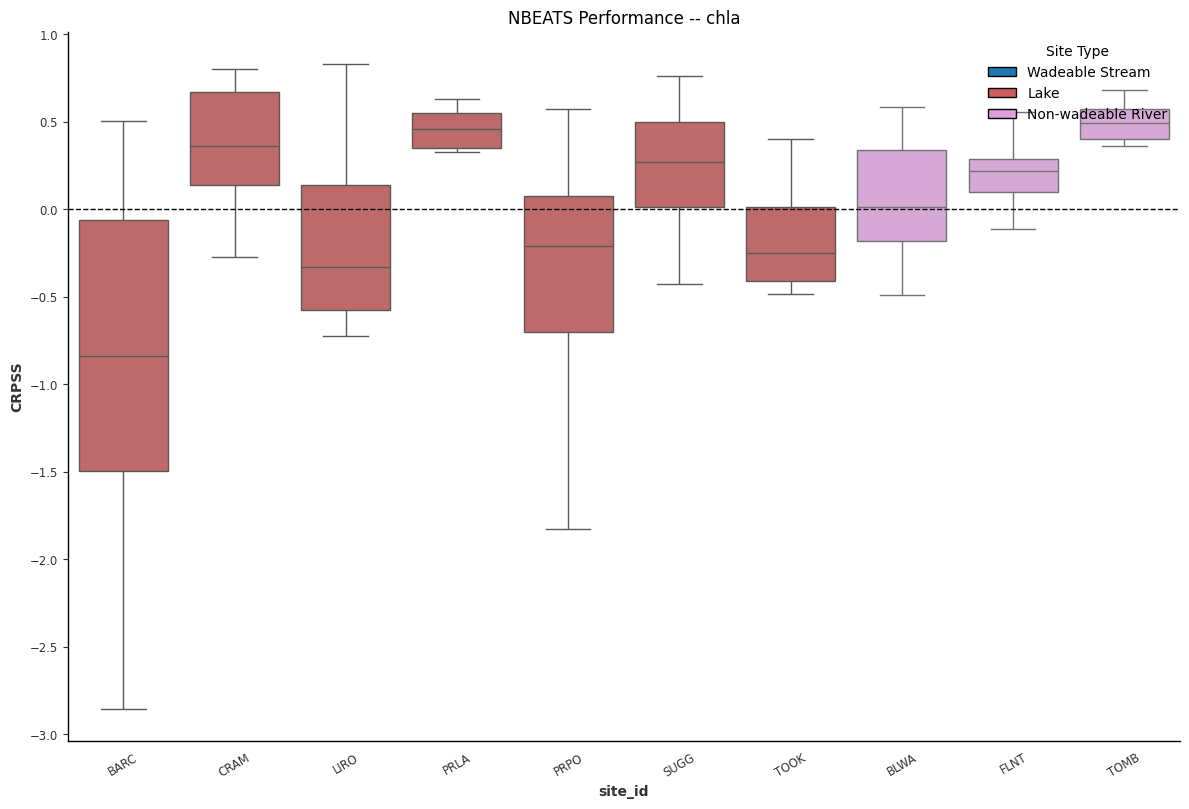

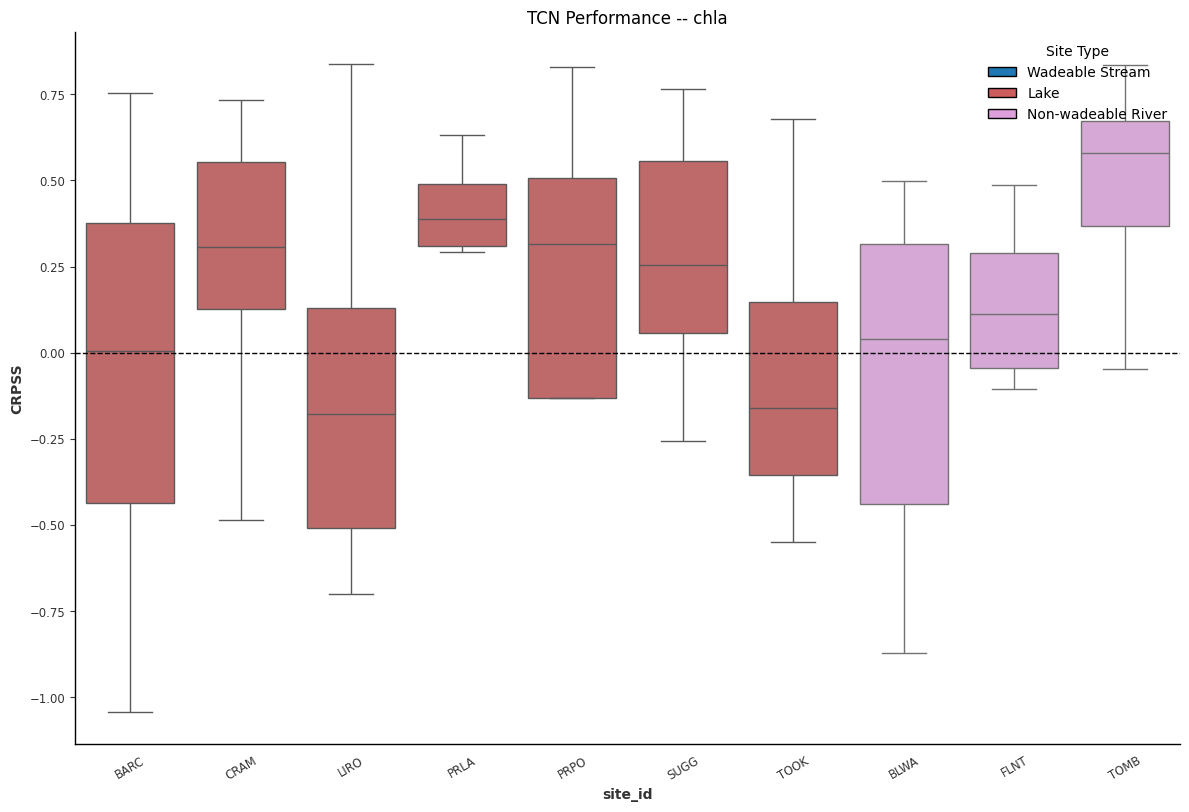

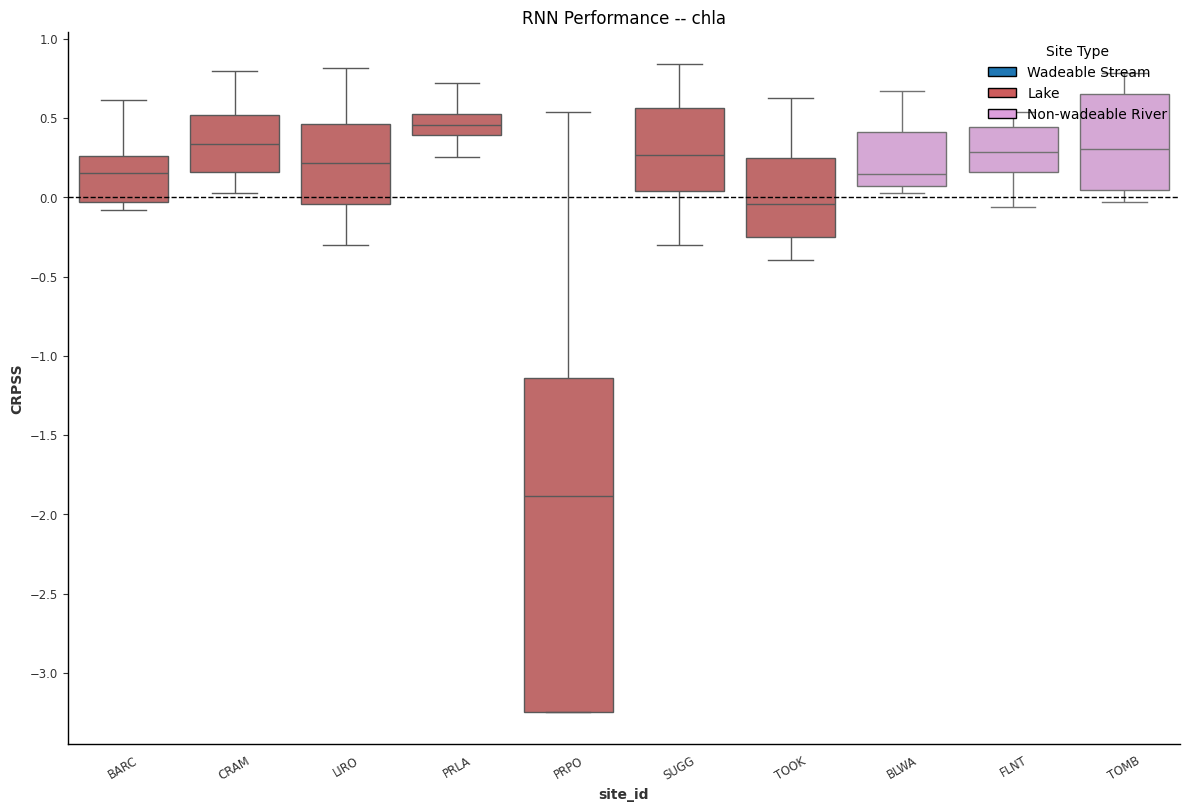

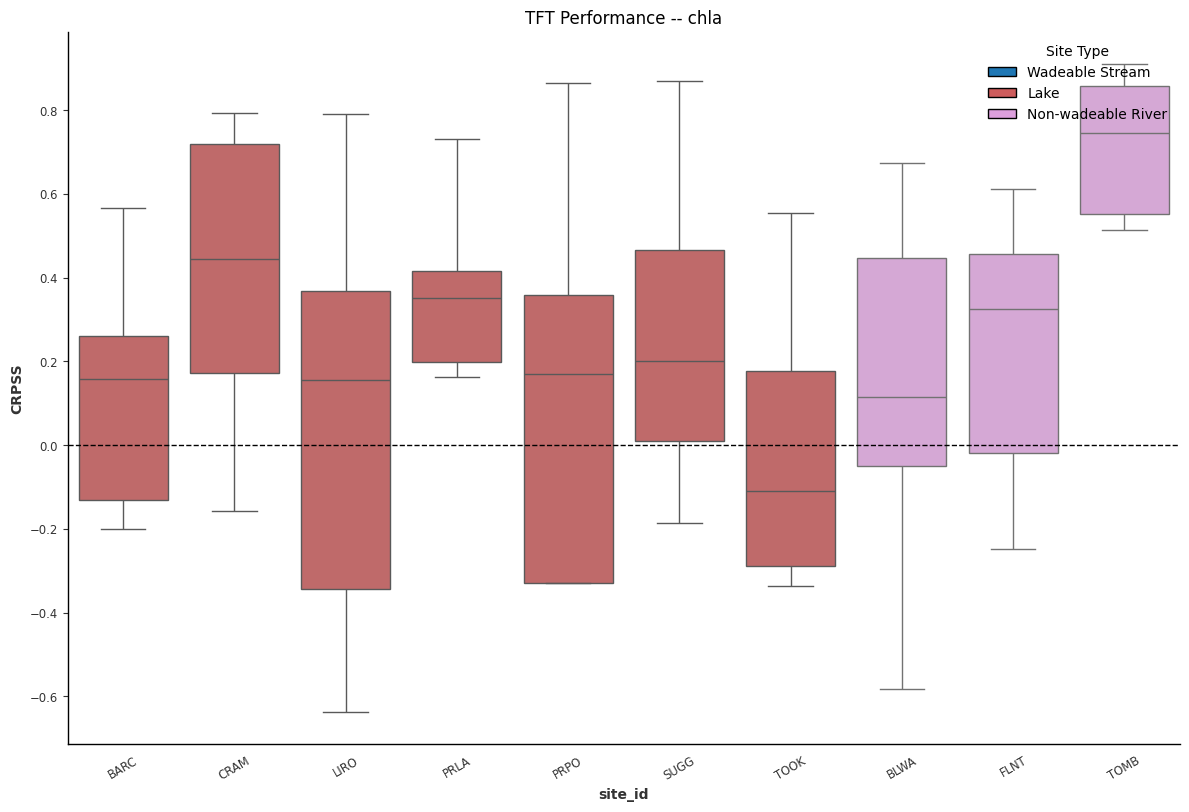

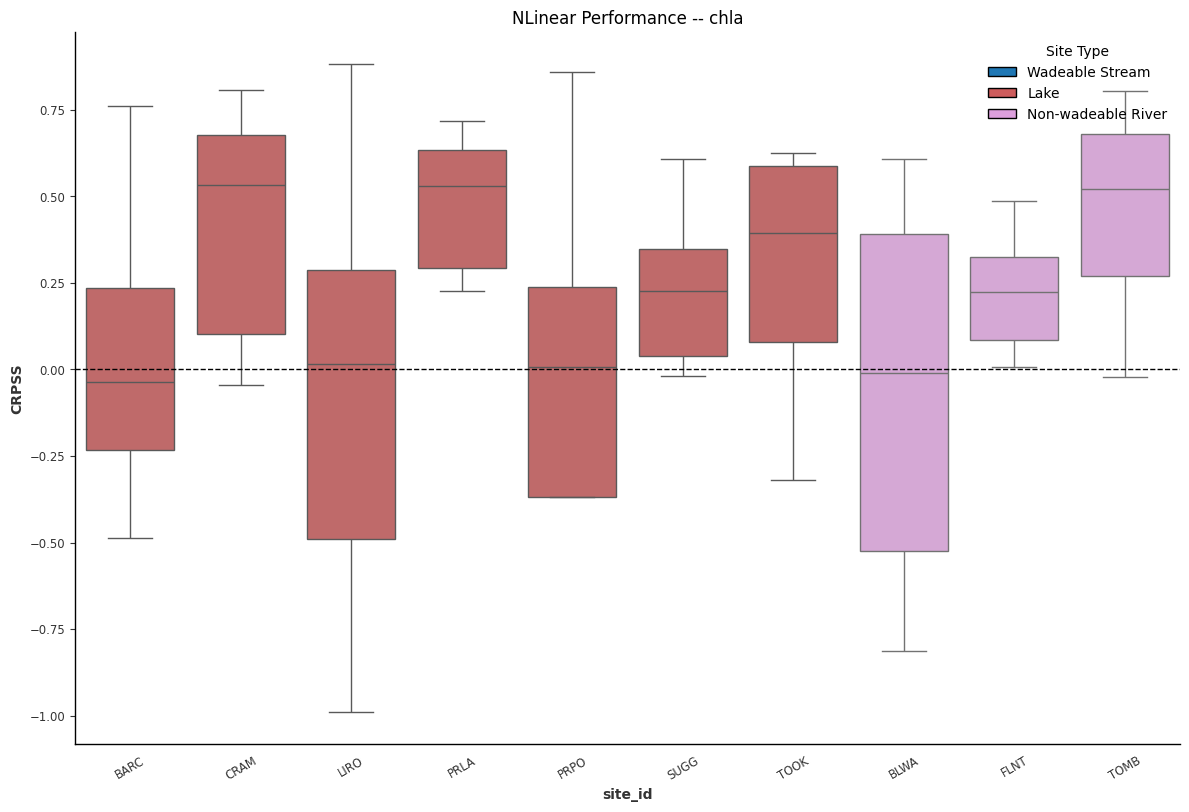

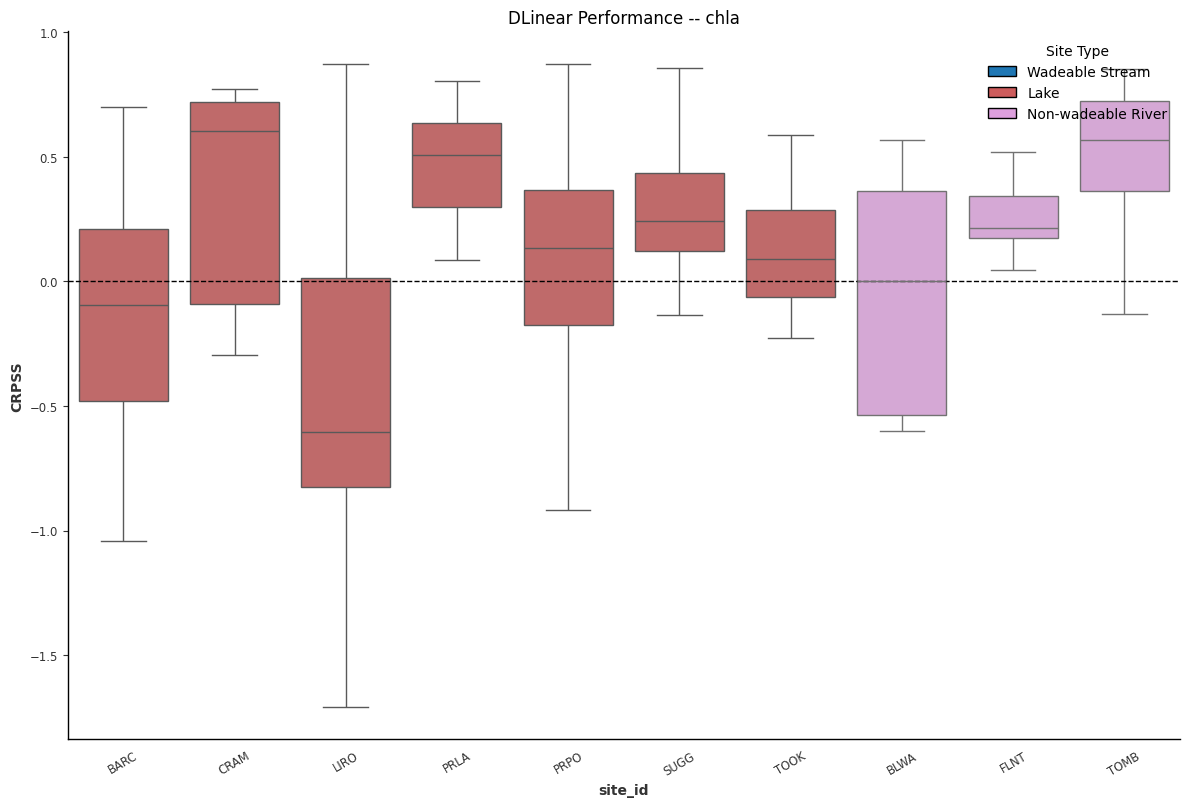

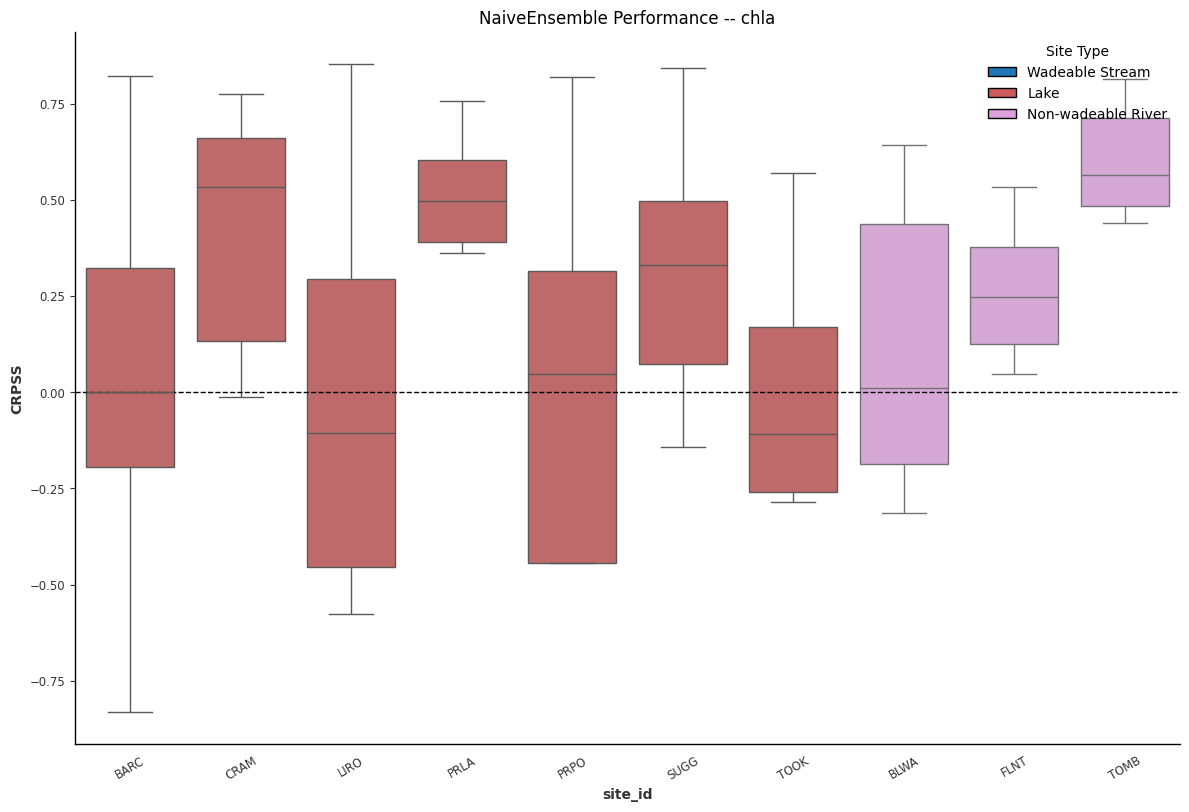

In [27]:
variable = 'chla'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}'
    )

#### Model Performance by Site -- Naive -- Oxygen

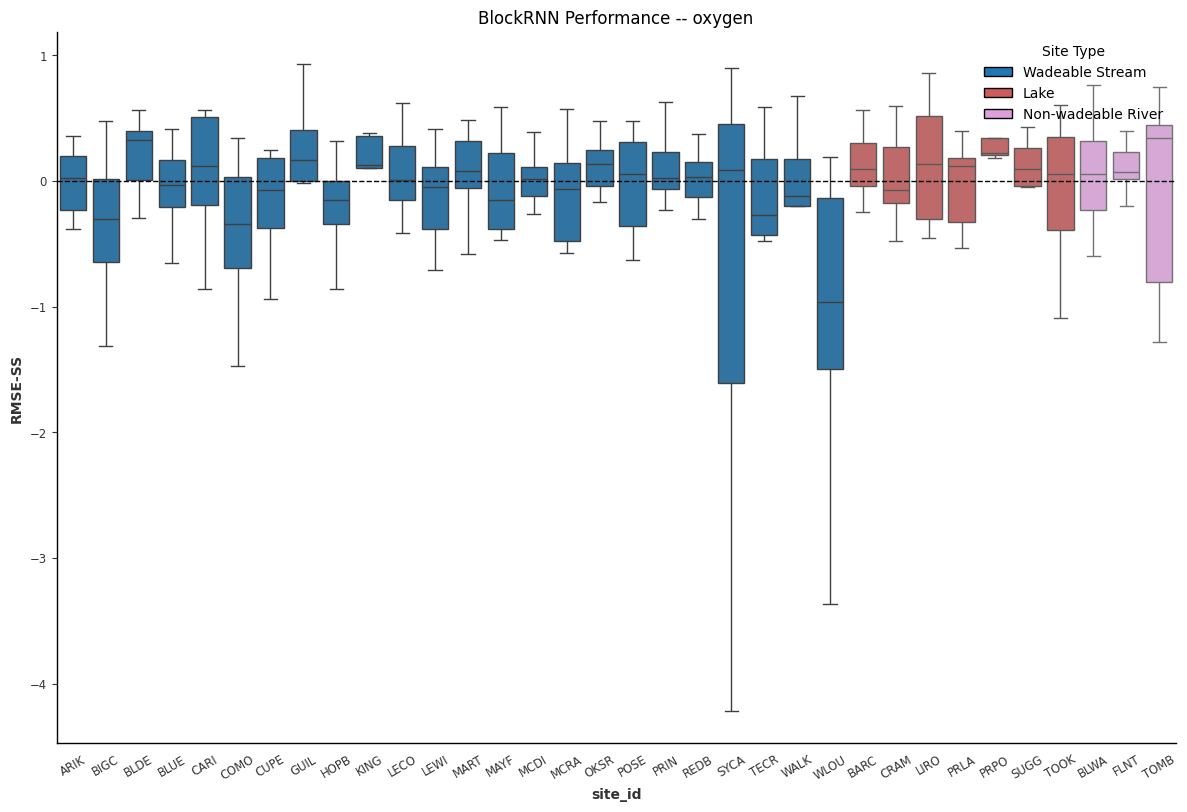

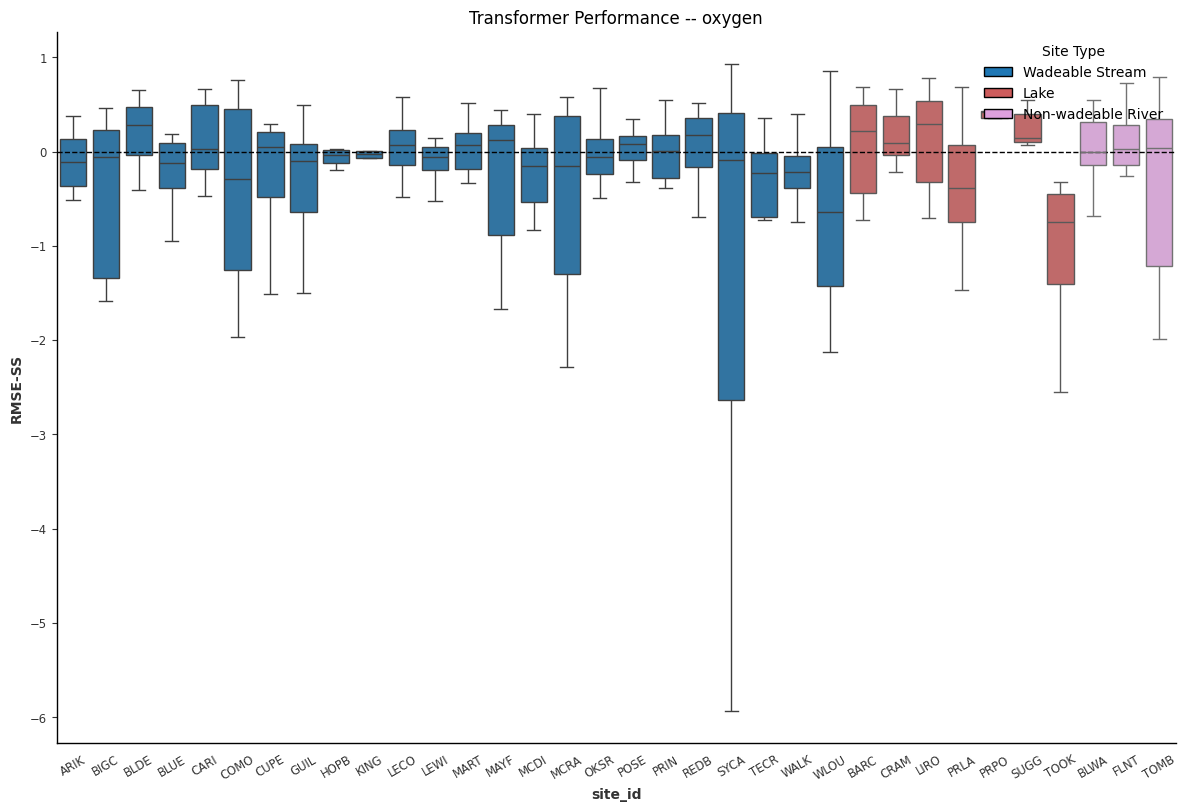

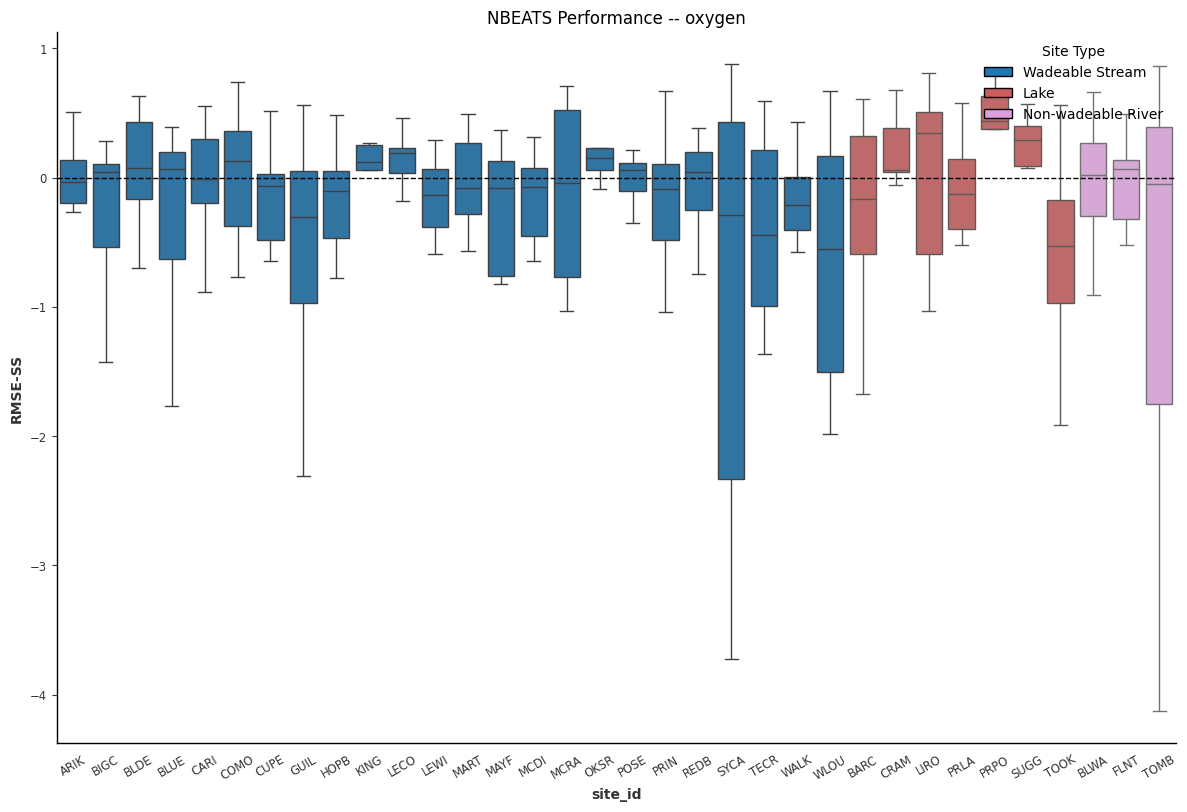

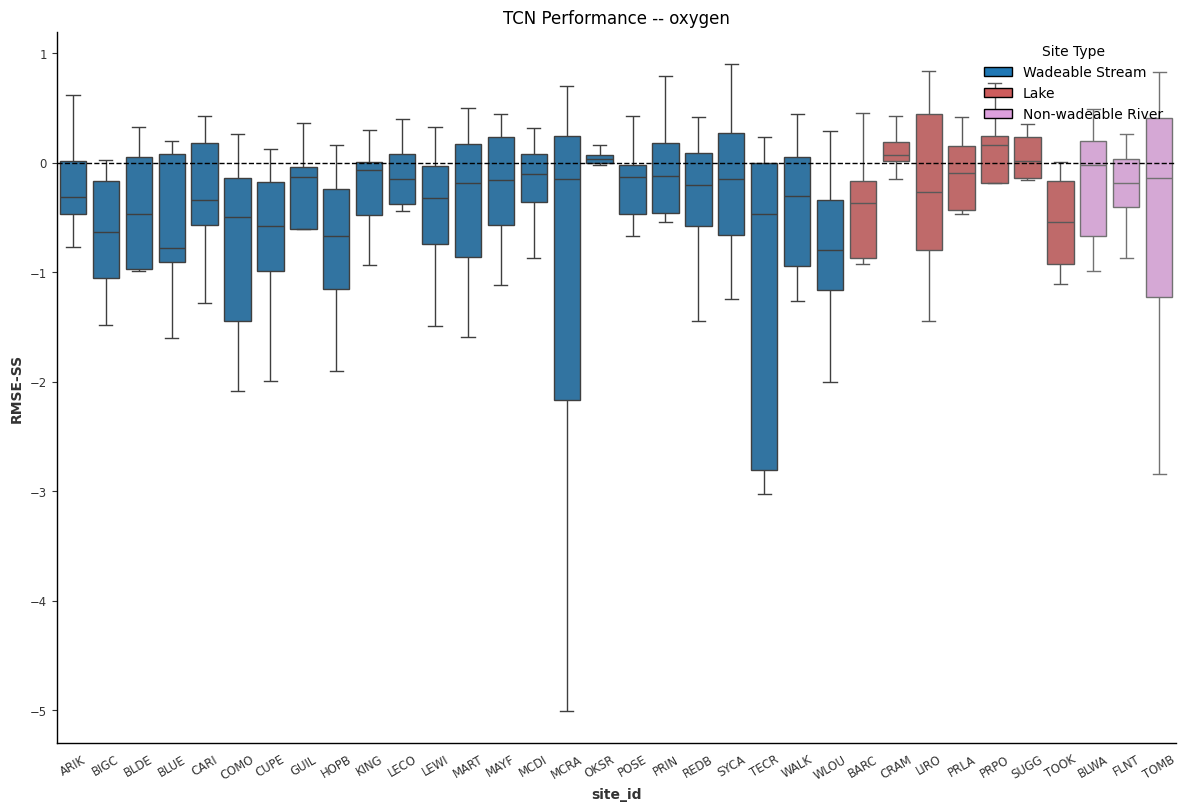

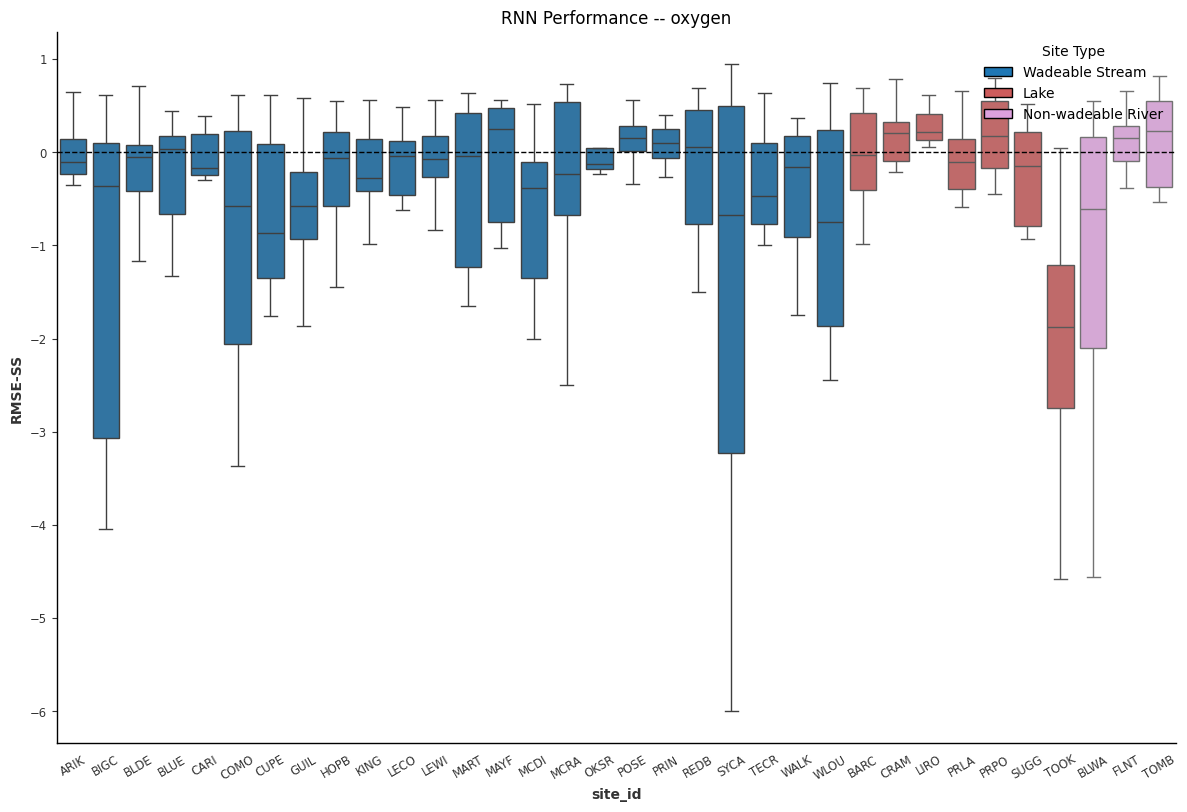

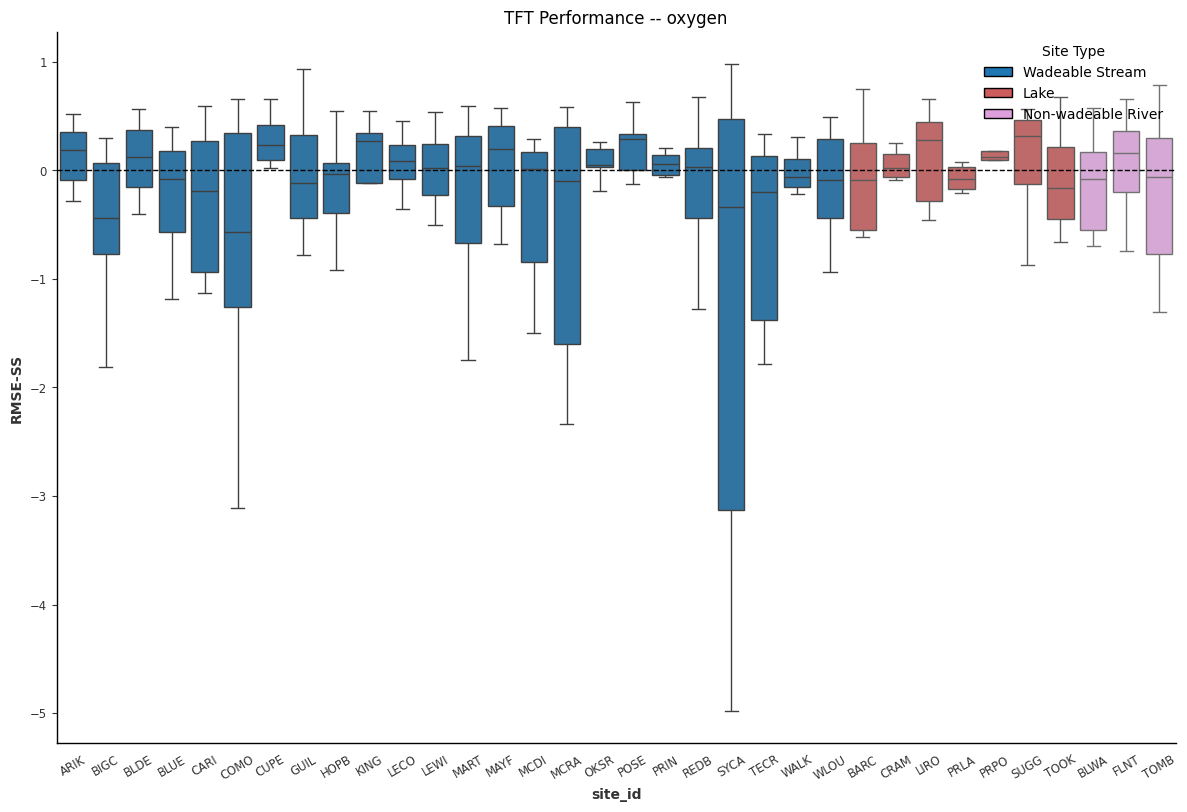

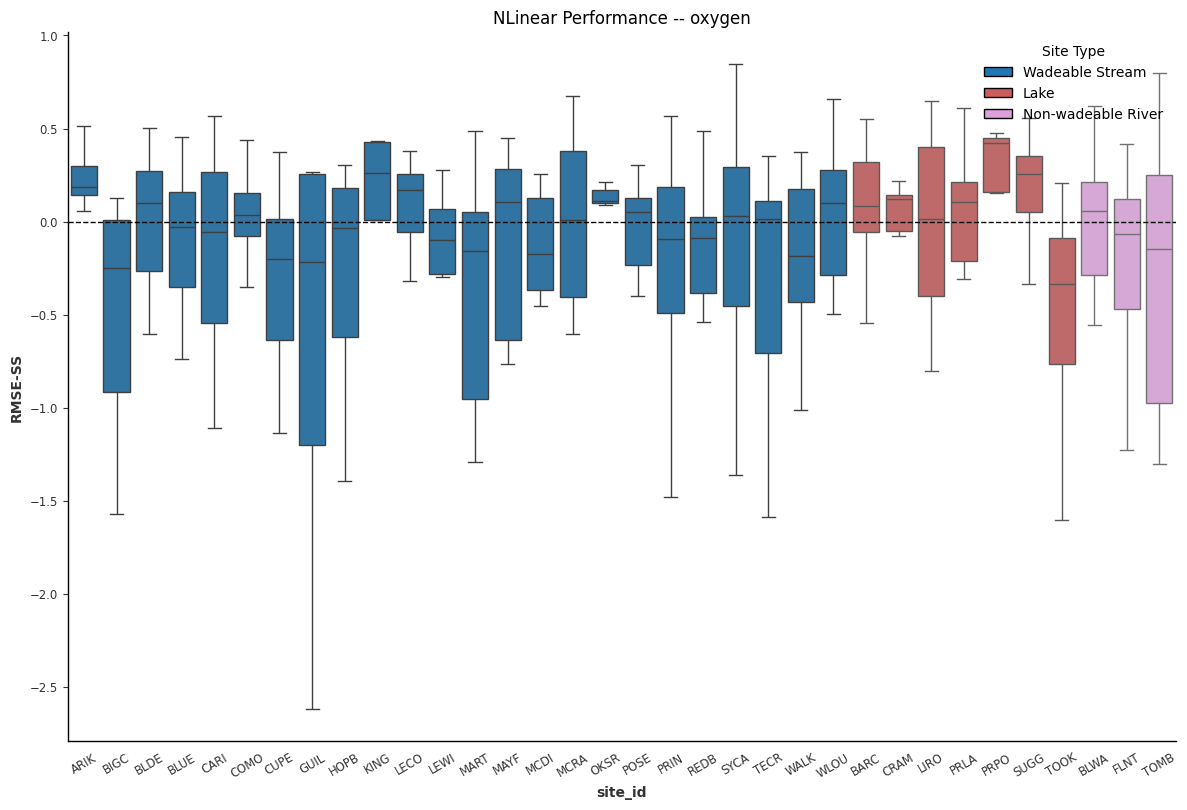

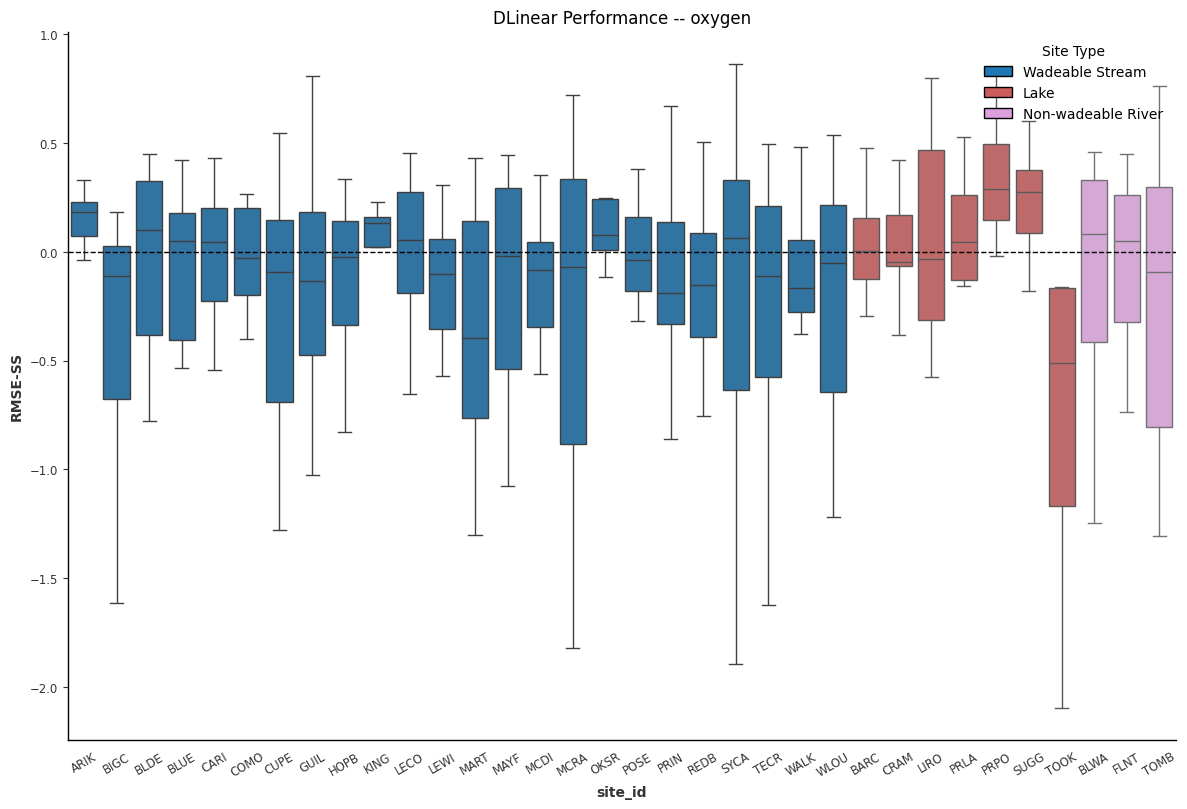

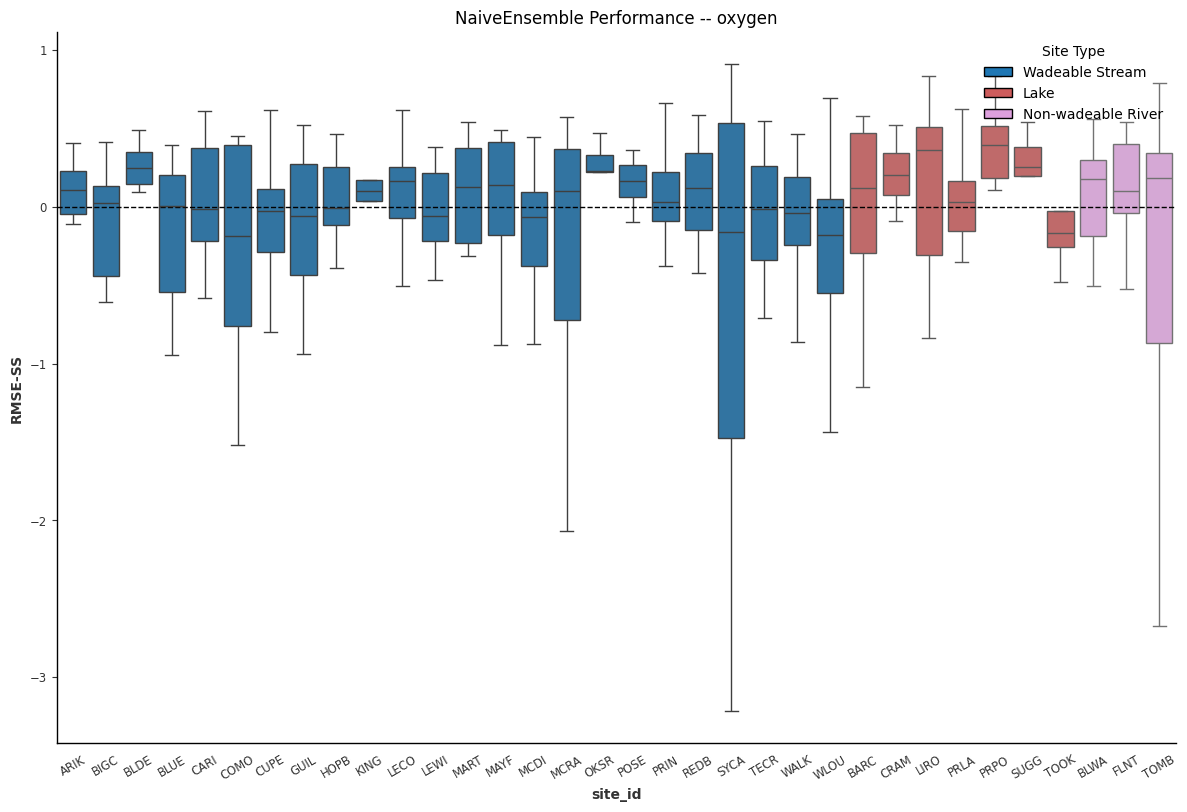

In [28]:
variable = 'oxygen'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}',
        historical=False,
    )

#### Model Performance by Site -- Naive -- Temperature

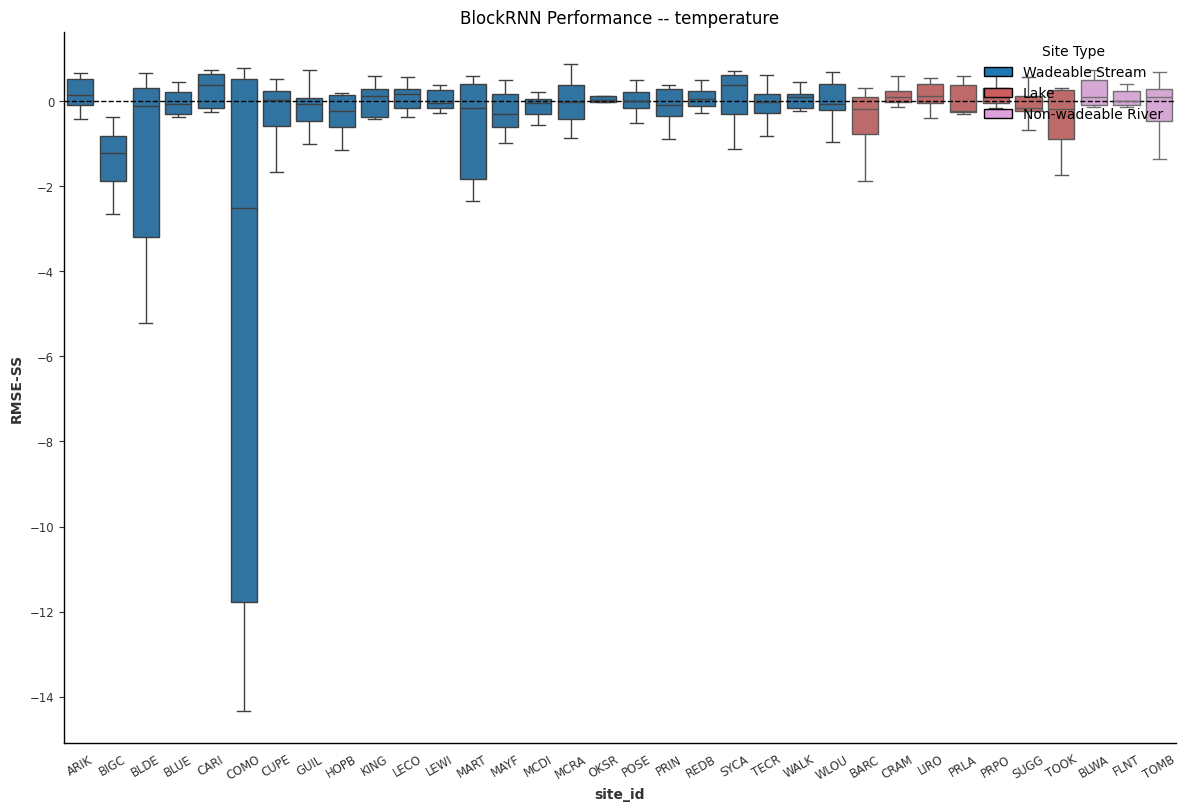

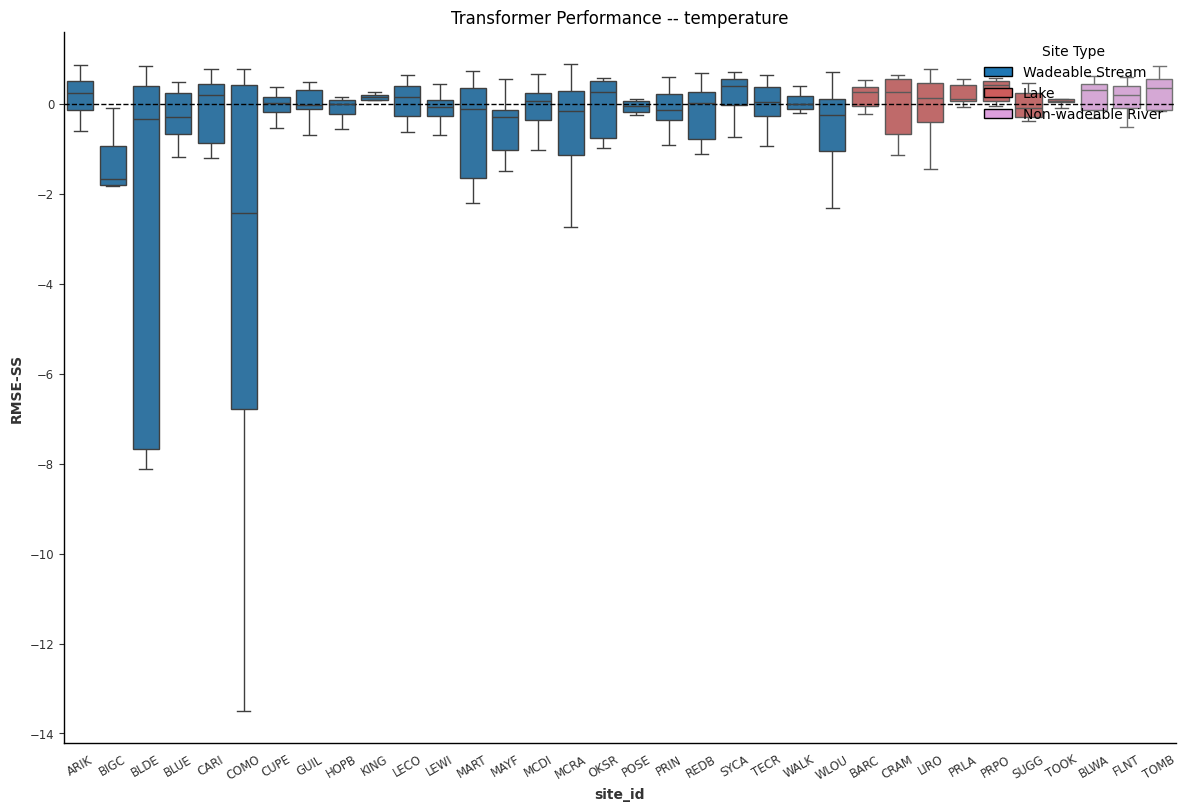

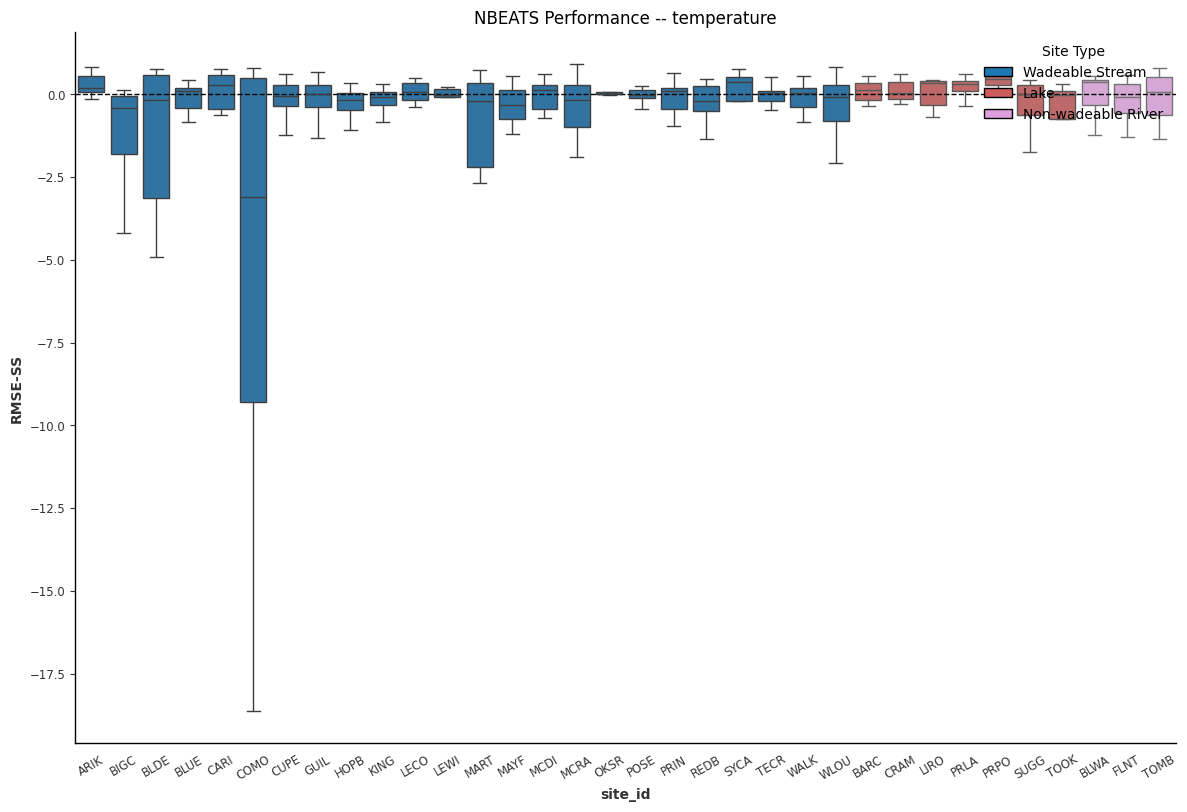

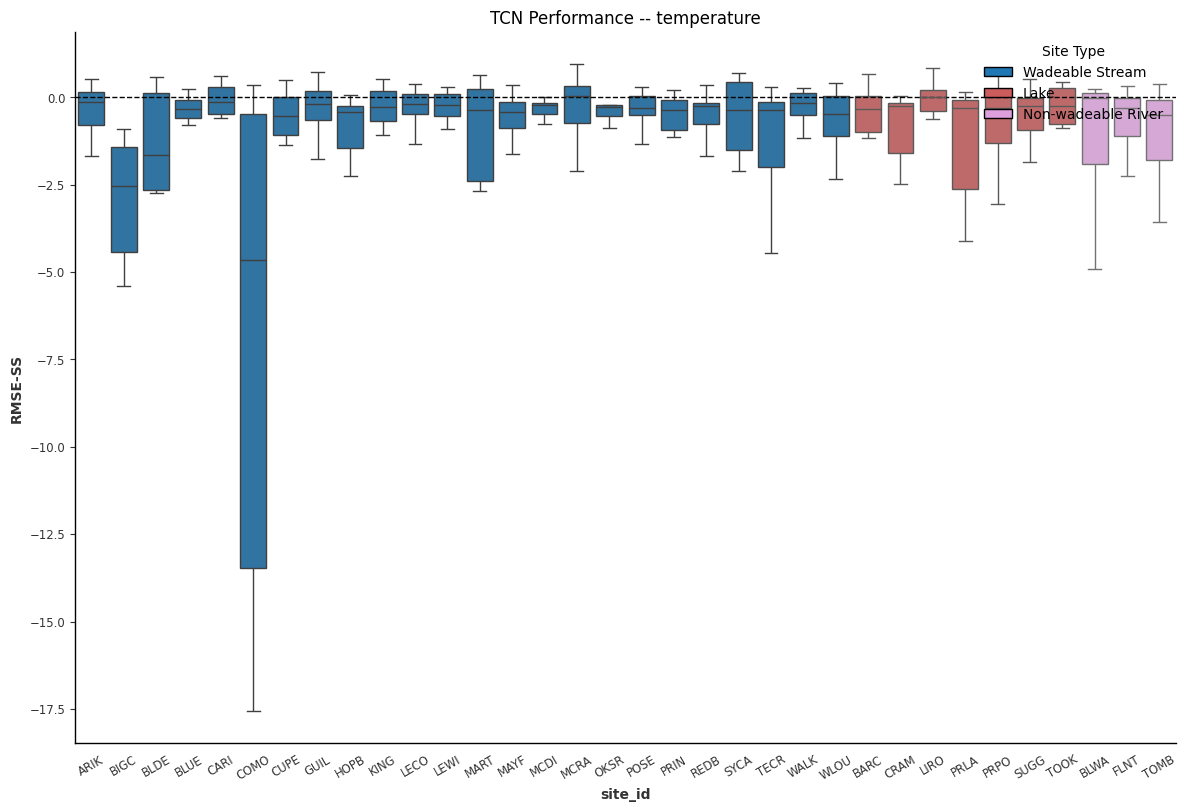

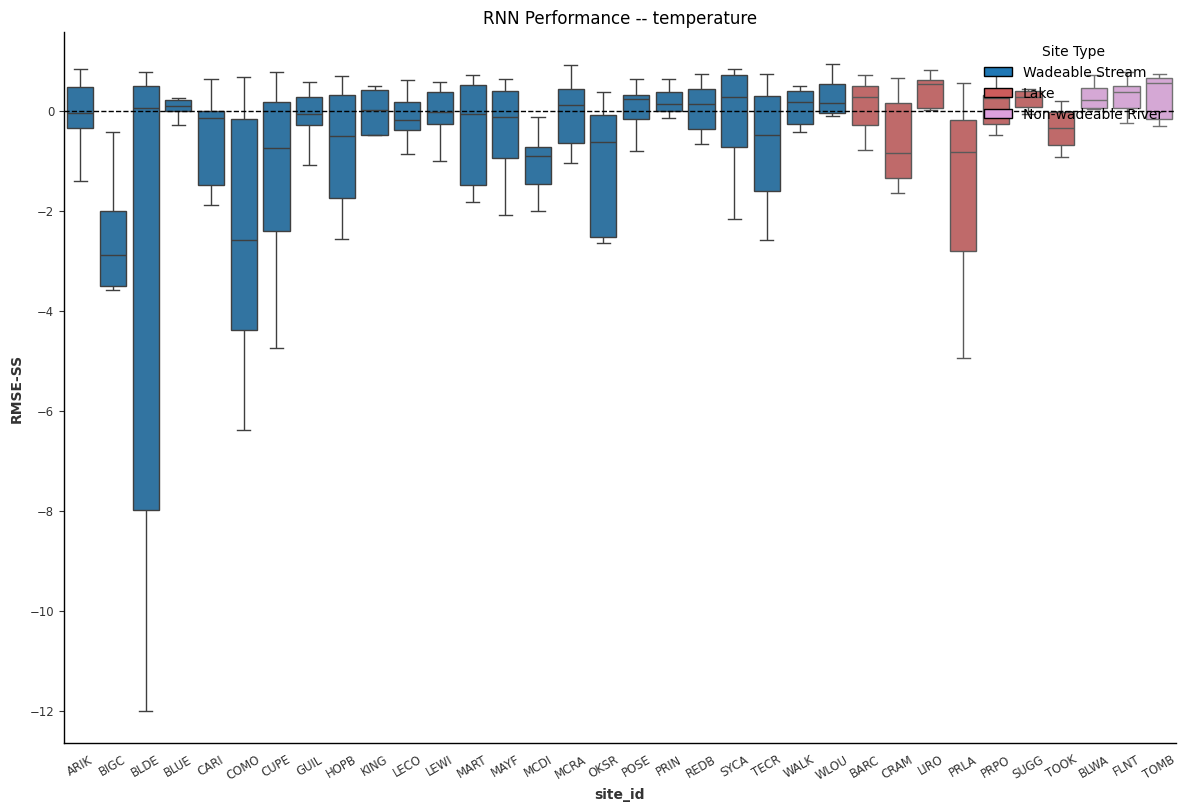

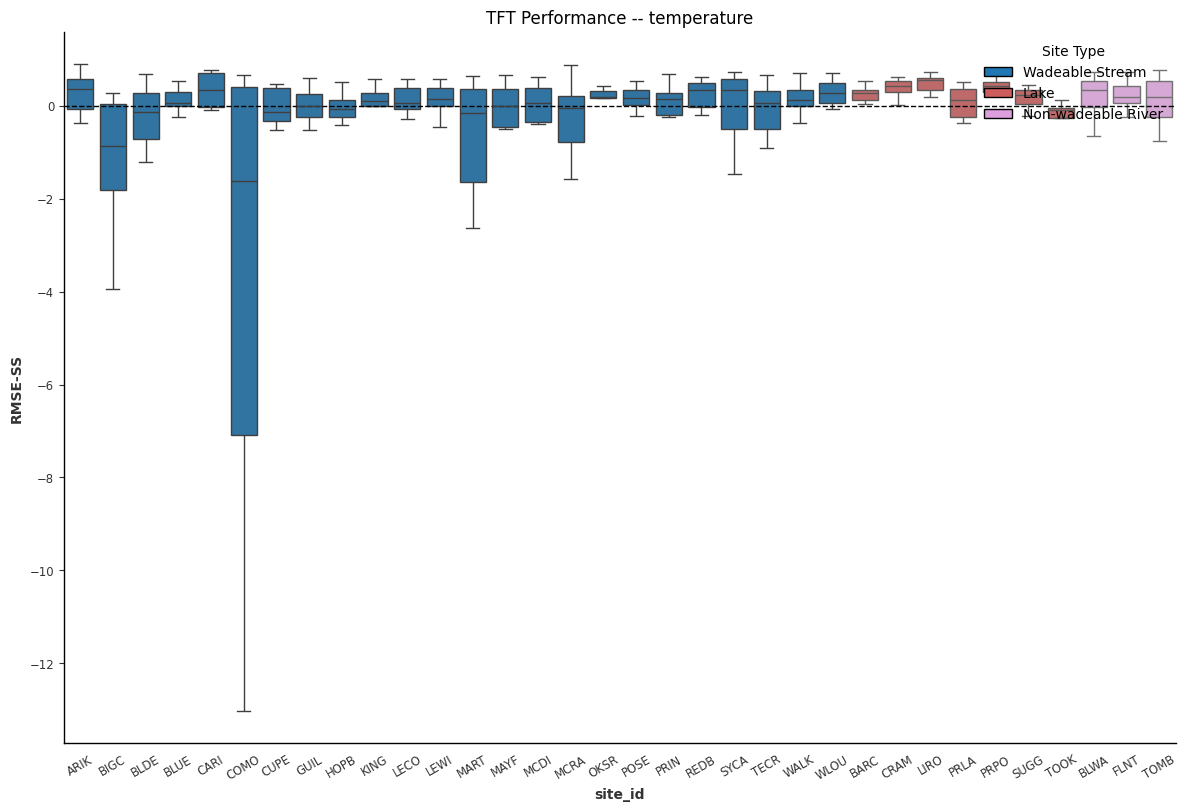

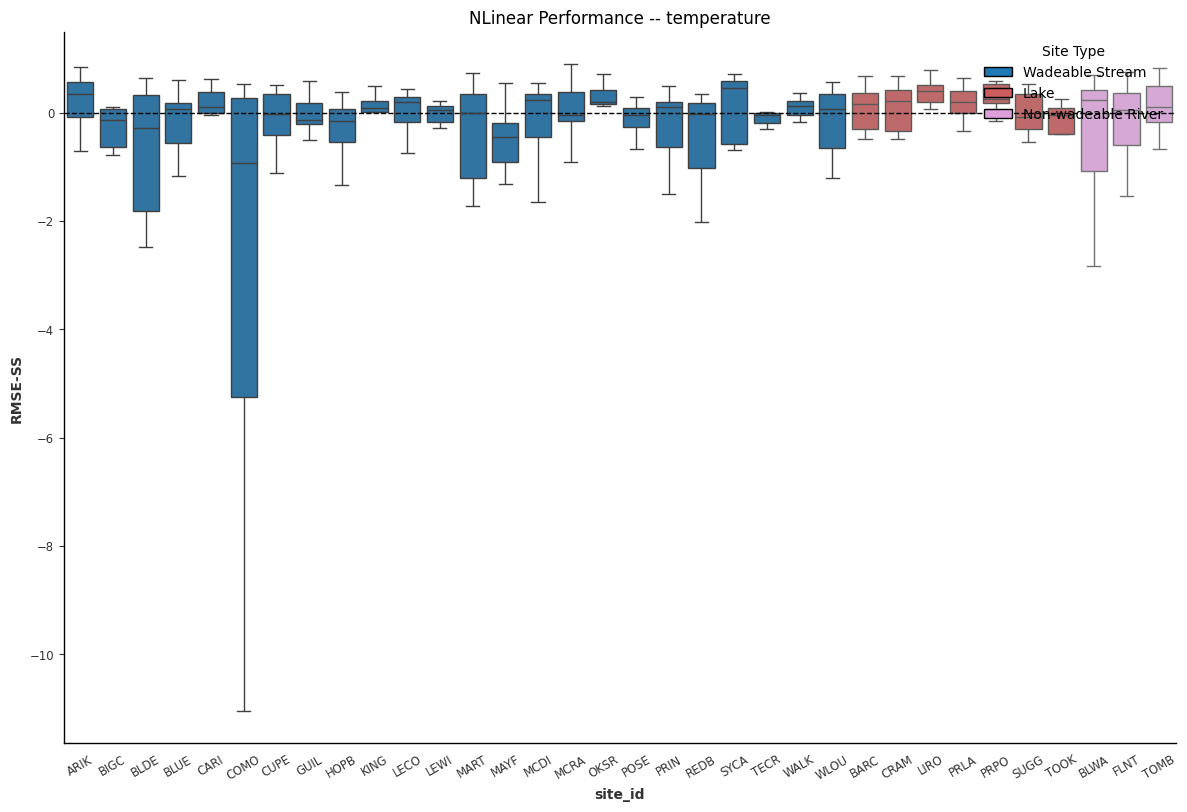

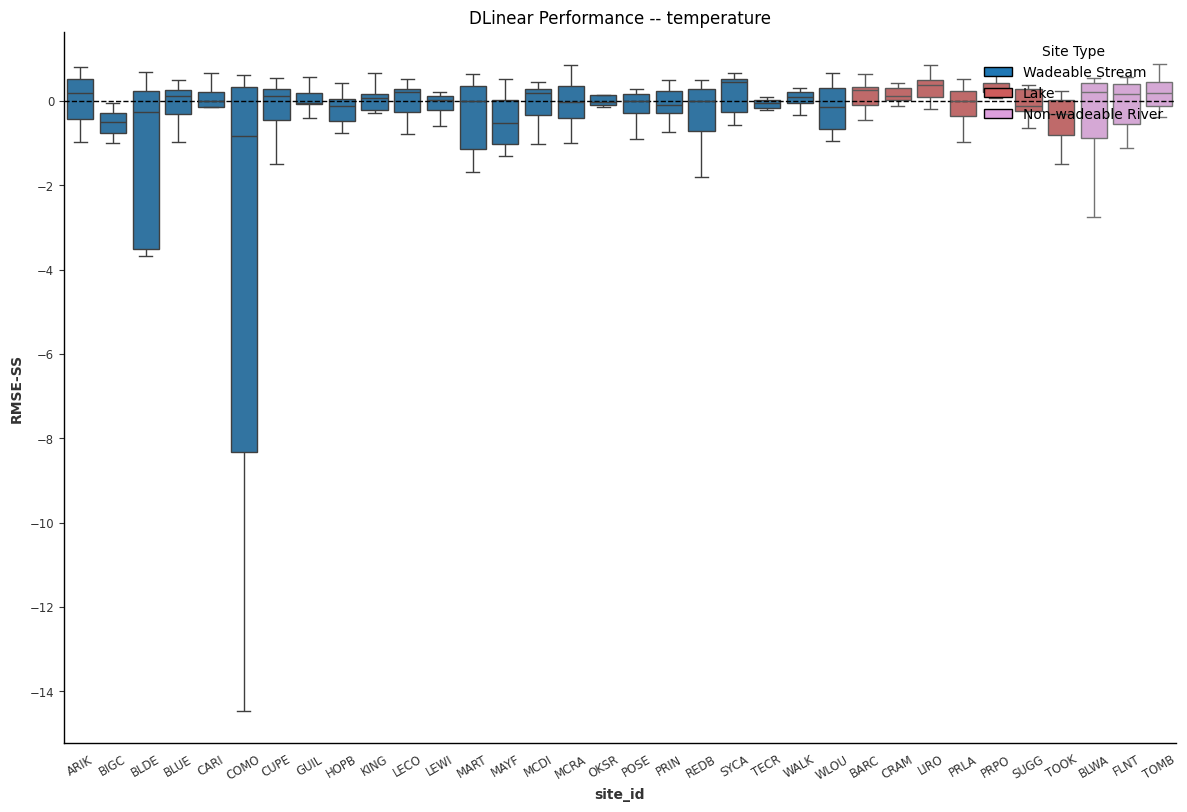

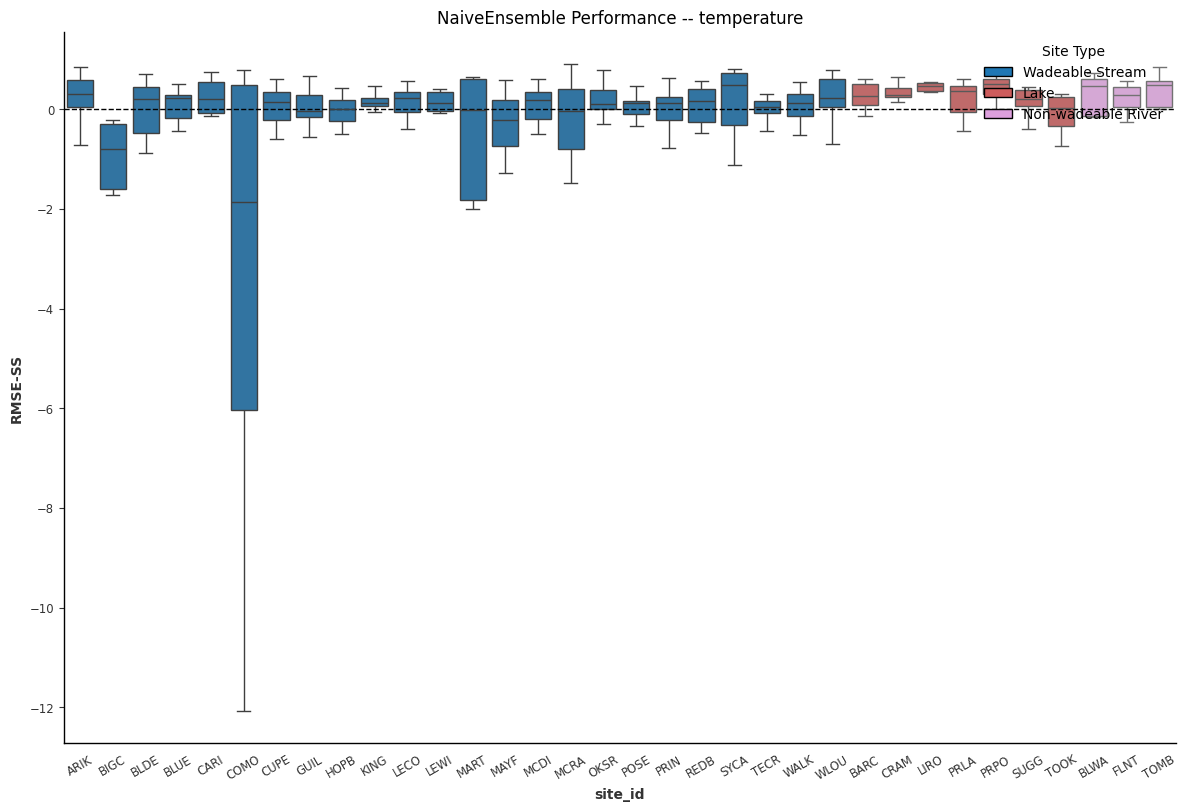

In [29]:
variable = 'temperature'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}',
        historical=False,
    )

#### Model Performance by Site -- Naive -- Chla

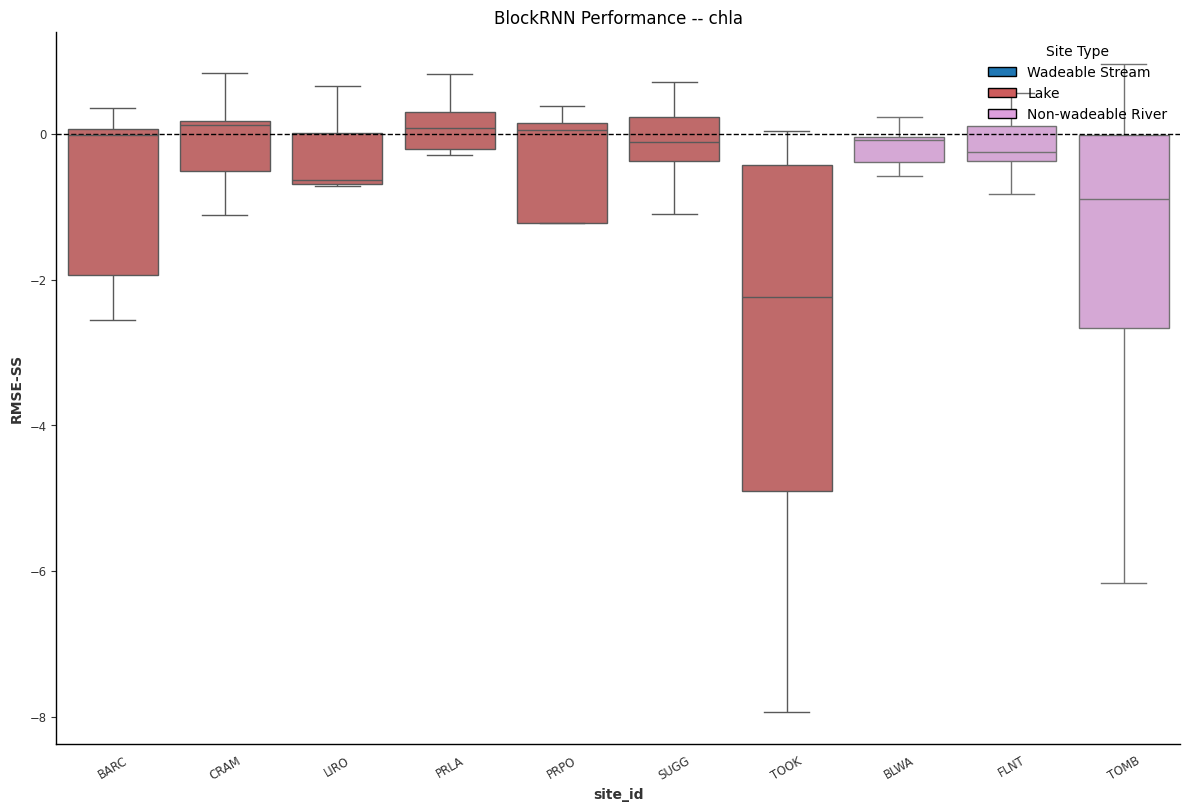

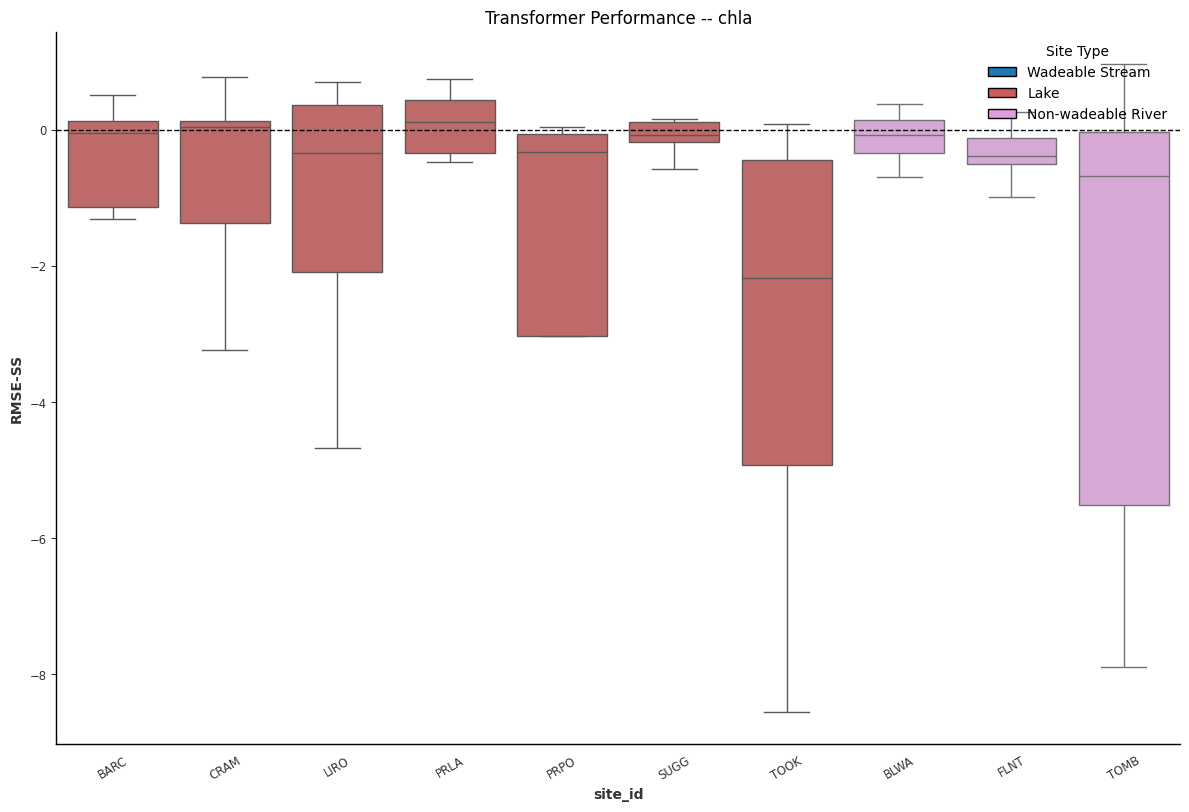

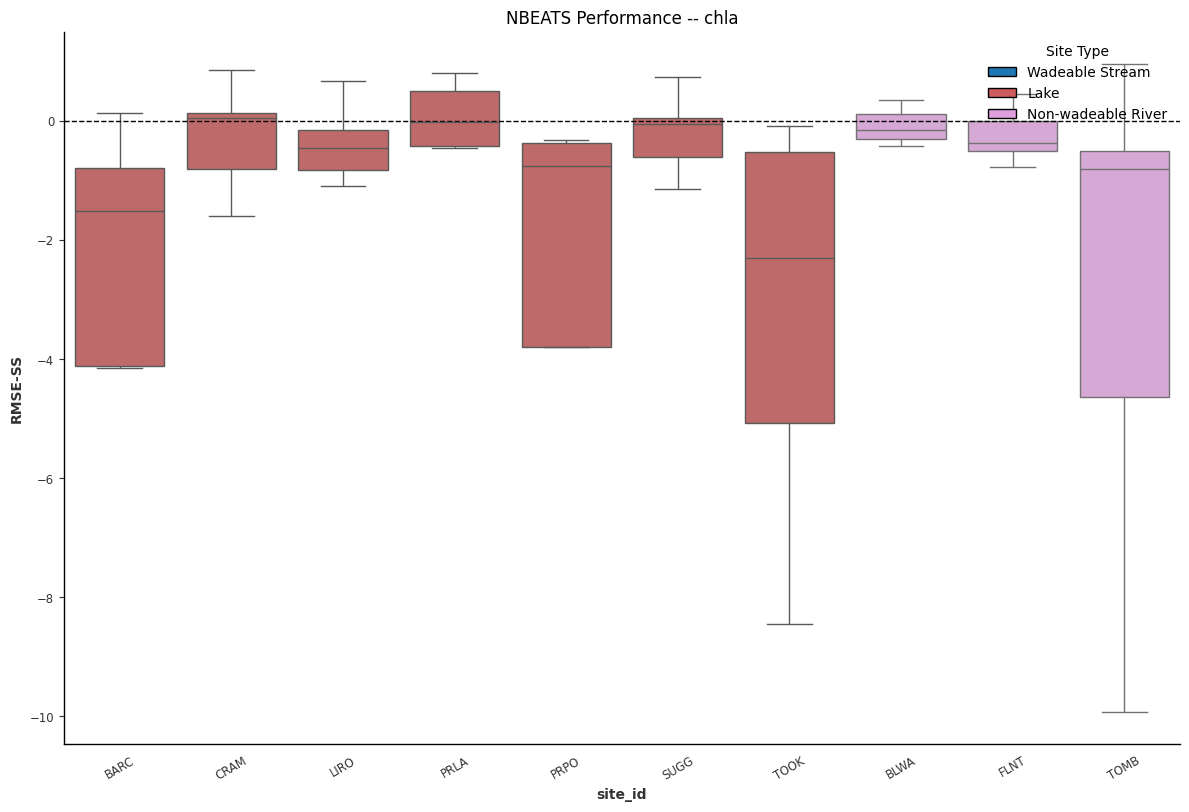

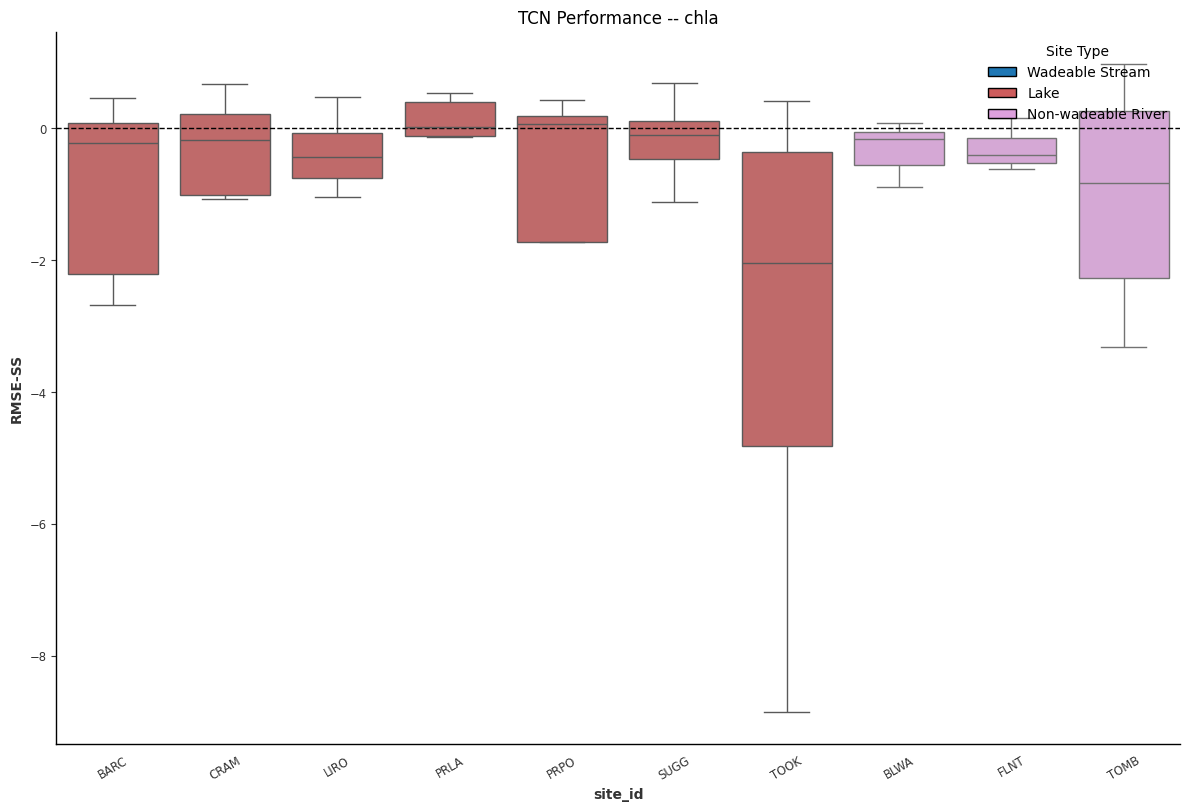

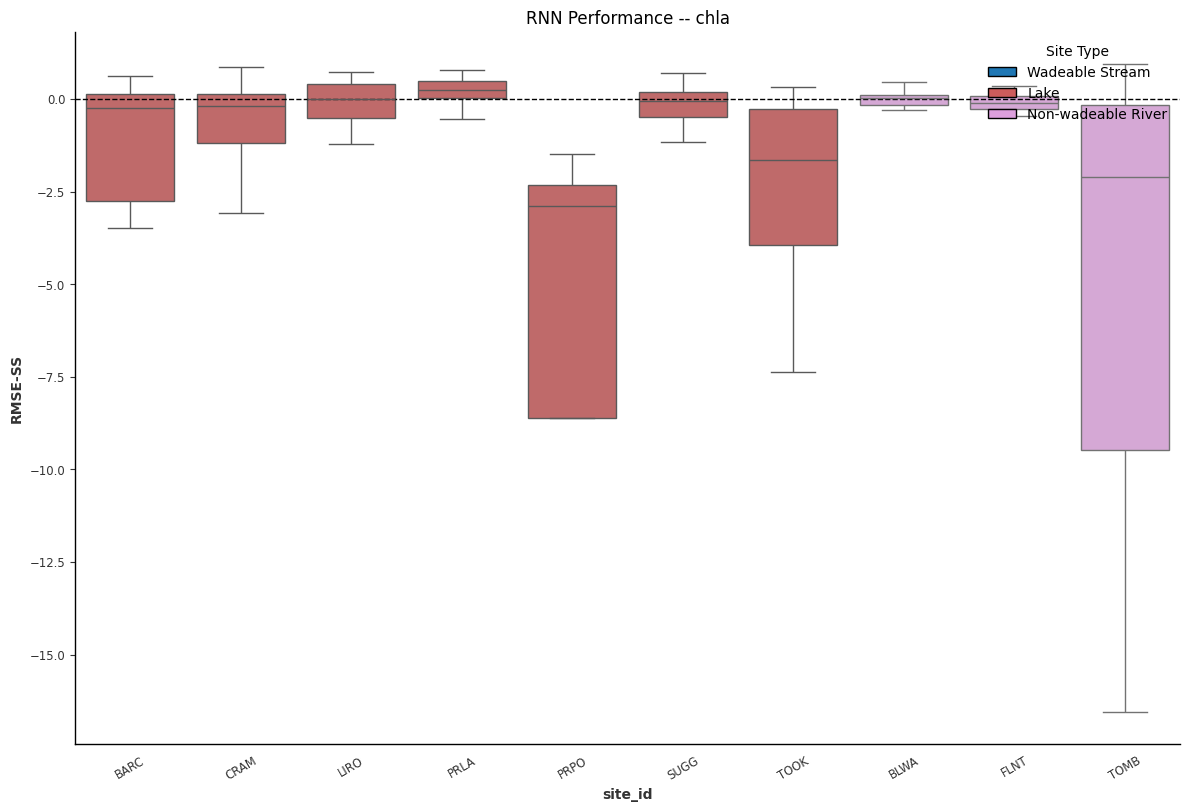

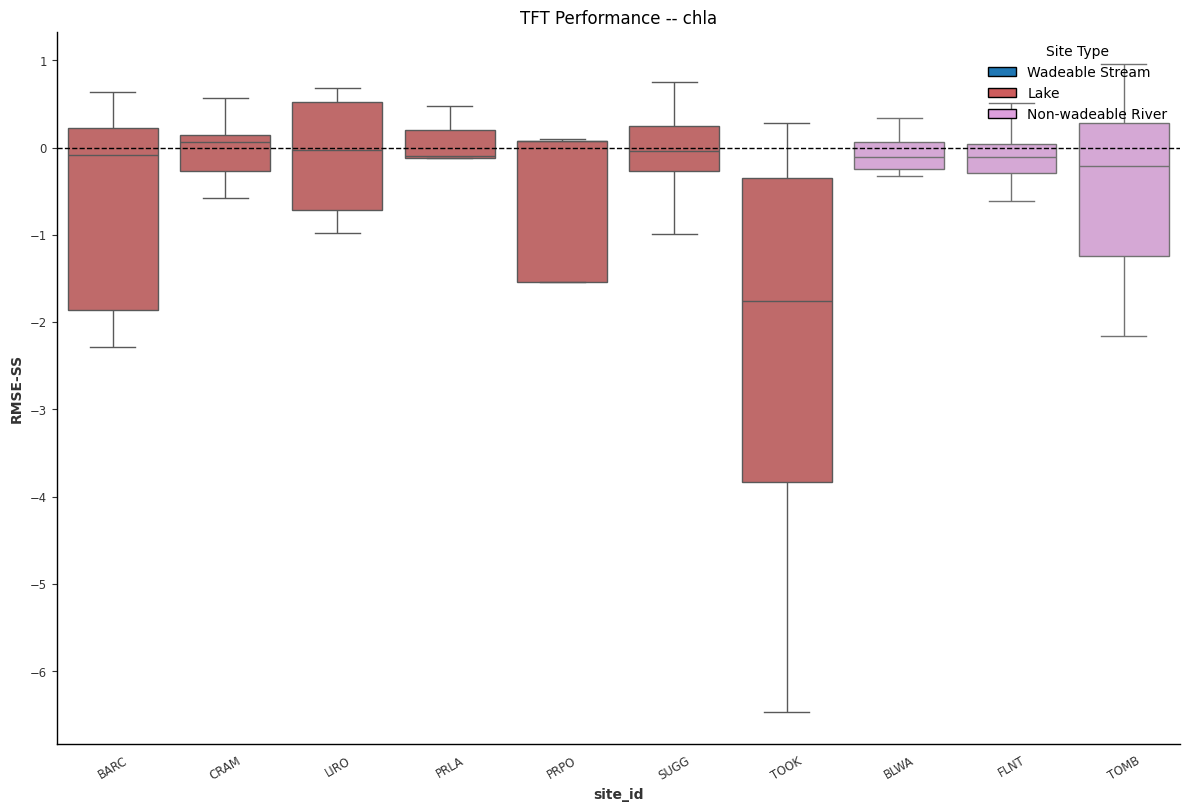

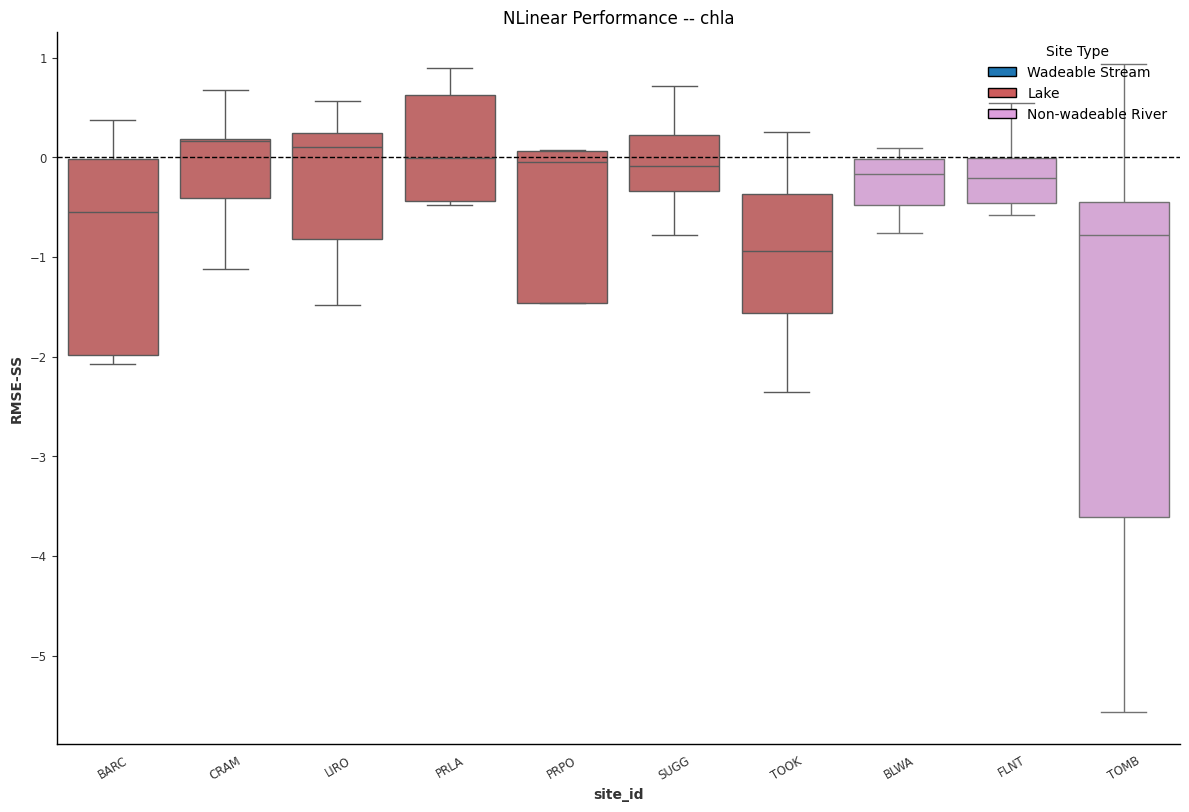

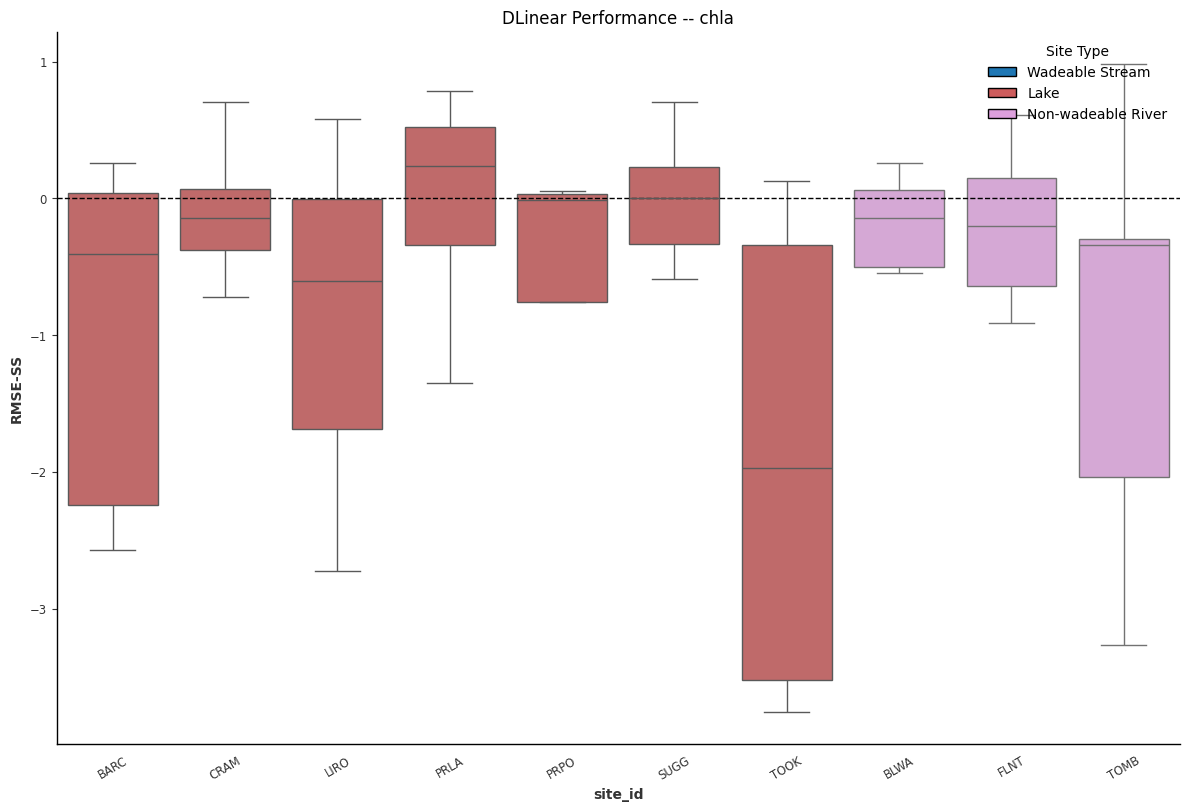

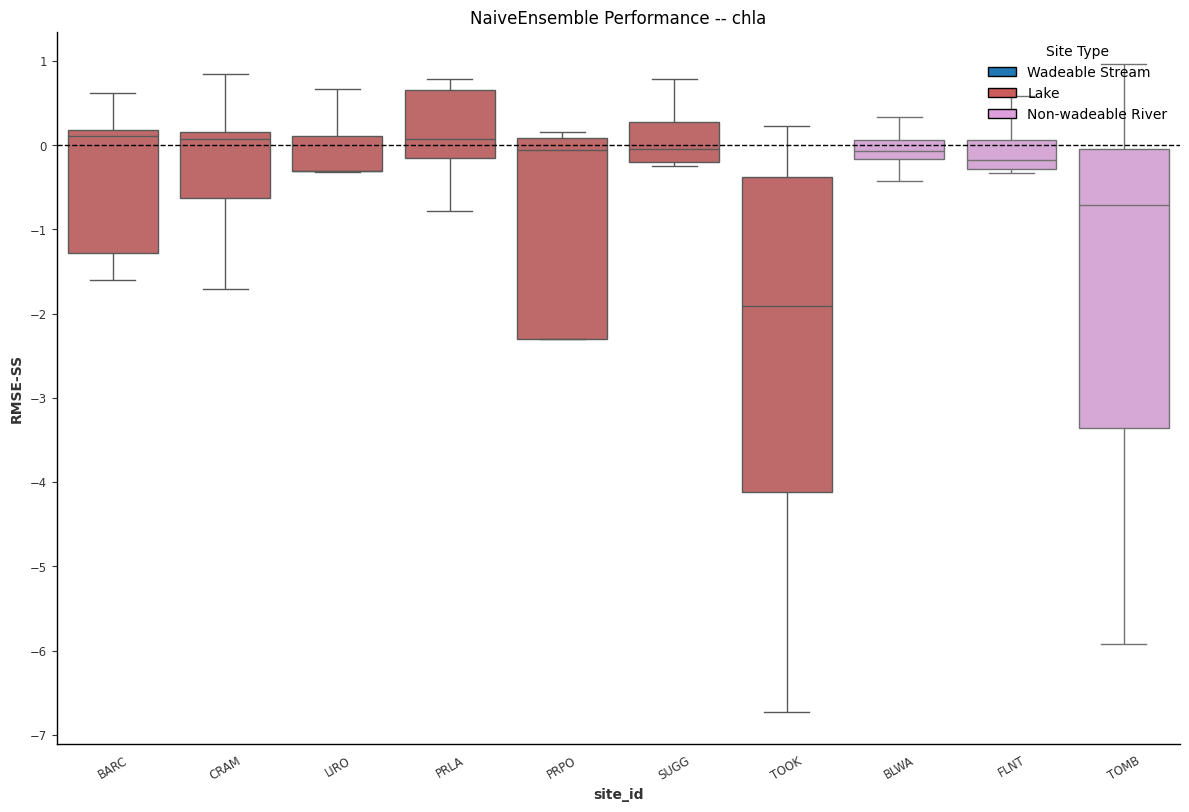

In [30]:
variable = 'chla'
df = best_performers_dfs[variable]['inter']
for model in model_names:
    score_df = df[df['model'] == model]
    plot_improvement_bysite(
        score_df, 
        metadata, 
        f'{model} Performance -- {variable}',
        historical=False,
    )